In [1]:
from procsimulator.CommunityGenerator import CommunityGenerator
from procsimulator.ConsumptionGenerator import ConsumptionGenerator
from procsimulator.Evaluation import Evaluation
# from procsimulator.CommunityManagerStrategy import CommunityManagerStrategy

In [2]:
import procsimulator
import os
import pandas as pd
import matplotlib.pyplot as plt
import csv
import datetime
import pyomo
import pyomo.opt
import pyomo.environ as pyo
import numpy as np
from ortools.linear_solver import pywraplp

In [3]:
num_days = "2"

current_path = os.getcwd()
print("Current Path:", current_path)

path_steps_seconds = os.path.join(current_path, "output\house")
print("Path Steps Seconds:", path_steps_seconds)

path_steps_minutes_first = os.path.join(current_path, "output", "minute")
print("Path Steps Minutes:", path_steps_minutes_first)

path_steps_minutes = os.path.join(current_path, "output", "minute2")
print("Path Steps Minutes:", path_steps_minutes)

path_steps_after_first = os.path.join(current_path, "output", "afterfirstoptimization")
print("Path Steps After First Optimization:", path_steps_after_first)

path_steps_after_second = os.path.join(current_path, "output", "aftersecondoptimization")
print("Path Steps After Second Optimization:", path_steps_after_second)

Current Path: C:\Users\Jimena\Desktop\Master\Asignaturas\TFM\proyecto05\codigo_proyecto
Path Steps Seconds: C:\Users\Jimena\Desktop\Master\Asignaturas\TFM\proyecto05\codigo_proyecto\output\house
Path Steps Minutes: C:\Users\Jimena\Desktop\Master\Asignaturas\TFM\proyecto05\codigo_proyecto\output\minute
Path Steps Minutes: C:\Users\Jimena\Desktop\Master\Asignaturas\TFM\proyecto05\codigo_proyecto\output\minute2
Path Steps After First Optimization: C:\Users\Jimena\Desktop\Master\Asignaturas\TFM\proyecto05\codigo_proyecto\output\afterfirstoptimization
Path Steps After Second Optimization: C:\Users\Jimena\Desktop\Master\Asignaturas\TFM\proyecto05\codigo_proyecto\output\aftersecondoptimization


In [4]:
cg = ConsumptionGenerator("data.json", path_steps_seconds, path_steps_minutes)
# cg.execute(num_days, "houses", just_a_day=False)

In [5]:
ruta = "output"

def actualizar_dataframe(ruta):    
    if ("events" not in ruta):
        df = pd.read_csv(ruta, sep=';')
        try:
            df["Date"] = df["Date"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))# - pd.Timedelta(days=102))
        except:
            df.columns=['Date','Power']
            df["Date"] = df["Date"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))# - pd.Timedelta(weeks=102))
            
        x = ruta.rsplit('/', 1)
        directorio_salida = os.path.join('', x[0])
        nombre_salida = os.path.join(directorio_salida, x[1])
        df.to_csv(nombre_salida, sep=";", index=False)

for carpeta in os.listdir(ruta):
    print("")
    archivo = ruta + "/" + carpeta
    for f in os.listdir(archivo):
        ruta_df = archivo + "/" + f
        print(ruta_df)
        
        if (os.path.isdir(ruta_df)):
            for fm in os.listdir(ruta_df):
                actualizar_dataframe(ruta_df + "/" + fm)
        else:
            actualizar_dataframe(ruta_df)



output/house0/AMPLIFIER.csv
output/house0/baseload.csv
output/house0/BREADCUTTER.csv
output/house0/CDPLAYER.csv
output/house0/COFFEEMAKER.csv
output/house0/COOKINGSTOVE.csv
output/house0/cooking_a_dinner.csv
output/house0/DISHWASHER.csv
output/house0/DRYER.csv
output/house0/Esther.csv
output/house0/events.csv
output/house0/FREEZER.csv
output/house0/fridge_operation.csv
output/house0/IRON.csv
output/house0/KETTLE.csv
output/house0/listen_to_a_74_minute_audio_CD.csv
output/house0/MICROWAVE.csv
output/house0/microwaving_food.csv
output/house0/PC.csv
output/house0/preparing_breakfast_with_coffee_or_tea_and_toast_or_eggs.csv
output/house0/PRINTER.csv
output/house0/REFRIGERATOR.csv
output/house0/TOASTER.csv
output/house0/total.csv
output/house0/TV.csv
output/house0/use_a_personal_computer.csv
output/house0/VACUUMCLEANER.csv
output/house0/vacuuming.csv
output/house0/WASHINGMACHINE.csv
output/house0/washing_a_load_of_laundry.csv
output/house0/watching_TV.csv

output/house1/AMPLIFIER.csv
outp

In [7]:
def _auxDictionary(a):
    temp_dictionary = {}
    if len(a.shape) == 3:
        for dim0 in np.arange(a.shape[0]):
            for dim1 in np.arange(a.shape[1]):
                for dim2 in np.arange(a.shape[2]):
                    key = (dim0+1, dim1+1, dim2+1)
                    value = a[dim0, dim1, dim2]
                    temp_dictionary[key] = value
                   
    elif len(a.shape) == 2:
        for dim0 in np.arange(a.shape[0]):
            for dim1 in np.arange(a.shape[1]):
                key = (dim0+1, dim1+1)
                value = a[dim0, dim1]
                temp_dictionary[key] = value
                
    else:
        for dim0 in np.arange(a.shape[0]):
            key = dim0 + 1
            value = a[dim0]
            temp_dictionary[key] = value
            
    return temp_dictionary

In [8]:
def ext_pyomo_vals(vals):
    # make a pd.Series from each
    s = pd.Series(vals.extract_values(),
                  index=vals.extract_values().keys())
    # if the series is multi-indexed we need to unstack it...
    if type(s.index[0]) == tuple:    # it is multi-indexed
        s = s.unstack(level=1)
    else:
        # force transition from Series -> df
        s = pd.DataFrame(s)
    return s

In [9]:
from ortools.linear_solver import pywraplp
import matplotlib.pyplot as plt
import numpy as np

class KnapsackBalancing:

    def __init__(self, dates, items, bin_capacities, numbers, bins_maximum, items_maximum, baseload, fact, n_bins_per_hour, flexibilities, export_prices, import_prices, efficiency, p_charger, degradation_cost, p_grid_max, val):

        self.dates = dates
        self.items = items
        self.numbers = numbers
        self.baseload = baseload
        self.bin_capacities = bin_capacities
        self.bins_maximum = bins_maximum
        self.items_maximum = items_maximum
        self.fact = fact
        self.n_bins_per_hour = n_bins_per_hour
        self.num_bins = n_bins_per_hour * 24
        self.flexibilities = flexibilities
        self.export_prices = export_prices
        self.import_prices = import_prices
        self.efficiency = efficiency
        self.p_charger = p_charger
        self.degradation_cost = degradation_cost
        self.p_grid_max = p_grid_max
        self.val = val
        self.dataframes = {}
        print("bin_capacities", bin_capacities)
     
 
    def create_data_model(self):
        data = {}
        data['tim_lens'] = [len(i) for i in self.items]
        data['max_len'] = max(data['tim_lens'])
        data['weights'] = pd.DataFrame(self.items).fillna(0)
        data['dates'] = pd.DataFrame(self.dates).fillna(0)
        data['numbers'] = pd.DataFrame(self.numbers).fillna(0)
        data['items'] = list(range(len(self.items)))
        data['num_items'] = len(self.items)
        num_bins = len(self.bin_capacities)
        data['bins'] = list(range(num_bins))
        data['bin_capacities'] = pd.DataFrame(self.bin_capacities)
        data['bins_maximum'] = pd.DataFrame(self.bins_maximum)
        data['items_maximum'] = pd.DataFrame(self.items_maximum).fillna(0)
        data['baseload'] = self.baseload
        data['fact'] = self.fact
        data['n_bins_per_hour'] = self.n_bins_per_hour
        data['num_bins'] = self.num_bins
        data['flexibilities'] = pd.DataFrame(self.flexibilities).fillna(0)
        data['export_prices'] = pd.DataFrame(self.export_prices)
        data['import_prices'] = pd.DataFrame(self.import_prices)
#         data['num_evs'] = self.num_evs
#         data['availability'] = self.availability
        data['efficiency'] = self.efficiency
        data['p_charger'] = self.p_charger
        data['avg_imp_price'] = np.array(data['import_prices']).mean(axis=0)
        data['degradation_cost'] = self.degradation_cost
        data['p_grid_max'] = self.p_grid_max
        data['val'] = self.val
        print(data['flexibilities'])
        print("Tamaño de la tabla de flexibilidades:", data['flexibilities'].shape)
        return data


    def create_sets(self, model, data):

        # Sets
        model.b = pyo.Set(initialize = np.arange(1, data['num_bins'] + 1))
        model.t = pyo.Set(initialize = np.arange(1, data['num_items'] + 1))
        model.i = pyo.Set(initialize = np.arange(1, data['max_len'] + 1))
        print("model.b", len(model.b))
        print("model.t", len(model.t))
        print("model.i", len(model.i))
        print("Rango de índices para model.t:", model.t.first(), "-", model.t.last())
        print("Rango de índices para model.i:", model.i.first(), "-", model.i.last())
        
        # model.ev = pyo.Set(initialize = np.arange(1, data['num_evs'] + 1))

    def create_parameters(self, model, data):
  
        # Parameters
        model.tim_lens = pyo.Param(model.t, initialize = _auxDictionary(np.array(data['tim_lens'])))
        model.weights = pyo.Param(model.t, model.i, initialize = _auxDictionary(np.array(data['weights'])))
        model.dates = pyo.Param(model.t, model.i, initialize = _auxDictionary(np.array(data['dates'])))
        model.numbers = pyo.Param(model.t, model.i, initialize = _auxDictionary(np.array(data['numbers'])))
        model.bin_capacities = pyo.Param(model.b, initialize = _auxDictionary(np.array(data['bin_capacities']).ravel()))
        model.bins_maximum = pyo.Param(model.b, initialize = _auxDictionary(np.array(data['bins_maximum']).ravel()))
        model.items_maximum = pyo.Param(model.t, model.i, initialize = _auxDictionary(np.array(data['items_maximum'])))
        model.baseload = pyo.Param(initialize = data['baseload'])
        model.fact = pyo.Param(initialize = data['fact'])
        model.n_bins_per_hour = pyo.Param(initialize = data['n_bins_per_hour'])
        model.num_bins = pyo.Param(initialize = data['num_bins'])
        model.flexibilities = pyo.Param(model.t, model.i, initialize = _auxDictionary(np.array(data['flexibilities'])))
        model.export_prices = pyo.Param(model.b, initialize = _auxDictionary(np.array(data['export_prices']).ravel()))
        model.import_prices = pyo.Param(model.b, initialize = _auxDictionary(np.array(data['import_prices']).ravel()))
        # Removed EV related parameters
#         model.availability = pyo.Param(model.b, model.ev, initialize = _auxDictionary(np.array(data['availability'].transpose())))
        model.n = data['efficiency'] # Efficiency
        model.p_charger = data['p_charger'] # Charging station power
        model.avg_imp_price = data['avg_imp_price'] # Average import price
        model.degradation_cost = data['degradation_cost']
        model.p_grid_max = data['p_grid_max']
        model.val = data['val']
        
    def create_variables(self, model):

        # Variables
        model.x = pyo.Var(model.b, model.t, model.i, domain=pyo.Binary, initialize=0)
        model.pImp = pyo.Var(model.b, domain=pyo.NonNegativeReals, initialize=0)
        model.pExp = pyo.Var(model.b, domain=pyo.NonNegativeReals, initialize=0)
        # model.ev_charge = pyo.Var(model.b, model.ev, domain=pyo.NonNegativeReals, initialize=0)
        # model.ev_discharge = pyo.Var(model.b, model.ev, domain=pyo.NonNegativeReals, initialize=0)
        # model.ev_soc = pyo.Var(model.b, model.ev, domain=pyo.NonNegativeReals, initialize=0)
        model.is_importing = pyo.Var(model.b, domain=pyo.Binary, initialize=0)
        


    def create_constraints(self, model, data):

        # An item of a timeslot can't be in more than one bin and all items have to be placed
        # The first condition is for those items that belong to the timeslot
        # The second condition is for those items that don't belong to the timeslot
        def _unique_bin(m, t, i):
            if i <= m.tim_lens[t]:  # Items used
                return sum(m.x[b, t, i] for b in m.b) == 1
            else:  # Items not used
                return sum(m.x[b, t, i] for b in m.b) == 0
    
        model.unique_bin = pyo.Constraint(model.t, model.i, rule=_unique_bin)
    
        # All the items of the timeslots have to be placed in the bins
        def _all_items_placed(m, t):
            return sum(m.x[k, t, i] for i in range(1, data['max_len'] + 1) for k in m.b) == m.tim_lens[t]
    
#         model.all_items_placed = pyo.Constraint(model.t, rule=_all_items_placed)
    
        # A bin can't contain more than one item of a timeslot (the timeslot items can't be in the same bin)
        def _one_item_per_bin(m, t, b):
            return sum(m.x[b, t, i] for i in range(1, data['max_len'] + 1)) <= 1
    
        model.one_item_per_bin = pyo.Constraint(model.t, model.b, rule=_one_item_per_bin)
    
        def _ascendent_order(m, t, i, b):

            if i > 1 and i <= m.tim_lens[t] and b > 1:
                return m.x[b, t, i] * b - m.x[b - 1, t, i - 1] * (b - 1) <= 1
            elif b == 1:
                return m.x[b, t, i] * i <= 1
            else:
                return pyo.Constraint.Skip
        
        # The items of a timeslot have to be placed in consecutive bins (in an ascendent order)
        # Item 2 should be placed in the next bin of Item 1 and so on
        def _ascendent_order2(m, t, i, b):
            if i > 1 and i <= m.tim_lens[t] and b > 1:
                return m.x[b, t, i] * b - m.x[b - 1, t, i - 1] * (b - 1) >= 0
            else:
                return pyo.Constraint.Skip
        model.ascendent_order2 = pyo.Constraint(model.t, model.i, model.b, rule=_ascendent_order2)
        
        
        # The items of a timeslot have to be placed in consecutive bins (in a descendent order)
        # Item 1 should be placed in the previous bin of Item 2 and so on
        def _descendent_order(m, t, i, b):
            if i < m.tim_lens[t] and m.tim_lens[t] > 1 and b < m.num_bins:
                return m.x[b + 1, t, i + 1] * (b + 1) - m.x[b, t, i] * b <= 1
            else:
                return pyo.Constraint.Skip
        model.descendent_order = pyo.Constraint(model.t, model.i, model.b, rule=_descendent_order)
        
        
        # The items of a timeslot have to be placed in consecutive bins (in a descendent order)
        # Item 1 should be placed in the previous bin of Item 2 and so on
        def _descendent_order2(m, t, i, b):
            if i < m.tim_lens[t] and m.tim_lens[t] > 1 and b < m.num_bins:
                return m.x[b + 1, t, i + 1] - m.x[b, t, i] >= 0
            else:
                return pyo.Constraint.Skip
        model.descendent_order2 = pyo.Constraint(model.t, model.i, model.b, rule=_descendent_order2)
        
        
#         # The house and appliance flexibilities have to be respected (min limit)
#         def _flexibility_max(m, t, i, b):
#             if i <= m.tim_lens[t]:
#                 return m.x[b, t, i] * b - m.x[b, t, i] * m.dates[t, i] >= -1 * m.flexibilities[t, i] * m.n_bins_per_hour
#             else:
#                 return pyo.Constraint.Skip
#         model.flexibility_max = pyo.Constraint(model.t, model.i, model.b, rule=_flexibility_max)
        
        
        # The house and appliance flexibilities have to be respected (max limit)
        def _flexibility_min(m, t, i, b):
            if i <= m.tim_lens[t]:
                return m.x[b, t, i] * b - m.x[b, t, i] * m.dates[t, i] <= m.flexibilities[t, i] * m.n_bins_per_hour
            else:
                return pyo.Constraint.Skip
        model.flexibility_min = pyo.Constraint(model.t, model.i, model.b, rule=_flexibility_min)
        
        
#         # FO1 Constraint
#         def _fo1(m):
#             return sum([m.pImp[b] for b in m.b]) <= m.val
#         model.fo1 = pyo.Constraint(rule=_fo1)
        
        
        # Balance of the Load
        def _balance(m, b):
            return sum(m.weights[t, i] * m.x[b, t, i] for t in m.t for i in m.i if i <= m.tim_lens[t]) + m.pExp[b] == m.bin_capacities[b] + m.pImp[b]
        model.balance = pyo.Constraint(model.b, rule=_balance)
        
        
        # Limit the power imported from the grid
        def _limit_pImp(m, b):
            return m.pImp[b] <= m.p_grid_max * m.is_importing[b]
        model.limit_pImp = pyo.Constraint(model.b, rule=_limit_pImp)
        
        
        # Limit for the power exported to the grid
        def _limit_pExp(m, b):
            return m.pExp[b] <= m.p_grid_max * (1 - m.is_importing[b])
        model.limit_pExp = pyo.Constraint(model.b, rule=_limit_pExp)
    
    def create_objective_function(self, model):

        def _FOag(m):
            return sum(m.pImp[j]/1000*m.import_prices[j] - m.pExp[j]/1000*m.export_prices[j] for j in m.b)
#             return sum(m.pImp[j] for j in m.b)
        model.FOag = pyo.Objective(rule=_FOag, sense=pyo.minimize)


    def get_dataframes(self, model):

        dataframes = {}
    
        dataframes['mDf'] = ext_pyomo_vals(model.x).transpose()
        dataframes['weight_df'] = ext_pyomo_vals(model.weights)
        dataframes['timLens_df'] = ext_pyomo_vals(model.tim_lens)[0]
        dataframes['production_df'] = ext_pyomo_vals(model.bin_capacities)[0]
        dataframes['pImp_df'] = ext_pyomo_vals(model.pImp)[0]
        dataframes['pExp_df'] = ext_pyomo_vals(model.pExp)[0]
        dataframes['isImporting_df'] = ext_pyomo_vals(model.is_importing)[0]
        dataframes['importPrices_df'] = ext_pyomo_vals(model.import_prices)[0]
        dataframes['exportPrices_df'] = ext_pyomo_vals(model.export_prices)[0]
        dataframes['obj'] = sum(dataframes['pImp_df'][j]/1000*model.import_prices[j] - dataframes['pExp_df'][j]/1000*model.export_prices[j] for j in model.b)
        dataframes['totalImport'] = sum(dataframes['pImp_df'][j]/1000 for j in model.b)
        dataframes['totalExport'] = sum(dataframes['pExp_df'][j]/1000 for j in model.b)
        dataframes['costImport'] = sum(dataframes['pImp_df'][j]/1000*model.import_prices[j] for j in model.b)
        dataframes['costExport'] = sum(dataframes['pExp_df'][j]/1000*model.export_prices[j] for j in model.b)

        return dataframes

    def get_results(self, model, data):
        print("Results")
        #print(ext_pyomo_vals(model.x))

        self.dataframes = self.get_dataframes(model)

        # Create dataframes
        mDf = self.dataframes['mDf']
        weight_df = self.dataframes['weight_df']
        timLens_df = self.dataframes['timLens_df']
        production_df = self.dataframes['production_df']
        pImp_df = self.dataframes['pImp_df']
        pExp_df = self.dataframes['pExp_df']
        isImporting_df = self.dataframes['isImporting_df']
        importPrices_df = self.dataframes['importPrices_df']
        exportPrices_df = self.dataframes['exportPrices_df']

        placed_timeslots = []

        for b in np.arange(1, data['num_bins']+1):

            print("------------------------------------------------------------")
            print("Bin {}".format(b))
            print("------------------------------------------------------------")

            for t in np.arange(1, data['num_items']+1):
                for i in np.arange(1, data['max_len']+1):
                    if mDf[b].loc[(t, i)] == 1:
                        #print("Timeslot ", t, "Item ", i, " - weight: ", data['weights'][t-1][i-1])
                        print("Timeslot ", t, "Item ", i)

                        firstItemDate = b - (i-1)

                        placed_timeslots.append(str(self.numbers[t-1][i-1]) + "-" + str(i-1) + "-" + str(self.items[t-1][i-1]) + "-" + str(b) + "-" + str(len(self.items[t-1])) + "-" + str(firstItemDate) + "-" + str(self.items_maximum[t-1][i-1]) + "-" + str(self.dates[t-1][i-1]) + "-" + str(self.flexibilities[t-1][i-1]))

            demand_df = sum(weight_df.loc[(t,i)] * mDf[b].loc[(t, i)] for t in np.arange(1, data['num_items']+1) for i in np.arange(1, data['max_len']+1) if i <= timLens_df[t])

            print("Production: ", production_df[b])
            print("Demand: ", demand_df)
            print("Excess of Production: ", (production_df[b]-demand_df))

            print("Is Importing: " + str(isImporting_df[b]))
            print("Is Exporting: " + str(1-int(isImporting_df[b])))
            print("pImp: ", pImp_df[b])
            print("pExp: ", pExp_df[b])

            print('import prices: ', importPrices_df[b])
            print('export prices: ', exportPrices_df[b])

            print('cost (+): ', exportPrices_df[b] * pExp_df[b]/1000)
            print('cost (-):', importPrices_df[b] * pImp_df[b]/1000)

        return placed_timeslots


    def execute_knapsack(self):

        now = datetime.datetime.now()
    
        start_time = now.strftime("%H:%M:%S")
    
        data = self.create_data_model()
        model = pyo.ConcreteModel()
    
        self.create_sets(model, data)
        self.create_parameters(model, data)
        self.create_variables(model)
    
        self.create_constraints(model, data)
        self.create_objective_function(model)
    
    
        model.write('res_V4_EC.lp',  io_options={'symbolic_solver_labels': True})
    
        opt = pyo.SolverFactory('cplex', executable='C:/Program Files/IBM/ILOG/CPLEX_Studio_Community2211/cplex/bin/x64_win64/cplex.exe')
        opt.options['LogFile'] = 'res_V4_EC.log'
    
        results = opt.solve(model)#, tee=True)
        results.write()
    
    
        now = datetime.datetime.now()
    
        end_time = now.strftime("%H:%M:%S")
        print("End Time =", end_time)
        print("Dif: {}".format(datetime.datetime.strptime(end_time, "%H:%M:%S") - datetime.datetime.strptime(start_time, "%H:%M:%S")))
    
        placed_timeslots = self.get_results(model, data)
        all_timeslots = []
    
        for i in list(range(len(self.items))):
          for p in range(len(self.items[i])):
            w = self.items[i][p]
            d = self.dates[i][p]
            n = self.numbers[i][p]
            flex = self.flexibilities[i][p]
            max = self.items_maximum[i][p]
            if (p == 0):  # First item of the timeslot
              first_item_date = d
            all_timeslots.append(str(n) + "-" + str(p) + "-" + str(w) + "-" + str(d) + "-" + str(len(self.items[i])) + "-" + str(first_item_date) + "-" + str(max) + "-" + str(d) + "-" + str(flex))
    
    
        return [all_timeslots, placed_timeslots, [], []]

In [10]:
from CommunityManager import CommunityManager
from ConsumptionGenerator import ConsumptionGenerator
from Knapsack import Knapsack
import pandas as pd
import os
import math
import shutil
import errno
import datetime


class CommunityManagerBalancingStrategy(CommunityManager):

  def __init__(self, cg, path_steps_minutes, path_steps_after_first, path_steps_after_second):
    """
    This class is a load balancing strategy implemented using Multiple Knapsack (which is a combinatorial optimization problem).
    Taking in consideration the objective functions and constraints, it shifts the consumption of the activities.

    Args:
      cg: Consumption Generator instance (to allow to use its functions)
      path_steps_minutes: path of the resampled consumption profiles (at 1/60Hz)
      path_steps_after_first: path of the consumption profiles after the 1st step of the optimization
      path_steps_after_second: path of the consumption profiles after the 2nd step of the optimization
    """
    self.cg = cg
    self.path_steps_minutes = path_steps_minutes
    self.path_steps_after_first = path_steps_after_first
    self.path_steps_after_second = path_steps_after_second
    self.dataframes = {}


  def calculate_bin_used_capacity(self, bins_capacities, placed_timeslots, production_baseload, n_bins_per_hour):
    """
    Updates the bin capacity for the second part of the optimization (increases the production_baseload to the bin capacity of the first part, and subtracts the energy of the placed timeslots in the first step.

    Args:
      bins_capacities: bin capacities of the bins in the 1st step of the optimization
      placed_timeslots: placed timeslots in the 1st step (in order to subtract the energy of them to the bin capacity) - if they are placed, the bin capacity decreases
      production_baseload: value to increment in the bin capacities, which corresponds to the value of energy that can be acquired from the grid in the 2nd step
      n_bins_per_hour: number of bins per hour (parameter of the strategy) to know the quantity of bins in a day (e.g. if bins of 30 minutes, n_bins_per_hour = 2)

    Returns:
      array with x positions in a day (where the number of positions is 24*n_bins_per_hour) with the bin capacity of each bin
    """

    binUsedCapacity = [0] * 24 * n_bins_per_hour

    for bin in range(len(bins_capacities)):
      binUsedCapacity[bin] = bins_capacities[bin]
      binUsedCapacity[bin] += production_baseload

    for timeslot in placed_timeslots:
      tm = timeslot.split("-")
      weight = float(tm[2])
      bin = int(tm[3]) - 1  # bin 1 is 0 position (00:00-00:59)
      binUsedCapacity[bin] -= weight

    return binUsedCapacity


  def get_production_max_after_first_optimization(self, netload_second_optim, fd, production_baseload, n_bins_per_hour, fact):
    """
    Calculates the maximum production peak for each bin of the second step (calculates the maximum in the netload dataframe after updating the profiles of 1st step, and have to increase the production_baseload and decrease the energy of the placed timeslots of the 1st step)

    Args:
      netload_second_optim: dataframe which contains the netload after updating the profiles of the 1st step (to calculate the maximum peak in the 2nd step)
      fd: consumption profile date (to
      production_baseload: value to increment in the bin capacities, which corresponds to the value of energy that can be acquired from the grid in the 2nd step
      n_bins_per_hour: number of bins per hour (parameter of the strategy) to know the quantity of bins in a day (e.g. if bins of 30 minutes, n_bins_per_hour = 2)
      fact: minutes of each bin (e.g. if bins of 30 minutes, fact = 30)

    Returns:
      array with x positions in a day (where the number of positions is 24*n_bins_per_hour) with the bin maximum production peak of each bin
    """

    bins_maximum_second_optimization = []
    for z in range(0, 24):

      startMin = 0
      endMin = fact - 1
      for w in range(0, n_bins_per_hour):
        max = netload_second_optim[
          (netload_second_optim['Date'] >= str(fd) + ' ' + str(z).zfill(2) + ':' + str(startMin).zfill(2) + ':00') & (
              netload_second_optim['Date'] <= str(fd) + ' ' + str(z).zfill(2) + ':' + str(endMin).zfill(2) + ':00')][
          'Production'].max()
        # demand when the production is max
        binUsage = netload_second_optim.loc[netload_second_optim[
          (netload_second_optim['Date'] >= str(fd) + ' ' + str(z).zfill(2) + ':' + str(startMin).zfill(2) + ':00') & (
              netload_second_optim['Date'] <= str(fd) + ' ' + str(z).zfill(2) + ':' + str(endMin).zfill(2) + ':00')][
          'Production'].idxmax()]["Demand"]
        bins_maximum_second_optimization.append(max + production_baseload - binUsage)

        startMin = startMin + fact
        endMin = endMin + fact

    return bins_maximum_second_optimization


  def remove_flexible_consumption(self):
    """
    Removes the flexible consumption of the consumption profile, in order to have the baseload consumption (that consumption that can not be shifted.
    In order to do this, the consumption of the flexible appliances are subtracted from the netload and community dataframes (notice that each flexible has it own consumption profile for each house)

    Returns:
      netload dataframe with the non-flexible consumption
    """

    flexible_timeslots,_ = self.cg.get_timeslots(self.cg.get_community(), True)

    df_community = pd.read_csv(self.path_steps_after_first + '/community.csv', sep=';')  # Header=None to indicate that the first row is data and not colummn names
    df_community.columns = ['Date', 'Power']

    df_netload = pd.read_csv(self.path_steps_after_first + '/netload.csv', sep=';')  # Header=None to indicate that the first row is data and not colummn names
    df_netload.columns = ['Date', 'Demand', 'PV_Production', 'Wind_Production', 'Production', 'Netload']


    for timeslot in flexible_timeslots:

      df_appliance = pd.read_csv(self.path_steps_after_first + '/house' + str(timeslot["House"]) + '/' + timeslot["Appliance"] + ".csv", sep=';')  # Header=None to indicate that the first row is data and not colummn names
      df_appliance.columns = ['Date', 'Power']

      df_total = pd.read_csv(self.path_steps_after_first + '/house' + str(timeslot["House"]) + '/total.csv', sep=';')  # Header=None to indicate that the first row is data and not colummn names
      df_total.columns = ['Date', 'Power']

      start_obj = datetime.datetime.strptime(timeslot["Start"], '%Y-%m-%d %H:%M:%S')  # Convert string to datetime object
      end_obj = datetime.datetime.strptime(timeslot["End"], '%Y-%m-%d %H:%M:%S')  # Convert string to datetime object
      obj = start_obj

      while (obj != end_obj + datetime.timedelta(minutes=1)):

        # Update house total consumption
        indexTotal = df_total[df_total.Date == str(obj)].index  # Get index of the row
#         df_total.loc[indexTotal, 'Power'] = float(df_total[df_total.Date == str(obj)]["Power"]) - float(df_appliance[df_appliance.Date == str(obj)]["Power"])
        if not df_total[df_total.Date == str(obj)].empty:
            df_total.loc[indexTotal, 'Power'] = float(df_total[df_total.Date == str(obj)]["Power"].iloc[0]) - float(df_appliance[df_appliance.Date == str(obj)]["Power"].iloc[0])
    

        # Update community consumption
#         print(df_community)
        indexCommunity = df_community[df_community.Date == str(obj)].index  # Get index of the row
#         print(indexCommunity)
#         df_community.loc[indexCommunity, 'Power'] = float(df_community[df_community.Date == str(obj)]["Power"]) - float(df_appliance[df_appliance.Date == str(obj)]["Power"])
        if not indexCommunity.empty:
            df_community.loc[indexCommunity, 'Power'] = float(df_community[df_community.Date == str(obj)]["Power"].iloc[0]) - float(df_appliance[df_appliance.Date == str(obj)]["Power"].iloc[0])
        else:
            print("IndexCommunity is empty")

        # Update community netload
        indexNetload = df_netload[df_netload.Date == str(obj)].index  # Get index of the row
#         df_netload.loc[indexNetload, 'Demand'] = float(df_netload[df_netload.Date == str(obj)]["Demand"]) - float(df_appliance[df_appliance.Date == str(obj)]["Power"])
        if not df_netload[df_netload.Date == str(obj)].empty:
            df_netload.loc[indexNetload, 'Demand'] = float(df_netload[df_netload.Date == str(obj)]["Demand"].iloc[0]) - float(df_appliance[df_appliance.Date == str(obj)]["Power"].iloc[0])

        
        # Update appliance consumption - has to be the last update since the others dataframes use this dataframe
        indexAppliance = df_appliance[df_appliance.Date == str(obj)].index  # Get index of the row
        df_appliance.loc[indexAppliance, 'Power'] = 0

        obj = obj + datetime.timedelta(minutes=1)  # Next minute


      # After all minutes of the appliance updated
      output_directory = os.path.join('', self.path_steps_after_first + '/house' + str(timeslot["House"]))

      outname = os.path.join(output_directory, str(timeslot["Appliance"]) + '.csv')
      df_appliance.to_csv(outname, columns=['Date', 'Power'], sep=";", index=False)

      outname = os.path.join(output_directory, 'total.csv')
      df_total.to_csv(outname, columns=['Date', 'Power'], sep=";", index=False)

    output_directory = os.path.join('', self.path_steps_after_first)
    outname = os.path.join(output_directory, 'community.csv')
    df_community.to_csv(outname, columns=['Date', 'Power'], sep=";", index=False)

    outname = os.path.join(output_directory, 'netload.csv')
    df_netload.to_csv(outname, columns=['Date', 'Demand', 'PV_Production', 'Wind_Production', 'Production', 'Netload'], sep=";", index=False)

    return df_netload



  def create_profiles_after_strategy(self, placed_timeslots, all_timeslots_objects, initial_path, final_path, short_initial_path, short_final_path, remove_flex_cons, n_bins_per_hour, fact):
    """
    Implementing the abstract function (from the parent) which updates the profiles after applying the strategy.

    Args:
      placed_timeslots: array of the placed timeslots
      all_timeslots_objects: array of all timeslots with all the information (Start, End, Appliance, Power, House, etc)
      initial_path: path of the minutes (1/60Hz) dataframe (e.g. "(...)/output/minute")
      final_path: path of the dataframe after the strategy (e.g. "(...)/output/afteroptimization")
      short_initial_path: folder of the minutes (1/60Hz) dataframe (e.g. "minutes")
      short_final_path: folder of the dataframe after the strategy e.g. "afteroptimization")
      remove_flex_cons: if True, the flexible consumption will be removed, otherwise the flexible consumption will not be removed (in 1st step, it was True to remove the flexible consumption and in the 2nd step it was False because the flexible consumption has already been removed)
      n_bins_per_hour: number of bins per hour (parameter of the strategy) to know the quantity of bins in a day (e.g. if bins of 30 minutes, n_bins_per_hour = 2)
      fact: minutes of each bin (e.g. if bins of 30 minutes, fact = 30)

    Returns:
      output of update_consumption_profiles_based_on_optimization function
    """
    return self.update_consumption_profiles_based_on_optimization(placed_timeslots, all_timeslots_objects, initial_path, final_path, short_initial_path, short_final_path, remove_flex_cons, n_bins_per_hour, fact)


  def update_consumption_profiles_based_on_optimization(self, placed_timeslots, all_timeslots_objects, initial_path, final_path, short_initial_path, short_final_path, remove_flex_cons, n_bins_per_hour, fact):
    """
    Implementing the function which updates the profiles after applying the strategy.

    Args:
      placed_timeslots: array of the placed timeslots
      all_timeslots_objects: array of all timeslots with all the information (Start, End, Appliance, Power, House, etc)
      initial_path: path of the minutes (1/60Hz) dataframe (e.g. "(...)/output/minute")
      final_path: path of the dataframe after the strategy (e.g. "(...)/output/afteroptimization")
      short_initial_path: folder of the minutes (1/60Hz) dataframe (e.g. "minutes")
      short_final_path: folder of the dataframe after the strategy e.g. "afteroptimization")
      remove_flex_cons: if True, the flexible consumption will be removed, otherwise the flexible consumption will not be removed (in 1st step, it was True to remove the flexible consumption and in the 2nd step it was False because the flexible consumption has already been removed)
      n_bins_per_hour: number of bins per hour (parameter of the strategy) to know the quantity of bins in a day (e.g. if bins of 30 minutes, n_bins_per_hour = 2)
      fact: minutes of each bin (e.g. if bins of 30 minutes, fact = 30)

    Returns:
      array with 2 positions: array of the placed timeslots [0] and flexible dataframe [1]
    """
    # Remove all files of the folder and the folder (before copying the consumption profiles)
    if os.path.exists(final_path):
      shutil.rmtree(final_path)

    # Create the folder
    if not os.path.exists(final_path):
      os.mkdir(final_path)
    
    print(final_path)

    print(len(all_timeslots_objects))
    # Copy the consumption profiles to after optimization folder in order to change it consumption after the optimization of the timeslots
    try:
      src_files = os.listdir(initial_path)
      for file_name in src_files:
        full_file_name = os.path.join(initial_path, file_name)
        if os.path.isfile(full_file_name):
          shutil.copy(full_file_name, final_path)
        elif os.path.isdir(full_file_name):
          shutil.copytree(full_file_name, full_file_name.replace(short_initial_path, short_final_path))
    except OSError as e:
      if e.errno != errno.EEXIST:
        raise

    # community profile
    # communityBefore = pd.read_csv('output/minute/community.csv', sep=';')  # Header=None to indicate that the first row is data and not colummn names
    # communityBefore.columns = ['Date', 'Power']


    df_flexible = ""
    if (remove_flex_cons):
      df_flexible = self.remove_flexible_consumption()
      #showNetloadGraph(finalPath + '/netload.csv')


    community_after = pd.read_csv(final_path + '/community.csv', sep=';')  # Header=None to indicate that the first row is data and not colummn names
    community_after.columns = ['Date', 'Power']

    netload_after = pd.read_csv(final_path + '/netload.csv', sep=';')  # Header=None to indicate that the first row is data and not colummn names
    netload_after.columns = ['Date', 'Demand', 'PV_Production', 'Wind_Production', 'Production', 'Netload']


    # Reset community consumption
    #community_after['Power'] = 0
    #netload_after['Demand'] = 0


    placed_appliances = []
    placed_houses = []
    placed_timeslots_array = []


    for timeslot in placed_timeslots:

      timeslot = timeslot.split("-")
      first_item_date = str(int(float(timeslot[5]))-1)
      timeslot_number = int(float(timeslot[0]))
      print("Timeslot number: ",timeslot_number )
      timeslot_sub_item_number = int(float(timeslot[1]))
      timeslot_power = float(timeslot[2])
      timeslot_first_bin = str(int(float(timeslot[3])) - 1) # bin 1 corresponds to midnight, bin 2 corresponds to 1 am, etc
      timeslot_number_of_bins = timeslot[4]
      timeslot_last_bin = str(int(float(first_item_date)) + (int(float(timeslot_number_of_bins)) - 1))
      timeslot_bin_before_opt = str(int(float(timeslot[7])) - 1)


      # Gets all the fields of the timeslot (Start, End, Appliance, House, etc)
      timeslot_obj = all_timeslots_objects[timeslot_number]  # If a timeslot is placed, all the subitemms are placed
      print("timeslot_obj", timeslot_obj)
      # each house consumption profile
      # total_before = pd.read_csv('output/minute/house' + str(timeslotObj["House"]) + '/total.csv', sep=';')
      # total_before.columns = ['Date', 'Power']

      total_after = pd.read_csv(final_path + '/house' + str(timeslot_obj["House"]) + '/total.csv', sep=';')
      total_after.columns = ['Date', 'Power']

      # Reset all houses consumption
      #if (str(timeslot_obj["House"]) not in placed_houses):
        #total_after['Power'] = 0
        #placed_houses.append(str(timeslot_obj["House"]))

      # each appliance consumption profile (of a specific house)
      df_before = pd.read_csv(self.path_steps_minutes + '/house' + str(timeslot_obj["House"]) + '/' + timeslot_obj["Appliance"] + ".csv", sep=';')  # Header=None to indicate that the first row is data and not colummn names
      df_before.columns = ['Date', 'Power']
    
      df_after = pd.read_csv(final_path + '/house' + str(timeslot_obj["House"]) + '/' + timeslot_obj["Appliance"] + ".csv", sep=';')  # Header=None to indicate that the first row is data and not colummn names
      df_after.columns = ['Date', 'Power']

      # Reset all appliance consumption
      #if ((str(timeslot_obj["House"]) + "-" + str(timeslot_obj["Appliance"])) not in placed_appliances):
        #dfAfter['Power'] = 0
        #placed_appliances.append(str(timeslot_obj["House"]) + "-" + str(timeslot_obj["Appliance"]))

      # when there's more than one item of a timeslot:
      # 1) if its the first hour - starts at the first minutes of the timeslot and ends at 59 miutes
      # 2) if its a middle hour (not the first and not the last) - starts at 00 minutes and ends at 59 minutes
      # 3) if its the last hour - starts at 00 and ends at the last minutes of the timeslot
      # e.g. timeslot from 8.53 to 10.15:
      # hour 8 (bin 9) -> 08:53 (original) - 08:59 (first)
      # hour 9 (bin 10) -> 09:00 - 09:59 (middle)
      # hour 10 (bin 11) -> 10:00 - 10:15 (original) (last)

      tim_new_hour = int(math.floor(int(timeslot_first_bin)/n_bins_per_hour))
      tim_new_min = int((int(timeslot_first_bin)%n_bins_per_hour)*fact)
      tim_old_hour = int(math.floor(int(timeslot_bin_before_opt)/n_bins_per_hour))
      tim_old_min = int((int(timeslot_bin_before_opt) % n_bins_per_hour) * fact)


      if (int(timeslot_number_of_bins) > 1):
        if (int(first_item_date) == int(timeslot_first_bin)):

          timeslot_start_date = str(timeslot_obj["Start"])
          timeslot_end_date = str(timeslot_obj["Start"])[0:11] + str(tim_old_hour).zfill(2) + ":" + str(tim_old_min + (fact - 1)).zfill(2) + ":00"
          new_optimization_start_date = str(timeslot_obj["Start"])[0:11] + str(tim_new_hour).zfill(2) + ":" + str(int(tim_new_min+(fact-1)) - (int(tim_old_min+(fact-1))-int(timeslot_obj["Start"][14:16]))).zfill(2) + ":00"
          new_optimization_end_date = str(timeslot_obj["Start"])[0:11] + str(tim_new_hour).zfill(2) + ":" + str(tim_new_min + (fact - 1)).zfill(2) + ":00"

        elif (int(timeslot_first_bin) == int(timeslot_last_bin)):

          timeslot_start_date = str(timeslot_obj["Start"])[0:11] + str(tim_old_hour).zfill(2) + ":" + str(tim_old_min).zfill(2) + ":00"
          timeslot_end_date = str(timeslot_obj["End"])
          new_optimization_start_date = str(timeslot_obj["Start"])[0:11] + str(tim_new_hour).zfill(2) + ":" + str(tim_new_min).zfill(2) + ":00"
          new_optimization_end_date = str(timeslot_obj["Start"])[0:11] + str(tim_new_hour).zfill(2) + ":" + str(int(tim_new_min) + (int(timeslot_obj["End"][14:16])-int(tim_old_min))).zfill(2) + ":00"

        else:

          timeslot_start_date = str(timeslot_obj["Start"])[0:11] + str(tim_old_hour).zfill(2) + ":" + str(tim_old_min).zfill(2) + ":00"
          timeslot_end_date = str(timeslot_obj["Start"])[0:11] + str(tim_old_hour).zfill(2) + ":" + str(tim_old_min + (fact - 1)).zfill(2) + ":00"
          new_optimization_start_date = str(timeslot_obj["Start"])[0:11] + str(tim_new_hour).zfill(2) + ":" + str(tim_new_min).zfill(2) + ":00"
          new_optimization_end_date = str(timeslot_obj["Start"])[0:11] + str(tim_new_hour).zfill(2) + ":" + str(tim_new_min + (fact - 1)).zfill(2) + ":00"

      else:

        timeslot_start_date = str(timeslot_obj["Start"])
        timeslot_end_date = str(timeslot_obj["End"])
        new_optimization_start_date = str(timeslot_obj["Start"])[0:11] + str(tim_new_hour).zfill(2) + ":" + str(int(tim_new_min + (fact - 1)) - (int(tim_old_min + (fact - 1)) - int(timeslot_obj["Start"][14:16]))).zfill(2) + ":00"
        new_optimization_end_date = str(timeslot_obj["Start"])[0:11] + str(tim_new_hour).zfill(2) + ":" + str(int(tim_new_min) + (int(timeslot_obj["End"][14:16]) - int(tim_old_min))).zfill(2) + ":00"


      # list of placed timeslots
      placed_timeslots_array.append(str(timeslot_obj["House"]) + "*" + str(timeslot_obj["Appliance"]) + "*" + str(timeslot_number) + "*" + str(new_optimization_start_date) + "*" + str(new_optimization_end_date))


      # before optimization (original)
      start_obj_before = datetime.datetime.strptime(timeslot_start_date, '%Y-%m-%d %H:%M:%S')  # Convert string to datetime object
      end_obj_before = datetime.datetime.strptime(timeslot_end_date, '%Y-%m-%d %H:%M:%S')  # Convert string to datetime object
      obj_before = start_obj_before

      # after optimization
      start_obj_after = datetime.datetime.strptime(new_optimization_start_date, '%Y-%m-%d %H:%M:%S')  # Convert string to datetime object
      end_obj_after = datetime.datetime.strptime(new_optimization_end_date, '%Y-%m-%d %H:%M:%S')  # Convert string to datetime object
      obj_after = start_obj_after


      while (obj_after <= end_obj_after):
      
          index_netload_after = netload_after[netload_after.Date == str(obj_after)].index
          index_after = community_after[community_after.Date == str(obj_after)].index
          index_total_after = total_after[total_after.Date == str(obj_after)].index
          index_app_after = df_after[df_after.Date == str(obj_after)].index
          
          # Verificar si algún índice está vacío y manejarlo
          if index_netload_after.empty or index_after.empty or index_total_after.empty or index_app_after.empty:
#               print("Error: Índice vacío en alguna de las series")
              obj_before = obj_before + datetime.timedelta(minutes=1)
              obj_after = obj_after + datetime.timedelta(minutes=1)
              continue  # Saltar al siguiente ciclo del bucle
          
          # Continuar con el resto del código si todos los índices tienen valores
          netload_demand = float(netload_after[netload_after.Date == str(obj_after)]["Demand"].iloc[0])
          df_power_series = df_before[df_before.Date == str(obj_before)]["Power"]
          if not df_power_series.empty:
              df_power = float(df_power_series.iloc[0])
          else:
              print("No hay datos disponibles para el tiempo actual:", obj_before)
              obj_before = obj_before + datetime.timedelta(minutes=1)
              obj_after = obj_after + datetime.timedelta(minutes=1)
              continue  # Saltar al siguiente ciclo del bucle
      
          netload_after.loc[index_netload_after, 'Demand'] = netload_demand + df_power
          netload_after.loc[netload_after['Production'] < 0, 'Production'] = 0
          community_after.loc[index_after, 'Power'] = float(community_after[community_after.Date == str(obj_after)]["Power"].iloc[0]) + float(df_before[df_before.Date == str(obj_before)]["Power"].iloc[0])
          total_after.loc[index_total_after, 'Power'] = float(total_after[total_after.Date == str(obj_after)]["Power"].iloc[0]) + float(df_before[df_before.Date == str(obj_before)]["Power"].iloc[0])
          df_after.loc[index_app_after, 'Power'] = float(df_after[df_after.Date == str(obj_after)]["Power"].iloc[0]) + float(df_before[df_before.Date == str(obj_before)]["Power"].iloc[0])
      
          obj_before = obj_before + datetime.timedelta(minutes=1)
          obj_after = obj_after + datetime.timedelta(minutes=1)
      
      # Después del bucle while - cuando se actualiza el perfil de consumo para cada minuto del intervalo de tiempo
      output_directory = os.path.join('', final_path + '/house' + str(timeslot_obj["House"]))
      outname = os.path.join(output_directory, str(timeslot_obj["Appliance"]) + '.csv')
      df_after.to_csv(outname, columns=['Date', 'Power'], sep=";", index=False)
      
      # Después de actualizar todos los intervalos de tiempo - actualizar el total de cada casa
      output_directory = os.path.join('', final_path + '/house' + str(timeslot_obj["House"]))
      outname = os.path.join(output_directory, 'total.csv')
      df_after.to_csv(outname, columns=['Date', 'Power'], sep=";", index=False)
      
      netload_after["Netload"] = netload_after["Demand"] - netload_after["Production"]
      
      # Después de actualizar todos los intervalos de tiempo - actualizar el perfil de la comunidad
      output_directory = os.path.join('', final_path)
      outname = os.path.join(output_directory, 'community.csv')
      community_after.to_csv(outname, columns=['Date', 'Power'], sep=";", index=False)
      
      # Después de actualizar todos los intervalos de tiempo - actualizar el perfil de carga
      outname = os.path.join(output_directory, 'netload.csv')
      netload_after.to_csv(outname, columns=['Date', 'Demand', 'PV_Production', 'Wind_Production', 'Production', 'Netload'], sep=";", index=False)
      
    return [placed_timeslots_array, df_flexible]



  
  def execute(self, export_prices_hour = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], import_prices_hour = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]):
    """
    Executes the optimization process (implemented strategy using Multiple Knapsack):
    1) First step
    - Prepares the input (arrays) for the process (bin_capacities, bin_maximums, timeslots_number, flexibitilies, items_max, etc)
    - Calls the Knapsack class with the input processed (execute_knapsack function)
    - Updates the consumption profiles based on the output of the knapsack
    2) Second Step
    - Prepares the input (arrays) for the process (bin_capacities, bin_maximums, timeslots_number, flexibitilies, items_max, etc)
    - Calls the Knapsack class with the input processed (execute_knapsack function)
    - Updates the consumption profiles based on the output of the knapsack
    """

    print("Optimization the community using the implemented strategy")

    netload = pd.read_csv(self.path_steps_minutes + '/netload.csv',sep=';')  # Header=None to indicate that the first row is data and not colummn names
    netload.columns = ['Date', 'Demand', 'PV_Production', 'Wind_Production', 'Production', 'Netload']

    # Plotd
    # netload.plot(x="Date", y=["Demand", "Production", "Netload"], kind="line", figsize=(10, 10))
    # plt.show()
    
    fd = str(netload.iloc[0]["Date"])[0:10]
    bins_capacities = []
    bins_maximum = []
    bins_export_prices = []
    bins_import_prices = []
    fact = 60
    n_bins_per_hour = int(60 / fact)

    for z in range(0, 24):
      startMin = 0
      endMin = fact - 1
      for w in range(0, n_bins_per_hour):
        avg = netload[
          (netload['Date'] >= str(fd) + ' ' + str(z).zfill(2) + ':' + str(startMin).zfill(2) + ':00') & (
                  netload['Date'] <= str(fd) + ' ' + str(z).zfill(2) + ':' + str(endMin).zfill(2) + ':00')][
          'Production'].mean()
        max = netload[
          (netload['Date'] >= str(fd) + ' ' + str(z).zfill(2) + ':' + str(startMin).zfill(2) + ':00') & (
                  netload['Date'] <= str(fd) + ' ' + str(z).zfill(2) + ':' + str(endMin).zfill(2) + ':00')][
          'Production'].max()
        bins_capacities.append(avg)
        bins_maximum.append(max)
        bins_export_prices.append(export_prices_hour[z])
        bins_import_prices.append(import_prices_hour[z])

        startMin = startMin + fact
        endMin = endMin + fact

    
    # Llena los valores NaN en las listas con 0.0
    bins_capacities = [0.0 if pd.isna(x) else x for x in bins_capacities]
    bins_maximum = [0.0 if pd.isna(x) else x for x in bins_maximum]
    
    self.timeslots,_ = self.cg.get_timeslots(self.cg.get_community(), True)

    community = self.cg.get_community()

    # Nombre del archivo CSV donde se guardó el diccionario
    csv_filename = "datos/flexibilidad_dispositivos.csv"
    # Crear un diccionario para almacenar las aplicaciones y su flexibilidad
    appliances_flexibility = {}
    # Leer el archivo CSV y cargar los datos en el diccionario
    with open(csv_filename, newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            appliances_flexibility[row['Dispositivos']] = int(row['Flexibilidad'])
    # Mostrar el diccionario cargado
    print("Diccionario de flexibilidad cargado desde el archivo CSV:")
    print(appliances_flexibility)
    
    # Obtener las keys del diccionario y guardarlas en una lista
    appliances_list = list(appliances_flexibility.keys())
    
    # Mostrar la lista de keys
    print("Lista de appliances:")
    print(appliances_list)

    flexibilities_array = self.cg.get_community_flexibility(community)
    contracted_power = self.cg.calculate_contracted_power(community)


    efficiency = 0.97
    p_charger = 7200
    p_grid_max = 5000
    degradation_cost = 0.08


    flexibilities = {}
    flexibilities = pd.read_csv('datos/flexibilities.csv',header=None )
    flexibilities = flexibilities.to_numpy()
    flexibilities = [[float(x) for x in y if not np.isnan(x)] for y in flexibilities]

    dates = pd.read_csv('datos/dates.csv')
    dates = dates.to_numpy()
    dates = [[x for x in y if not np.isnan(x)] for y in dates]

    items = pd.read_csv('datos/items.csv')
    items = items.to_numpy()
    items = [[x for x in y if not np.isnan(x)] for y in items]

    items_max = pd.read_csv('datos/items_max.csv')
    items_max = items_max.to_numpy()
    items_max = [[x for x in y if not np.isnan(x)] for y in items_max]

    timeslot_numbers = pd.read_csv('datos/timeslot_numbers.csv', header=None)
    timeslot_numbers = timeslot_numbers.to_numpy()
    timeslot_numbers = [[x for x in y if not np.isnan(x)] for y in timeslot_numbers]
    


    # print(dates)
    print("Community Flexibilities:")
    print(flexibilities)
    print("Bin Capacities:")
    bins_capacities = [val/3 for val in bins_capacities]
    print(bins_capacities)
    print("Bin Maximum:")
    print(bins_maximum)
    print("Dates:")
    print(dates)
    print("Timeslots:")
    print(items)
    print("Timeslots Maximum:")
    print(items_max)
    print("Numbers:")
    print(timeslot_numbers)
    print("Export Price:")
    print(bins_export_prices)
    print("Import Price:")
    print(bins_import_prices)

    self.production_baseload = 0.85 * float(contracted_power)

    num_evs = 2
    max = 3704.43
    min = 463.18
    step = 10


    results = {
      'Val': [],
      'Obj': [],
      'totalImport': [],
      'totalExport': [],
      'costImport': [],
      'costExport': []
    }

    for val in np.arange(min, max, step):

      exec = KnapsackBalancing(dates, items, bins_capacities, timeslot_numbers, bins_maximum, items_max, self.production_baseload, fact, n_bins_per_hour, flexibilities, bins_export_prices, bins_import_prices, efficiency, p_charger, degradation_cost, p_grid_max, val)
#       exec = KnapsackBalancing(dates, items, bins_capacities, timeslot_numbers, bins_maximum, items_max, self.production_baseload, fact, n_bins_per_hour, flexibilities, bins_export_prices, bins_import_prices, num_evs, evs_max, evs_min, initial_soc, evs_availability, efficiency, p_charger, degradation_cost, p_grid_max, val)
      otimization = exec.execute_knapsack()
      self.dataframes = exec.dataframes

      results['Val'].append(val)
      results['Obj'].append(exec.dataframes['obj'])
      results['totalImport'].append(exec.dataframes['totalImport'])
      results['totalExport'].append(exec.dataframes['totalExport'])
      results['costImport'].append(exec.dataframes['costImport'])
      results['costExport'].append(exec.dataframes['costExport'])

      # Remove all the consumption (all timeslots - placed and not placed ones)
      # Add the consumption of the placed timeslots (just the ones that were placed by the optimization process)
      self.placed_timeslots = otimization[1]
      self.not_placed_timeslots = otimization[2]


    # Save results dataframe in a csv file
    df = pd.DataFrame(results)
    df.to_csv('results_v2.csv', index=False, header=True)


    # showNetloadGraph('output/minute/netload.csv')

    updt = self.create_profiles_after_strategy(self.placed_timeslots, self.timeslots, self.path_steps_minutes, self.path_steps_after_first, self.path_steps_minutes.split("/")[-1], self.path_steps_after_first.split("/")[-1], True, n_bins_per_hour, fact)
    placed_timeslots_array = updt[0]
    df_flexible = updt[1]


#     community = ConsumptionGenerator.get_community()
#     ConsumptionGenerator.show_community_graph(community, 'output/minute/house')
#     ConsumptionGenerator.show_community_graph(community, 'output/afterknapsack/house')
#     ConsumptionGenerator.show_community_graph(community, 'output/afteroptimization/house')
#     ConsumptionGenerator.show_community_graph(community, 'output/afterexchanges/house')


In [11]:
#prices from https://www.omie.es/ 22/03/2024 España
buy_price_hour = [70.00,68.57,60.78,50.53,42.84,58.00,68.00,88.38,85.25,61.76,35.70,35.00,33.26,27.00,27.28,28.69,34.15,35.43,61.02,97.01,100.76,79.25,68.00,50.00]

buy_price_hour_kwh =[]
for i in buy_price_hour:
 buy_price_hour_kwh.append(i/1000)
hour = lambda hour:buy_price_hour_kwh[hour]


#https://hogarsolarenergia.es/como-me-pagan-mis-excedentes-de-produccion-de-energia/#:~:text=La%20media%20de%20compensaci%C3%B3n%20del,hayas%20vertido%20a%20la%20red.
sell_price_hour_kwh = [0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05]


first_opt = pd.read_csv(path_steps_after_first + '/netload.csv', sep=';')
first_opt.columns = ['Date', 'Demand', 'PV_Production', 'Wind_Production', 'Production', 'Netload']
first_opt['Date'] = pd.to_datetime(first_opt['Date'])
first_opt.set_index('Date')

cm = CommunityManagerBalancingStrategy(cg, path_steps_minutes, path_steps_after_first, path_steps_after_second)
cm.execute(export_prices_hour = sell_price_hour_kwh, import_prices_hour=buy_price_hour_kwh)

    
# Getting the consumption profiles after the 1st step of the optimization
opt = pd.read_csv(path_steps_after_first + '/netload.csv', sep=';')
opt.columns = ['Date', 'Demand', 'PV_Production', 'Wind_Production', 'Production', 'Netload']
opt['Date'] = pd.to_datetime(opt['Date'])
opt.set_index('Date')

Optimization the community using the implemented strategy
Creating the Timeslots of the community
Electrodomésticos flexibles seleccionados: ['COFFEEMAKER', 'AMPLIFIER', 'VACUUMCLEANER', 'KETTLE', 'COOKINGSTOVE', 'DRYER']
Electrodomésticos no flexibles seleccionados: ['FREEZER', 'REFRIGERATOR', 'BREADCUTTER', 'CDPLAYER', 'PC', 'PRINTER', 'TOASTER', 'TV', 'MICROWAVE', 'DISHWASHER', 'WASHINGMACHINE', 'IRON', 'FREEZER', 'REFRIGERATOR']
Diccionario de flexibilidad cargado desde el archivo CSV:
{'COFFEEMAKER': 6, 'AMPLIFIER': 1, 'VACUUMCLEANER': 5, 'KETTLE': 3, 'COOKINGSTOVE': 2, 'DRYER': 4}
Lista de appliances:
['COFFEEMAKER', 'AMPLIFIER', 'VACUUMCLEANER', 'KETTLE', 'COOKINGSTOVE', 'DRYER']
Getting the flexibility power of each house
Calculating the contracted power of the community
Community Flexibilities:
[[6.0], [2.0], [6.0], [5.0], [5.0], [5.0], [5.0], [6.0], [6.0], [5.0], [5.0], [5.0], [5.0], [3.0], [3.0], [3.0]]
Bin Capacities:
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1278.

Timeslot  6 Item  1
Production:  1463.6324043974062
Demand:  2868.0533333333333
Excess of Production:  -1404.4209289359271
Is Importing: 1.0
Is Exporting: 0
pImp:  1404.4209289359271
pExp:  0.0
import prices:  0.03326
export prices:  0.05
cost (+):  0.0
cost (-): 0.04671104009640894
------------------------------------------------------------
Bin 14
------------------------------------------------------------
Timeslot  4 Item  1
Timeslot  7 Item  1
Timeslot  8 Item  1
Timeslot  9 Item  1
Timeslot  10 Item  1
Timeslot  11 Item  1
Timeslot  12 Item  1
Timeslot  13 Item  1
Timeslot  14 Item  1
Timeslot  15 Item  1
Timeslot  16 Item  1
Production:  1489.5459491018926
Demand:  6390.816666666667
Excess of Production:  -4901.270717564774
Is Importing: 1.0
Is Exporting: 0
pImp:  4901.270717564775
pExp:  0.0
import prices:  0.027
export prices:  0.05
cost (+):  0.0
cost (-): 0.1323343093742489
------------------------------------------------------------
Bin 15
----------------------------------

pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
------------------------------------------------------------
Bin 13
------------------------------------------------------------
Timeslot  1

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08525
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
----------------------------------------

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08525
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
----------------------------------------

export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 8
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08838
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 9
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08525
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost 

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08525
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
----------------------------------------

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08525
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
----------------------------------------

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.068
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 8
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08838
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 9
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08525
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0

export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 8
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08838
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 9
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08525
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost 

Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08525
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
---------------------------------------------------------

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.06856999999999999
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 3
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.06078
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 4
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.05053
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 5
------------------------------------------------------------
Timeslot  2 Item  1
Production:  0.0
Demand

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmpuhd9k4k9
  Lower bound: -0.1945075878652539
  Upper bound: -0.1945075878652539
  Number of objectives: 1
  Number of constraints: 856
  Number of variables: 456
  Number of nonzeros: 1680
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 0.06
  Termination condition: optimal
  Termination message: MIP - Integer optimal solution\x3a Objective = -1.9450758787e-01
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 

Production:  140.49707730997557
Demand:  0.0
Excess of Production:  140.49707730997557
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  140.49707730997562
import prices:  0.09701
export prices:  0.05
cost (+):  0.007024853865498781
cost (-): 0.0
------------------------------------------------------------
Bin 21
------------------------------------------------------------
Production:  127.65656533626539
Demand:  0.0
Excess of Production:  127.65656533626539
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  127.65656533626543
import prices:  0.10076
export prices:  0.05
cost (+):  0.006382828266813272
cost (-): 0.0
------------------------------------------------------------
Bin 22
------------------------------------------------------------
Production:  110.95470787097996
Demand:  0.0
Excess of Production:  110.95470787097996
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  110.95470787098
import prices:  0.07925
export prices:  0.05
cost (+):  0.0055477353935490005
cost (-)

Production:  1429.0975060233022
Demand:  0.0
Excess of Production:  1429.0975060233022
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1429.0975060233022
import prices:  0.027280000000000002
export prices:  0.05
cost (+):  0.07145487530116512
cost (-): 0.0
------------------------------------------------------------
Bin 16
------------------------------------------------------------
Production:  1241.53161998384
Demand:  0.0
Excess of Production:  1241.53161998384
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1241.53161998384
import prices:  0.02869
export prices:  0.05
cost (+):  0.062076580999192006
cost (-): 0.0
------------------------------------------------------------
Bin 17
------------------------------------------------------------
Production:  1074.2862575465315
Demand:  0.0
Excess of Production:  1074.2862575465315
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1074.2862575465315
import prices:  0.03415
export prices:  0.05
cost (+):  0.05371431287732658
cost

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
-------------------------------------------------

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08838
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 9
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08525
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand: 

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08838
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 9
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08525
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand: 

cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08525
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
----------------------------------------

Timeslot  1 Item  1
Timeslot  3 Item  1
Timeslot  5 Item  1
Timeslot  6 Item  1
Production:  1463.6324043974062
Demand:  2868.0533333333333
Excess of Production:  -1404.4209289359271
Is Importing: 1.0
Is Exporting: 0
pImp:  1404.4209289359271
pExp:  0.0
import prices:  0.03326
export prices:  0.05
cost (+):  0.0
cost (-): 0.04671104009640894
------------------------------------------------------------
Bin 14
------------------------------------------------------------
Timeslot  4 Item  1
Timeslot  7 Item  1
Timeslot  8 Item  1
Timeslot  9 Item  1
Timeslot  10 Item  1
Timeslot  11 Item  1
Timeslot  12 Item  1
Timeslot  13 Item  1
Timeslot  14 Item  1
Timeslot  15 Item  1
Timeslot  16 Item  1
Production:  1489.5459491018926
Demand:  6390.816666666667
Excess of Production:  -4901.270717564774
Is Importing: 1.0
Is Exporting: 0
pImp:  4901.270717564775
pExp:  0.0
import prices:  0.027
export prices:  0.05
cost (+):  0.0
cost (-): 0.1323343093742489
------------------------------------------

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
-------------------------------------------------

cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.68914396

pImp:  0.0
pExp:  0.0
import prices:  0.068
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 8
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08838
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 9
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08525
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.0617599999999999

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08525
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
----------------------------------------

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08838
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 9
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08525
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand: 

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.05053
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 5
------------------------------------------------------------
Timeslot  2 Item  1
Production:  0.0
Demand:  777.5216666666668
Excess of Production:  -777.5216666666668
Is Importing: 1.0
Is Exporting: 0
pImp:  777.5216666666668
pExp:  0.0
import prices:  0.04284
export prices:  0.05
cost (+):  0.0
cost (-): 0.03330902820000001
------------------------------------------------------------
Bin 6
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.058
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 7
---------------------------------------

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmp7cimentu
  Lower bound: -0.1945075878652539
  Upper bound: -0.1945075878652539
  Number of objectives: 1
  Number of constraints: 856
  Number of variables: 456
  Number of nonzeros: 1680
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 0.03
  Termination condition: optimal
  Termination message: MIP - Integer optimal solution\x3a Objective = -1.9450758787e-01
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmpa9nhjd7x
  Lower bound: -0.1945075878652539
  Upper bound: -0.1945075878652539
  Number of objectives: 1
  Number of constraints: 856
  Number of variables: 456
  Number of nonzeros: 1680
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 0.06
  Termination condition: optimal
  Termination message: MIP - Integer optimal solution\x3a Objective = -1.9450758787e-01
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 

Production:  73.12160023681555
Demand:  0.0
Excess of Production:  73.12160023681555
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  73.12160023681558
import prices:  0.05
export prices:  0.05
cost (+):  0.003656080011840779
cost (-): 0.0
bin_capacities [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1278.1608143571668, 1409.6891439691562, 1463.6324043974062, 1489.5459491018926, 1429.0975060233022, 1241.53161998384, 1074.2862575465315, 783.9077211544195, 364.4658756494294, 140.49707730997557, 127.65656533626539, 110.95470787097996, 103.87042128035175, 73.12160023681555]
      0
0   6.0
1   2.0
2   6.0
3   5.0
4   5.0
5   5.0
6   5.0
7   6.0
8   6.0
9   5.0
10  5.0
11  5.0
12  5.0
13  3.0
14  3.0
15  3.0
Tamaño de la tabla de flexibilidades: (16, 1)
model.b 24
model.t 16
model.i 1
Rango de índices para model.t: 1 - 16
Rango de índices para model.i: 1 - 1
# ==========================================================
# = Solver Results                                         =
# ==

Production:  140.49707730997557
Demand:  0.0
Excess of Production:  140.49707730997557
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  140.49707730997562
import prices:  0.09701
export prices:  0.05
cost (+):  0.007024853865498781
cost (-): 0.0
------------------------------------------------------------
Bin 21
------------------------------------------------------------
Production:  127.65656533626539
Demand:  0.0
Excess of Production:  127.65656533626539
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  127.65656533626543
import prices:  0.10076
export prices:  0.05
cost (+):  0.006382828266813272
cost (-): 0.0
------------------------------------------------------------
Bin 22
------------------------------------------------------------
Production:  110.95470787097996
Demand:  0.0
Excess of Production:  110.95470787097996
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  110.95470787098
import prices:  0.07925
export prices:  0.05
cost (+):  0.0055477353935490005
cost (-)

Production:  1074.2862575465315
Demand:  0.0
Excess of Production:  1074.2862575465315
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1074.2862575465315
import prices:  0.03415
export prices:  0.05
cost (+):  0.05371431287732658
cost (-): 0.0
------------------------------------------------------------
Bin 18
------------------------------------------------------------
Production:  783.9077211544195
Demand:  0.0
Excess of Production:  783.9077211544195
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  783.9077211544195
import prices:  0.03543
export prices:  0.05
cost (+):  0.03919538605772098
cost (-): 0.0
------------------------------------------------------------
Bin 19
------------------------------------------------------------
Production:  364.4658756494294
Demand:  0.0
Excess of Production:  364.4658756494294
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  364.4658756494294
import prices:  0.061020000000000005
export prices:  0.05
cost (+):  0.018223293782471468
cost

Production:  103.87042128035175
Demand:  0.0
Excess of Production:  103.87042128035175
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  103.87042128035178
import prices:  0.068
export prices:  0.05
cost (+):  0.005193521064017589
cost (-): 0.0
------------------------------------------------------------
Bin 24
------------------------------------------------------------
Production:  73.12160023681555
Demand:  0.0
Excess of Production:  73.12160023681555
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  73.12160023681558
import prices:  0.05
export prices:  0.05
cost (+):  0.003656080011840779
cost (-): 0.0
bin_capacities [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1278.1608143571668, 1409.6891439691562, 1463.6324043974062, 1489.5459491018926, 1429.0975060233022, 1241.53161998384, 1074.2862575465315, 783.9077211544195, 364.4658756494294, 140.49707730997557, 127.65656533626539, 110.95470787097996, 103.87042128035175, 73.12160023681555]
      0
0   6.0
1   2.0
2   6.0
3   5.

pImp:  0.0
pExp:  73.12160023681558
import prices:  0.05
export prices:  0.05
cost (+):  0.003656080011840779
cost (-): 0.0
bin_capacities [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1278.1608143571668, 1409.6891439691562, 1463.6324043974062, 1489.5459491018926, 1429.0975060233022, 1241.53161998384, 1074.2862575465315, 783.9077211544195, 364.4658756494294, 140.49707730997557, 127.65656533626539, 110.95470787097996, 103.87042128035175, 73.12160023681555]
      0
0   6.0
1   2.0
2   6.0
3   5.0
4   5.0
5   5.0
6   5.0
7   6.0
8   6.0
9   5.0
10  5.0
11  5.0
12  5.0
13  3.0
14  3.0
15  3.0
Tamaño de la tabla de flexibilidades: (16, 1)
model.b 24
model.t 16
model.i 1
Rango de índices para model.t: 1 - 16
Rango de índices para model.i: 1 - 1
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
# 

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmpyc3jllrp
  Lower bound: -0.1945075878652539
  Upper bound: -0.1945075878652539
  Number of objectives: 1
  Number of constraints: 856
  Number of variables: 456
  Number of nonzeros: 1680
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 0.02
  Termination condition: optimal
  Termination message: MIP - Integer optimal solution\x3a Objective = -1.9450758787e-01
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 

Production:  140.49707730997557
Demand:  0.0
Excess of Production:  140.49707730997557
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  140.49707730997562
import prices:  0.09701
export prices:  0.05
cost (+):  0.007024853865498781
cost (-): 0.0
------------------------------------------------------------
Bin 21
------------------------------------------------------------
Production:  127.65656533626539
Demand:  0.0
Excess of Production:  127.65656533626539
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  127.65656533626543
import prices:  0.10076
export prices:  0.05
cost (+):  0.006382828266813272
cost (-): 0.0
------------------------------------------------------------
Bin 22
------------------------------------------------------------
Production:  110.95470787097996
Demand:  0.0
Excess of Production:  110.95470787097996
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  110.95470787098
import prices:  0.07925
export prices:  0.05
cost (+):  0.0055477353935490005
cost (-)

Production:  364.4658756494294
Demand:  0.0
Excess of Production:  364.4658756494294
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  364.4658756494294
import prices:  0.061020000000000005
export prices:  0.05
cost (+):  0.018223293782471468
cost (-): 0.0
------------------------------------------------------------
Bin 20
------------------------------------------------------------
Production:  140.49707730997557
Demand:  0.0
Excess of Production:  140.49707730997557
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  140.49707730997562
import prices:  0.09701
export prices:  0.05
cost (+):  0.007024853865498781
cost (-): 0.0
------------------------------------------------------------
Bin 21
------------------------------------------------------------
Production:  127.65656533626539
Demand:  0.0
Excess of Production:  127.65656533626539
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  127.65656533626543
import prices:  0.10076
export prices:  0.05
cost (+):  0.0063828282668132

Production:  140.49707730997557
Demand:  0.0
Excess of Production:  140.49707730997557
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  140.49707730997562
import prices:  0.09701
export prices:  0.05
cost (+):  0.007024853865498781
cost (-): 0.0
------------------------------------------------------------
Bin 21
------------------------------------------------------------
Production:  127.65656533626539
Demand:  0.0
Excess of Production:  127.65656533626539
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  127.65656533626543
import prices:  0.10076
export prices:  0.05
cost (+):  0.006382828266813272
cost (-): 0.0
------------------------------------------------------------
Bin 22
------------------------------------------------------------
Production:  110.95470787097996
Demand:  0.0
Excess of Production:  110.95470787097996
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  110.95470787098
import prices:  0.07925
export prices:  0.05
cost (+):  0.0055477353935490005
cost (-)

Production:  73.12160023681555
Demand:  0.0
Excess of Production:  73.12160023681555
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  73.12160023681558
import prices:  0.05
export prices:  0.05
cost (+):  0.003656080011840779
cost (-): 0.0
bin_capacities [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1278.1608143571668, 1409.6891439691562, 1463.6324043974062, 1489.5459491018926, 1429.0975060233022, 1241.53161998384, 1074.2862575465315, 783.9077211544195, 364.4658756494294, 140.49707730997557, 127.65656533626539, 110.95470787097996, 103.87042128035175, 73.12160023681555]
      0
0   6.0
1   2.0
2   6.0
3   5.0
4   5.0
5   5.0
6   5.0
7   6.0
8   6.0
9   5.0
10  5.0
11  5.0
12  5.0
13  3.0
14  3.0
15  3.0
Tamaño de la tabla de flexibilidades: (16, 1)
model.b 24
model.t 16
model.i 1
Rango de índices para model.t: 1 - 16
Rango de índices para model.i: 1 - 1
# ==========================================================
# = Solver Results                                         =
# ==

Production:  103.87042128035175
Demand:  0.0
Excess of Production:  103.87042128035175
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  103.87042128035178
import prices:  0.068
export prices:  0.05
cost (+):  0.005193521064017589
cost (-): 0.0
------------------------------------------------------------
Bin 24
------------------------------------------------------------
Production:  73.12160023681555
Demand:  0.0
Excess of Production:  73.12160023681555
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  73.12160023681558
import prices:  0.05
export prices:  0.05
cost (+):  0.003656080011840779
cost (-): 0.0
bin_capacities [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1278.1608143571668, 1409.6891439691562, 1463.6324043974062, 1489.5459491018926, 1429.0975060233022, 1241.53161998384, 1074.2862575465315, 783.9077211544195, 364.4658756494294, 140.49707730997557, 127.65656533626539, 110.95470787097996, 103.87042128035175, 73.12160023681555]
      0
0   6.0
1   2.0
2   6.0
3   5.

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmpstrpr_9h
  Lower bound: -0.1945075878652539
  Upper bound: -0.1945075878652539
  Number of objectives: 1
  Number of constraints: 856
  Number of variables: 456
  Number of nonzeros: 1680
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 0.02
  Termination condition: optimal
  Termination message: MIP - Integer optimal solution\x3a Objective = -1.9450758787e-01
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 

Production:  127.65656533626539
Demand:  0.0
Excess of Production:  127.65656533626539
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  127.65656533626543
import prices:  0.10076
export prices:  0.05
cost (+):  0.006382828266813272
cost (-): 0.0
------------------------------------------------------------
Bin 22
------------------------------------------------------------
Production:  110.95470787097996
Demand:  0.0
Excess of Production:  110.95470787097996
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  110.95470787098
import prices:  0.07925
export prices:  0.05
cost (+):  0.0055477353935490005
cost (-): 0.0
------------------------------------------------------------
Bin 23
------------------------------------------------------------
Production:  103.87042128035175
Demand:  0.0
Excess of Production:  103.87042128035175
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  103.87042128035178
import prices:  0.068
export prices:  0.05
cost (+):  0.005193521064017589
cost (-): 

Production:  1429.0975060233022
Demand:  0.0
Excess of Production:  1429.0975060233022
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1429.0975060233022
import prices:  0.027280000000000002
export prices:  0.05
cost (+):  0.07145487530116512
cost (-): 0.0
------------------------------------------------------------
Bin 16
------------------------------------------------------------
Production:  1241.53161998384
Demand:  0.0
Excess of Production:  1241.53161998384
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1241.53161998384
import prices:  0.02869
export prices:  0.05
cost (+):  0.062076580999192006
cost (-): 0.0
------------------------------------------------------------
Bin 17
------------------------------------------------------------
Production:  1074.2862575465315
Demand:  0.0
Excess of Production:  1074.2862575465315
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1074.2862575465315
import prices:  0.03415
export prices:  0.05
cost (+):  0.05371431287732658
cost

export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
------------------------------------------------------------
Bin 13
------------------------------------------------------------
Timeslot  1 Item  1
Timeslot  3 Item  1
Timeslot  5 Item  1
Timeslot  

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08525
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
----------------------------------------

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
-------------------------------------------------

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.068
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 8
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08838
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 9
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08525
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08525
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
----------------------------------------

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
-------------------------------------------------

cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
------------------------------------------------------------
Bin 13
------------------------------------------------------------
Timeslot  1 Item  1
Timeslot  3 Item  1
Timeslot  5 Item  1
Timeslot  6 Item  1
Production:  1463.6324043974062
Demand:  2868.0533333333333
Excess of Production:  -1404.4209289359271
Is Importing: 1.0
Is Exporting: 0
pImp:  1404.4209289359271
pExp:  0.0
import prices:  0.03326
export prices:  0.05
cost (+):  0.0
cost (-): 0.04671104009640894
------------------------------------------------------------
Bin 14
---------------------------------------

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08838
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 9
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08525
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand: 

Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
------------------------------------------------------------
Bin 13
------------------------------------------------------------
Timeslot  1 Item  1
Timeslot  3 Item  1
Timeslot  5 Item  1
Timeslot  6 Item  1
Production:  1463.6324043974062
Demand:  2868.0533333333333
Excess of Production:  -1404.4209289359271
Is Importing: 1.0
Is Exporting: 0
pImp:  1404.4209289359271
pExp:  0.0
import prices:  0.03326
export prices:  0.05
cost (+):  0.0
cost (-): 0.04671104009640894
------------------------------------------------------------
Bin 14
------------------------------------------------------------
Timeslot  4 Item  1
Timeslot  7 Item  1
Timeslot  8 Item  1
Timeslot  9 Item  1
Timeslot  10 Item  1
Timeslot  11 Item  1
Timeslot  12 Item  1
Timeslot 

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
-------------------------------------------------

Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
------------------------------------------------------------
Bin 13
------------------------------------------------------------
Timeslot  1 Item  1
Timeslot  3 Item  1
Timeslot  5 Item  1
Timeslot  6 Item  1
Production:  1463.6324043974062
Demand:  2868.0533333333333
Excess of Production:  -1404.4209289359271
Is Importing: 1.0
Is Exporting: 0
pImp:  1404.4209289359271
pExp: 

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.068
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 8
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08838
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 9
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08525
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0

Production:  1463.6324043974062
Demand:  2868.0533333333333
Excess of Production:  -1404.4209289359271
Is Importing: 1.0
Is Exporting: 0
pImp:  1404.4209289359271
pExp:  0.0
import prices:  0.03326
export prices:  0.05
cost (+):  0.0
cost (-): 0.04671104009640894
------------------------------------------------------------
Bin 14
------------------------------------------------------------
Timeslot  4 Item  1
Timeslot  7 Item  1
Timeslot  8 Item  1
Timeslot  9 Item  1
Timeslot  10 Item  1
Timeslot  11 Item  1
Timeslot  12 Item  1
Timeslot  13 Item  1
Timeslot  14 Item  1
Timeslot  15 Item  1
Timeslot  16 Item  1
Production:  1489.5459491018926
Demand:  6390.816666666667
Excess of Production:  -4901.270717564774
Is Importing: 1.0
Is Exporting: 0
pImp:  4901.270717564775
pExp:  0.0
import prices:  0.027
export prices:  0.05
cost (+):  0.0
cost (-): 0.1323343093742489
------------------------------------------------------------
Bin 15
------------------------------------------------------

Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
------------------------------------------------------------
Bin 13
------------------------------------------------------------
Timeslot  1 Item  1
Timeslot  3 Item  1
Timeslot  5 Item  1
Timeslot  6 Item  1
Production:  1463.6324043974062
Demand:  2868.0533333333333
Excess of Production:  -1404.4209289359271
Is Importing: 1.0
Is Exporting: 0
pImp:  1404.4209289359271
pExp: 

Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
------------------------------------------------------------
Bin 13
------------------------------------------------------------
Timeslot  1 Item  1
Timeslot  3 Item  1
Timeslot  5 Item  1
Timeslot  6 Item  1
Production:  1463.6324043974062
Demand:  2868.0533333333333
Excess of Production:  -1404.4209289359271
Is Importing: 1.0
Is Exporting: 0
pImp:  1404.4209289359271
pExp: 

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08525
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
----------------------------------------

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.068
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 8
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08838
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 9
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08525
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.06078
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 4
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.05053
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 5
------------------------------------------------------------
Timeslot  2 Item  1
Production:  0.0
Demand:  777.5216666666668
Excess of Production:  -777.5216666666668
Is Importing: 1.0
Is Exporting: 0
pImp:  777.5216666666668
pExp:  0.0
import prices:  0.04284
export prices:  0.05
cost (+):  0.0
cost (-): 0.03330902820000001
------------------------------------------------------------
Bin 6
-------------------------------------

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmpjmw_vzun
  Lower bound: -0.1945075878652539
  Upper bound: -0.1945075878652539
  Number of objectives: 1
  Number of constraints: 856
  Number of variables: 456
  Number of nonzeros: 1680
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 0.03
  Termination condition: optimal
  Termination message: MIP - Integer optimal solution\x3a Objective = -1.9450758787e-01
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmpt2h35ru5
  Lower bound: -0.1945075878652539
  Upper bound: -0.1945075878652539
  Number of objectives: 1
  Number of constraints: 856
  Number of variables: 456
  Number of nonzeros: 1680
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 0.02
  Termination condition: optimal
  Termination message: MIP - Integer optimal solution\x3a Objective = -1.9450758787e-01
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmpv6oq8a8h
  Lower bound: -0.1945075878652539
  Upper bound: -0.1945075878652539
  Number of objectives: 1
  Number of constraints: 856
  Number of variables: 456
  Number of nonzeros: 1680
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 0.06
  Termination condition: optimal
  Termination message: MIP - Integer optimal solution\x3a Objective = -1.9450758787e-01
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 

Production:  110.95470787097996
Demand:  0.0
Excess of Production:  110.95470787097996
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  110.95470787098
import prices:  0.07925
export prices:  0.05
cost (+):  0.0055477353935490005
cost (-): 0.0
------------------------------------------------------------
Bin 23
------------------------------------------------------------
Production:  103.87042128035175
Demand:  0.0
Excess of Production:  103.87042128035175
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  103.87042128035178
import prices:  0.068
export prices:  0.05
cost (+):  0.005193521064017589
cost (-): 0.0
------------------------------------------------------------
Bin 24
------------------------------------------------------------
Production:  73.12160023681555
Demand:  0.0
Excess of Production:  73.12160023681555
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  73.12160023681558
import prices:  0.05
export prices:  0.05
cost (+):  0.003656080011840779
cost (-): 0.0
bi

Production:  103.87042128035175
Demand:  0.0
Excess of Production:  103.87042128035175
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  103.87042128035178
import prices:  0.068
export prices:  0.05
cost (+):  0.005193521064017589
cost (-): 0.0
------------------------------------------------------------
Bin 24
------------------------------------------------------------
Production:  73.12160023681555
Demand:  0.0
Excess of Production:  73.12160023681555
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  73.12160023681558
import prices:  0.05
export prices:  0.05
cost (+):  0.003656080011840779
cost (-): 0.0
bin_capacities [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1278.1608143571668, 1409.6891439691562, 1463.6324043974062, 1489.5459491018926, 1429.0975060233022, 1241.53161998384, 1074.2862575465315, 783.9077211544195, 364.4658756494294, 140.49707730997557, 127.65656533626539, 110.95470787097996, 103.87042128035175, 73.12160023681555]
      0
0   6.0
1   2.0
2   6.0
3   5.

Production:  73.12160023681555
Demand:  0.0
Excess of Production:  73.12160023681555
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  73.12160023681558
import prices:  0.05
export prices:  0.05
cost (+):  0.003656080011840779
cost (-): 0.0
bin_capacities [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1278.1608143571668, 1409.6891439691562, 1463.6324043974062, 1489.5459491018926, 1429.0975060233022, 1241.53161998384, 1074.2862575465315, 783.9077211544195, 364.4658756494294, 140.49707730997557, 127.65656533626539, 110.95470787097996, 103.87042128035175, 73.12160023681555]
      0
0   6.0
1   2.0
2   6.0
3   5.0
4   5.0
5   5.0
6   5.0
7   6.0
8   6.0
9   5.0
10  5.0
11  5.0
12  5.0
13  3.0
14  3.0
15  3.0
Tamaño de la tabla de flexibilidades: (16, 1)
model.b 24
model.t 16
model.i 1
Rango de índices para model.t: 1 - 16
Rango de índices para model.i: 1 - 1
# ==========================================================
# = Solver Results                                         =
# ==

Production:  364.4658756494294
Demand:  0.0
Excess of Production:  364.4658756494294
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  364.4658756494294
import prices:  0.061020000000000005
export prices:  0.05
cost (+):  0.018223293782471468
cost (-): 0.0
------------------------------------------------------------
Bin 20
------------------------------------------------------------
Production:  140.49707730997557
Demand:  0.0
Excess of Production:  140.49707730997557
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  140.49707730997562
import prices:  0.09701
export prices:  0.05
cost (+):  0.007024853865498781
cost (-): 0.0
------------------------------------------------------------
Bin 21
------------------------------------------------------------
Production:  127.65656533626539
Demand:  0.0
Excess of Production:  127.65656533626539
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  127.65656533626543
import prices:  0.10076
export prices:  0.05
cost (+):  0.0063828282668132

Production:  73.12160023681555
Demand:  0.0
Excess of Production:  73.12160023681555
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  73.12160023681558
import prices:  0.05
export prices:  0.05
cost (+):  0.003656080011840779
cost (-): 0.0
bin_capacities [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1278.1608143571668, 1409.6891439691562, 1463.6324043974062, 1489.5459491018926, 1429.0975060233022, 1241.53161998384, 1074.2862575465315, 783.9077211544195, 364.4658756494294, 140.49707730997557, 127.65656533626539, 110.95470787097996, 103.87042128035175, 73.12160023681555]
      0
0   6.0
1   2.0
2   6.0
3   5.0
4   5.0
5   5.0
6   5.0
7   6.0
8   6.0
9   5.0
10  5.0
11  5.0
12  5.0
13  3.0
14  3.0
15  3.0
Tamaño de la tabla de flexibilidades: (16, 1)
model.b 24
model.t 16
model.i 1
Rango de índices para model.t: 1 - 16
Rango de índices para model.i: 1 - 1
# ==========================================================
# = Solver Results                                         =
# ==

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmpb9e0nlg4
  Lower bound: -0.1945075878652539
  Upper bound: -0.1945075878652539
  Number of objectives: 1
  Number of constraints: 856
  Number of variables: 456
  Number of nonzeros: 1680
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 0.03
  Termination condition: optimal
  Termination message: MIP - Integer optimal solution\x3a Objective = -1.9450758787e-01
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 

Production:  73.12160023681555
Demand:  0.0
Excess of Production:  73.12160023681555
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  73.12160023681558
import prices:  0.05
export prices:  0.05
cost (+):  0.003656080011840779
cost (-): 0.0
bin_capacities [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1278.1608143571668, 1409.6891439691562, 1463.6324043974062, 1489.5459491018926, 1429.0975060233022, 1241.53161998384, 1074.2862575465315, 783.9077211544195, 364.4658756494294, 140.49707730997557, 127.65656533626539, 110.95470787097996, 103.87042128035175, 73.12160023681555]
      0
0   6.0
1   2.0
2   6.0
3   5.0
4   5.0
5   5.0
6   5.0
7   6.0
8   6.0
9   5.0
10  5.0
11  5.0
12  5.0
13  3.0
14  3.0
15  3.0
Tamaño de la tabla de flexibilidades: (16, 1)
model.b 24
model.t 16
model.i 1
Rango de índices para model.t: 1 - 16
Rango de índices para model.i: 1 - 1
# ==========================================================
# = Solver Results                                         =
# ==

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmpxcjjawj8
  Lower bound: -0.1945075878652539
  Upper bound: -0.1945075878652539
  Number of objectives: 1
  Number of constraints: 856
  Number of variables: 456
  Number of nonzeros: 1680
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 0.06
  Termination condition: optimal
  Termination message: MIP - Integer optimal solution\x3a Objective = -1.9450758787e-01
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmp3zvpp6sl
  Lower bound: -0.1945075878652539
  Upper bound: -0.1945075878652539
  Number of objectives: 1
  Number of constraints: 856
  Number of variables: 456
  Number of nonzeros: 1680
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 0.03
  Termination condition: optimal
  Termination message: MIP - Integer optimal solution\x3a Objective = -1.9450758787e-01
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmpw2kd92vd
  Lower bound: -0.1945075878652539
  Upper bound: -0.1945075878652539
  Number of objectives: 1
  Number of constraints: 856
  Number of variables: 456
  Number of nonzeros: 1680
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 0.03
  Termination condition: optimal
  Termination message: MIP - Integer optimal solution\x3a Objective = -1.9450758787e-01
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 

Production:  140.49707730997557
Demand:  0.0
Excess of Production:  140.49707730997557
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  140.49707730997562
import prices:  0.09701
export prices:  0.05
cost (+):  0.007024853865498781
cost (-): 0.0
------------------------------------------------------------
Bin 21
------------------------------------------------------------
Production:  127.65656533626539
Demand:  0.0
Excess of Production:  127.65656533626539
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  127.65656533626543
import prices:  0.10076
export prices:  0.05
cost (+):  0.006382828266813272
cost (-): 0.0
------------------------------------------------------------
Bin 22
------------------------------------------------------------
Production:  110.95470787097996
Demand:  0.0
Excess of Production:  110.95470787097996
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  110.95470787098
import prices:  0.07925
export prices:  0.05
cost (+):  0.0055477353935490005
cost (-)

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmpy15qmdsp
  Lower bound: -0.1945075878652539
  Upper bound: -0.1945075878652539
  Number of objectives: 1
  Number of constraints: 856
  Number of variables: 456
  Number of nonzeros: 1680
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 0.03
  Termination condition: optimal
  Termination message: MIP - Integer optimal solution\x3a Objective = -1.9450758787e-01
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 

Production:  127.65656533626539
Demand:  0.0
Excess of Production:  127.65656533626539
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  127.65656533626543
import prices:  0.10076
export prices:  0.05
cost (+):  0.006382828266813272
cost (-): 0.0
------------------------------------------------------------
Bin 22
------------------------------------------------------------
Production:  110.95470787097996
Demand:  0.0
Excess of Production:  110.95470787097996
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  110.95470787098
import prices:  0.07925
export prices:  0.05
cost (+):  0.0055477353935490005
cost (-): 0.0
------------------------------------------------------------
Bin 23
------------------------------------------------------------
Production:  103.87042128035175
Demand:  0.0
Excess of Production:  103.87042128035175
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  103.87042128035178
import prices:  0.068
export prices:  0.05
cost (+):  0.005193521064017589
cost (-): 

import prices:  0.061020000000000005
export prices:  0.05
cost (+):  0.018223293782471468
cost (-): 0.0
------------------------------------------------------------
Bin 20
------------------------------------------------------------
Production:  140.49707730997557
Demand:  0.0
Excess of Production:  140.49707730997557
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  140.49707730997562
import prices:  0.09701
export prices:  0.05
cost (+):  0.007024853865498781
cost (-): 0.0
------------------------------------------------------------
Bin 21
------------------------------------------------------------
Production:  127.65656533626539
Demand:  0.0
Excess of Production:  127.65656533626539
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  127.65656533626543
import prices:  0.10076
export prices:  0.05
cost (+):  0.006382828266813272
cost (-): 0.0
------------------------------------------------------------
Bin 22
------------------------------------------------------------
Productio

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmpr3v3e7zm
  Lower bound: -0.1945075878652539
  Upper bound: -0.1945075878652539
  Number of objectives: 1
  Number of constraints: 856
  Number of variables: 456
  Number of nonzeros: 1680
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 0.02
  Termination condition: optimal
  Termination message: MIP - Integer optimal solution\x3a Objective = -1.9450758787e-01
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmp3_fpyr13
  Lower bound: -0.1945075878652539
  Upper bound: -0.1945075878652539
  Number of objectives: 1
  Number of constraints: 856
  Number of variables: 456
  Number of nonzeros: 1680
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 0.03
  Termination condition: optimal
  Termination message: MIP - Integer optimal solution\x3a Objective = -1.9450758787e-01
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 

Production:  73.12160023681555
Demand:  0.0
Excess of Production:  73.12160023681555
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  73.12160023681558
import prices:  0.05
export prices:  0.05
cost (+):  0.003656080011840779
cost (-): 0.0
bin_capacities [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1278.1608143571668, 1409.6891439691562, 1463.6324043974062, 1489.5459491018926, 1429.0975060233022, 1241.53161998384, 1074.2862575465315, 783.9077211544195, 364.4658756494294, 140.49707730997557, 127.65656533626539, 110.95470787097996, 103.87042128035175, 73.12160023681555]
      0
0   6.0
1   2.0
2   6.0
3   5.0
4   5.0
5   5.0
6   5.0
7   6.0
8   6.0
9   5.0
10  5.0
11  5.0
12  5.0
13  3.0
14  3.0
15  3.0
Tamaño de la tabla de flexibilidades: (16, 1)
model.b 24
model.t 16
model.i 1
Rango de índices para model.t: 1 - 16
Rango de índices para model.i: 1 - 1
# ==========================================================
# = Solver Results                                         =
# ==

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmp0kabdxdl
  Lower bound: -0.1945075878652539
  Upper bound: -0.1945075878652539
  Number of objectives: 1
  Number of constraints: 856
  Number of variables: 456
  Number of nonzeros: 1680
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 0.08
  Termination condition: optimal
  Termination message: MIP - Integer optimal solution\x3a Objective = -1.9450758787e-01
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmp2mqy_u08
  Lower bound: -0.1945075878652539
  Upper bound: -0.1945075878652539
  Number of objectives: 1
  Number of constraints: 856
  Number of variables: 456
  Number of nonzeros: 1680
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 0.05
  Termination condition: optimal
  Termination message: MIP - Integer optimal solution\x3a Objective = -1.9450758787e-01
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 

Production:  140.49707730997557
Demand:  0.0
Excess of Production:  140.49707730997557
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  140.49707730997562
import prices:  0.09701
export prices:  0.05
cost (+):  0.007024853865498781
cost (-): 0.0
------------------------------------------------------------
Bin 21
------------------------------------------------------------
Production:  127.65656533626539
Demand:  0.0
Excess of Production:  127.65656533626539
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  127.65656533626543
import prices:  0.10076
export prices:  0.05
cost (+):  0.006382828266813272
cost (-): 0.0
------------------------------------------------------------
Bin 22
------------------------------------------------------------
Production:  110.95470787097996
Demand:  0.0
Excess of Production:  110.95470787097996
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  110.95470787098
import prices:  0.07925
export prices:  0.05
cost (+):  0.0055477353935490005
cost (-)

Production:  103.87042128035175
Demand:  0.0
Excess of Production:  103.87042128035175
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  103.87042128035178
import prices:  0.068
export prices:  0.05
cost (+):  0.005193521064017589
cost (-): 0.0
------------------------------------------------------------
Bin 24
------------------------------------------------------------
Production:  73.12160023681555
Demand:  0.0
Excess of Production:  73.12160023681555
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  73.12160023681558
import prices:  0.05
export prices:  0.05
cost (+):  0.003656080011840779
cost (-): 0.0
bin_capacities [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1278.1608143571668, 1409.6891439691562, 1463.6324043974062, 1489.5459491018926, 1429.0975060233022, 1241.53161998384, 1074.2862575465315, 783.9077211544195, 364.4658756494294, 140.49707730997557, 127.65656533626539, 110.95470787097996, 103.87042128035175, 73.12160023681555]
      0
0   6.0
1   2.0
2   6.0
3   5.

Production:  127.65656533626539
Demand:  0.0
Excess of Production:  127.65656533626539
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  127.65656533626543
import prices:  0.10076
export prices:  0.05
cost (+):  0.006382828266813272
cost (-): 0.0
------------------------------------------------------------
Bin 22
------------------------------------------------------------
Production:  110.95470787097996
Demand:  0.0
Excess of Production:  110.95470787097996
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  110.95470787098
import prices:  0.07925
export prices:  0.05
cost (+):  0.0055477353935490005
cost (-): 0.0
------------------------------------------------------------
Bin 23
------------------------------------------------------------
Production:  103.87042128035175
Demand:  0.0
Excess of Production:  103.87042128035175
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  103.87042128035178
import prices:  0.068
export prices:  0.05
cost (+):  0.005193521064017589
cost (-): 

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmp9b0hzms4
  Lower bound: -0.1945075878652539
  Upper bound: -0.1945075878652539
  Number of objectives: 1
  Number of constraints: 856
  Number of variables: 456
  Number of nonzeros: 1680
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 0.03
  Termination condition: optimal
  Termination message: MIP - Integer optimal solution\x3a Objective = -1.9450758787e-01
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmptmkk8leq
  Lower bound: -0.1945075878652539
  Upper bound: -0.1945075878652539
  Number of objectives: 1
  Number of constraints: 856
  Number of variables: 456
  Number of nonzeros: 1680
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 0.02
  Termination condition: optimal
  Termination message: MIP - Integer optimal solution\x3a Objective = -1.9450758787e-01
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 

Production:  103.87042128035175
Demand:  0.0
Excess of Production:  103.87042128035175
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  103.87042128035178
import prices:  0.068
export prices:  0.05
cost (+):  0.005193521064017589
cost (-): 0.0
------------------------------------------------------------
Bin 24
------------------------------------------------------------
Production:  73.12160023681555
Demand:  0.0
Excess of Production:  73.12160023681555
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  73.12160023681558
import prices:  0.05
export prices:  0.05
cost (+):  0.003656080011840779
cost (-): 0.0
bin_capacities [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1278.1608143571668, 1409.6891439691562, 1463.6324043974062, 1489.5459491018926, 1429.0975060233022, 1241.53161998384, 1074.2862575465315, 783.9077211544195, 364.4658756494294, 140.49707730997557, 127.65656533626539, 110.95470787097996, 103.87042128035175, 73.12160023681555]
      0
0   6.0
1   2.0
2   6.0
3   5.

Production:  103.87042128035175
Demand:  0.0
Excess of Production:  103.87042128035175
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  103.87042128035178
import prices:  0.068
export prices:  0.05
cost (+):  0.005193521064017589
cost (-): 0.0
------------------------------------------------------------
Bin 24
------------------------------------------------------------
Production:  73.12160023681555
Demand:  0.0
Excess of Production:  73.12160023681555
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  73.12160023681558
import prices:  0.05
export prices:  0.05
cost (+):  0.003656080011840779
cost (-): 0.0
bin_capacities [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1278.1608143571668, 1409.6891439691562, 1463.6324043974062, 1489.5459491018926, 1429.0975060233022, 1241.53161998384, 1074.2862575465315, 783.9077211544195, 364.4658756494294, 140.49707730997557, 127.65656533626539, 110.95470787097996, 103.87042128035175, 73.12160023681555]
      0
0   6.0
1   2.0
2   6.0
3   5.

Production:  73.12160023681555
Demand:  0.0
Excess of Production:  73.12160023681555
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  73.12160023681558
import prices:  0.05
export prices:  0.05
cost (+):  0.003656080011840779
cost (-): 0.0
bin_capacities [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1278.1608143571668, 1409.6891439691562, 1463.6324043974062, 1489.5459491018926, 1429.0975060233022, 1241.53161998384, 1074.2862575465315, 783.9077211544195, 364.4658756494294, 140.49707730997557, 127.65656533626539, 110.95470787097996, 103.87042128035175, 73.12160023681555]
      0
0   6.0
1   2.0
2   6.0
3   5.0
4   5.0
5   5.0
6   5.0
7   6.0
8   6.0
9   5.0
10  5.0
11  5.0
12  5.0
13  3.0
14  3.0
15  3.0
Tamaño de la tabla de flexibilidades: (16, 1)
model.b 24
model.t 16
model.i 1
Rango de índices para model.t: 1 - 16
Rango de índices para model.i: 1 - 1
# ==========================================================
# = Solver Results                                         =
# ==

Production:  103.87042128035175
Demand:  0.0
Excess of Production:  103.87042128035175
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  103.87042128035178
import prices:  0.068
export prices:  0.05
cost (+):  0.005193521064017589
cost (-): 0.0
------------------------------------------------------------
Bin 24
------------------------------------------------------------
Production:  73.12160023681555
Demand:  0.0
Excess of Production:  73.12160023681555
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  73.12160023681558
import prices:  0.05
export prices:  0.05
cost (+):  0.003656080011840779
cost (-): 0.0
bin_capacities [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1278.1608143571668, 1409.6891439691562, 1463.6324043974062, 1489.5459491018926, 1429.0975060233022, 1241.53161998384, 1074.2862575465315, 783.9077211544195, 364.4658756494294, 140.49707730997557, 127.65656533626539, 110.95470787097996, 103.87042128035175, 73.12160023681555]
      0
0   6.0
1   2.0
2   6.0
3   5.

Production:  103.87042128035175
Demand:  0.0
Excess of Production:  103.87042128035175
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  103.87042128035178
import prices:  0.068
export prices:  0.05
cost (+):  0.005193521064017589
cost (-): 0.0
------------------------------------------------------------
Bin 24
------------------------------------------------------------
Production:  73.12160023681555
Demand:  0.0
Excess of Production:  73.12160023681555
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  73.12160023681558
import prices:  0.05
export prices:  0.05
cost (+):  0.003656080011840779
cost (-): 0.0
bin_capacities [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1278.1608143571668, 1409.6891439691562, 1463.6324043974062, 1489.5459491018926, 1429.0975060233022, 1241.53161998384, 1074.2862575465315, 783.9077211544195, 364.4658756494294, 140.49707730997557, 127.65656533626539, 110.95470787097996, 103.87042128035175, 73.12160023681555]
      0
0   6.0
1   2.0
2   6.0
3   5.

Production:  140.49707730997557
Demand:  0.0
Excess of Production:  140.49707730997557
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  140.49707730997562
import prices:  0.09701
export prices:  0.05
cost (+):  0.007024853865498781
cost (-): 0.0
------------------------------------------------------------
Bin 21
------------------------------------------------------------
Production:  127.65656533626539
Demand:  0.0
Excess of Production:  127.65656533626539
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  127.65656533626543
import prices:  0.10076
export prices:  0.05
cost (+):  0.006382828266813272
cost (-): 0.0
------------------------------------------------------------
Bin 22
------------------------------------------------------------
Production:  110.95470787097996
Demand:  0.0
Excess of Production:  110.95470787097996
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  110.95470787098
import prices:  0.07925
export prices:  0.05
cost (+):  0.0055477353935490005
cost (-)

Production:  73.12160023681555
Demand:  0.0
Excess of Production:  73.12160023681555
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  73.12160023681558
import prices:  0.05
export prices:  0.05
cost (+):  0.003656080011840779
cost (-): 0.0
bin_capacities [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1278.1608143571668, 1409.6891439691562, 1463.6324043974062, 1489.5459491018926, 1429.0975060233022, 1241.53161998384, 1074.2862575465315, 783.9077211544195, 364.4658756494294, 140.49707730997557, 127.65656533626539, 110.95470787097996, 103.87042128035175, 73.12160023681555]
      0
0   6.0
1   2.0
2   6.0
3   5.0
4   5.0
5   5.0
6   5.0
7   6.0
8   6.0
9   5.0
10  5.0
11  5.0
12  5.0
13  3.0
14  3.0
15  3.0
Tamaño de la tabla de flexibilidades: (16, 1)
model.b 24
model.t 16
model.i 1
Rango de índices para model.t: 1 - 16
Rango de índices para model.i: 1 - 1
# ==========================================================
# = Solver Results                                         =
# ==

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmptexmnfio
  Lower bound: -0.1945075878652539
  Upper bound: -0.1945075878652539
  Number of objectives: 1
  Number of constraints: 856
  Number of variables: 456
  Number of nonzeros: 1680
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 0.03
  Termination condition: optimal
  Termination message: MIP - Integer optimal solution\x3a Objective = -1.9450758787e-01
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 

Production:  110.95470787097996
Demand:  0.0
Excess of Production:  110.95470787097996
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  110.95470787098
import prices:  0.07925
export prices:  0.05
cost (+):  0.0055477353935490005
cost (-): 0.0
------------------------------------------------------------
Bin 23
------------------------------------------------------------
Production:  103.87042128035175
Demand:  0.0
Excess of Production:  103.87042128035175
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  103.87042128035178
import prices:  0.068
export prices:  0.05
cost (+):  0.005193521064017589
cost (-): 0.0
------------------------------------------------------------
Bin 24
------------------------------------------------------------
Production:  73.12160023681555
Demand:  0.0
Excess of Production:  73.12160023681555
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  73.12160023681558
import prices:  0.05
export prices:  0.05
cost (+):  0.003656080011840779
cost (-): 0.0
bi

------------------------------------------------------------
Bin 20
------------------------------------------------------------
Production:  140.49707730997557
Demand:  0.0
Excess of Production:  140.49707730997557
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  140.49707730997562
import prices:  0.09701
export prices:  0.05
cost (+):  0.007024853865498781
cost (-): 0.0
------------------------------------------------------------
Bin 21
------------------------------------------------------------
Production:  127.65656533626539
Demand:  0.0
Excess of Production:  127.65656533626539
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  127.65656533626543
import prices:  0.10076
export prices:  0.05
cost (+):  0.006382828266813272
cost (-): 0.0
------------------------------------------------------------
Bin 22
------------------------------------------------------------
Production:  110.95470787097996
Demand:  0.0
Excess of Production:  110.95470787097996
Is Importing: -0.0
Is Expo

cost (-): 0.0
------------------------------------------------------------
Bin 24
------------------------------------------------------------
Production:  73.12160023681555
Demand:  0.0
Excess of Production:  73.12160023681555
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  73.12160023681558
import prices:  0.05
export prices:  0.05
cost (+):  0.003656080011840779
cost (-): 0.0
bin_capacities [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1278.1608143571668, 1409.6891439691562, 1463.6324043974062, 1489.5459491018926, 1429.0975060233022, 1241.53161998384, 1074.2862575465315, 783.9077211544195, 364.4658756494294, 140.49707730997557, 127.65656533626539, 110.95470787097996, 103.87042128035175, 73.12160023681555]
      0
0   6.0
1   2.0
2   6.0
3   5.0
4   5.0
5   5.0
6   5.0
7   6.0
8   6.0
9   5.0
10  5.0
11  5.0
12  5.0
13  3.0
14  3.0
15  3.0
Tamaño de la tabla de flexibilidades: (16, 1)
model.b 24
model.t 16
model.i 1
Rango de índices para model.t: 1 - 16
Rango de índices par

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmpvxy37g3q
  Lower bound: -0.1945075878652539
  Upper bound: -0.1945075878652539
  Number of objectives: 1
  Number of constraints: 856
  Number of variables: 456
  Number of nonzeros: 1680
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 0.03
  Termination condition: optimal
  Termination message: MIP - Integer optimal solution\x3a Objective = -1.9450758787e-01
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 

Production:  110.95470787097996
Demand:  0.0
Excess of Production:  110.95470787097996
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  110.95470787098
import prices:  0.07925
export prices:  0.05
cost (+):  0.0055477353935490005
cost (-): 0.0
------------------------------------------------------------
Bin 23
------------------------------------------------------------
Production:  103.87042128035175
Demand:  0.0
Excess of Production:  103.87042128035175
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  103.87042128035178
import prices:  0.068
export prices:  0.05
cost (+):  0.005193521064017589
cost (-): 0.0
------------------------------------------------------------
Bin 24
------------------------------------------------------------
Production:  73.12160023681555
Demand:  0.0
Excess of Production:  73.12160023681555
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  73.12160023681558
import prices:  0.05
export prices:  0.05
cost (+):  0.003656080011840779
cost (-): 0.0
bi

Production:  110.95470787097996
Demand:  0.0
Excess of Production:  110.95470787097996
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  110.95470787098
import prices:  0.07925
export prices:  0.05
cost (+):  0.0055477353935490005
cost (-): 0.0
------------------------------------------------------------
Bin 23
------------------------------------------------------------
Production:  103.87042128035175
Demand:  0.0
Excess of Production:  103.87042128035175
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  103.87042128035178
import prices:  0.068
export prices:  0.05
cost (+):  0.005193521064017589
cost (-): 0.0
------------------------------------------------------------
Bin 24
------------------------------------------------------------
Production:  73.12160023681555
Demand:  0.0
Excess of Production:  73.12160023681555
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  73.12160023681558
import prices:  0.05
export prices:  0.05
cost (+):  0.003656080011840779
cost (-): 0.0
bi

Production:  140.49707730997557
Demand:  0.0
Excess of Production:  140.49707730997557
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  140.49707730997562
import prices:  0.09701
export prices:  0.05
cost (+):  0.007024853865498781
cost (-): 0.0
------------------------------------------------------------
Bin 21
------------------------------------------------------------
Production:  127.65656533626539
Demand:  0.0
Excess of Production:  127.65656533626539
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  127.65656533626543
import prices:  0.10076
export prices:  0.05
cost (+):  0.006382828266813272
cost (-): 0.0
------------------------------------------------------------
Bin 22
------------------------------------------------------------
Production:  110.95470787097996
Demand:  0.0
Excess of Production:  110.95470787097996
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  110.95470787098
import prices:  0.07925
export prices:  0.05
cost (+):  0.0055477353935490005
cost (-)

Production:  103.87042128035175
Demand:  0.0
Excess of Production:  103.87042128035175
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  103.87042128035178
import prices:  0.068
export prices:  0.05
cost (+):  0.005193521064017589
cost (-): 0.0
------------------------------------------------------------
Bin 24
------------------------------------------------------------
Production:  73.12160023681555
Demand:  0.0
Excess of Production:  73.12160023681555
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  73.12160023681558
import prices:  0.05
export prices:  0.05
cost (+):  0.003656080011840779
cost (-): 0.0
bin_capacities [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1278.1608143571668, 1409.6891439691562, 1463.6324043974062, 1489.5459491018926, 1429.0975060233022, 1241.53161998384, 1074.2862575465315, 783.9077211544195, 364.4658756494294, 140.49707730997557, 127.65656533626539, 110.95470787097996, 103.87042128035175, 73.12160023681555]
      0
0   6.0
1   2.0
2   6.0
3   5.

pExp:  127.65656533626543
import prices:  0.10076
export prices:  0.05
cost (+):  0.006382828266813272
cost (-): 0.0
------------------------------------------------------------
Bin 22
------------------------------------------------------------
Production:  110.95470787097996
Demand:  0.0
Excess of Production:  110.95470787097996
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  110.95470787098
import prices:  0.07925
export prices:  0.05
cost (+):  0.0055477353935490005
cost (-): 0.0
------------------------------------------------------------
Bin 23
------------------------------------------------------------
Production:  103.87042128035175
Demand:  0.0
Excess of Production:  103.87042128035175
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  103.87042128035178
import prices:  0.068
export prices:  0.05
cost (+):  0.005193521064017589
cost (-): 0.0
------------------------------------------------------------
Bin 24
------------------------------------------------------------


Production:  1429.0975060233022
Demand:  0.0
Excess of Production:  1429.0975060233022
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1429.0975060233022
import prices:  0.027280000000000002
export prices:  0.05
cost (+):  0.07145487530116512
cost (-): 0.0
------------------------------------------------------------
Bin 16
------------------------------------------------------------
Production:  1241.53161998384
Demand:  0.0
Excess of Production:  1241.53161998384
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1241.53161998384
import prices:  0.02869
export prices:  0.05
cost (+):  0.062076580999192006
cost (-): 0.0
------------------------------------------------------------
Bin 17
------------------------------------------------------------
Production:  1074.2862575465315
Demand:  0.0
Excess of Production:  1074.2862575465315
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1074.2862575465315
import prices:  0.03415
export prices:  0.05
cost (+):  0.05371431287732658
cost

Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
------------------------------------------------------------
Bin 13
------------------------------------------------------------
Timeslot  1 Item  1
Timeslot  3 Item  1
Timeslot  5 Item  1
Timeslot  6 Item  1
Production:  1463.6324043974062
Demand:  2868.0533333333333
Excess of Production:  -1404.4209289359271
Is Importing: 1.0
Is Exporting: 0
pImp:  1404.4209289359271
pExp: 

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
-------------------------------------------------

Timeslot  5 Item  1
Timeslot  6 Item  1
Production:  1463.6324043974062
Demand:  2868.0533333333333
Excess of Production:  -1404.4209289359271
Is Importing: 1.0
Is Exporting: 0
pImp:  1404.4209289359271
pExp:  0.0
import prices:  0.03326
export prices:  0.05
cost (+):  0.0
cost (-): 0.04671104009640894
------------------------------------------------------------
Bin 14
------------------------------------------------------------
Timeslot  4 Item  1
Timeslot  7 Item  1
Timeslot  8 Item  1
Timeslot  9 Item  1
Timeslot  10 Item  1
Timeslot  11 Item  1
Timeslot  12 Item  1
Timeslot  13 Item  1
Timeslot  14 Item  1
Timeslot  15 Item  1
Timeslot  16 Item  1
Production:  1489.5459491018926
Demand:  6390.816666666667
Excess of Production:  -4901.270717564774
Is Importing: 1.0
Is Exporting: 0
pImp:  4901.270717564775
pExp:  0.0
import prices:  0.027
export prices:  0.05
cost (+):  0.0
cost (-): 0.1323343093742489
------------------------------------------------------------
Bin 15
--------------

Production:  1463.6324043974062
Demand:  2868.0533333333333
Excess of Production:  -1404.4209289359271
Is Importing: 1.0
Is Exporting: 0
pImp:  1404.4209289359271
pExp:  0.0
import prices:  0.03326
export prices:  0.05
cost (+):  0.0
cost (-): 0.04671104009640894
------------------------------------------------------------
Bin 14
------------------------------------------------------------
Timeslot  4 Item  1
Timeslot  7 Item  1
Timeslot  8 Item  1
Timeslot  9 Item  1
Timeslot  10 Item  1
Timeslot  11 Item  1
Timeslot  12 Item  1
Timeslot  13 Item  1
Timeslot  14 Item  1
Timeslot  15 Item  1
Timeslot  16 Item  1
Production:  1489.5459491018926
Demand:  6390.816666666667
Excess of Production:  -4901.270717564774
Is Importing: 1.0
Is Exporting: 0
pImp:  4901.270717564775
pExp:  0.0
import prices:  0.027
export prices:  0.05
cost (+):  0.0
cost (-): 0.1323343093742489
------------------------------------------------------------
Bin 15
------------------------------------------------------

Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
------------------------------------------------------------
Bin 13
------------------------------------------------------------
Timeslot  1 Item  1
Timeslot  3 Item  1
Timeslot  5 Item  1
Timeslot  6 Item  1
Production:  1463.6324043974062
Demand:  2868.0533333333333
Excess of Production:  -1404.4209289359271
Is Importing: 1.0
Is Exporting: 0
pImp:  1404.4209289359271
pExp:  0.0
import prices:  0.03326
export prices:  0.05
cost (+):  0.0
cost (-): 0.04671104009640894
------------------------------------------------------------
Bin 14
------------------------------------------------------------
Timeslot  4 Item  1
Timeslot  7 Item  1
Timeslot  8 Item  1
Timeslot  9 Item  1
Timeslot  10 Item  1
Timeslot  11 Item  1
Timeslot  12 Item  1
Timeslot 

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08838
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 9
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08525
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand: 

Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
------------------------------------------------------------
Bin 13
------------------------------------------------------------
Timeslot  1 Item  1
Timeslot  3 Item  1
Timeslot  5 Item  1
Timeslot  6 Item  1
Production:  1463.6324043974062
Demand:  2868.0533333333333
Excess of Production:  -1404.4209289359271
Is Importing: 1.0
Is Exporting: 0
pImp:  1404.4209289359271
pExp:  0.0
import prices:  0.03326
export prices:  0.05
cost (+):  0.0
cost (-): 0.04671104009640894
------------------------------------------------------------
Bin 14
------------------------------------------------------------
Timeslot  4 Item  1
Timeslot  7 Item  1
Timeslot  8 Item  1
Timeslot  9 Item  1
Timeslot  10 Item  1
Timeslot  11 Item  1
Timeslot  12 Item  1
Timeslot 

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
-------------------------------------------------

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
-------------------------------------------------

Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08838
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 9
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08525
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importi

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
-------------------------------------------------

Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
------------------------------------------------------------
Bin 13
------------------------------------------------------------
Timeslot  1 Item  1
Timeslot  3 Item  1
Timeslot  5 Item  1
Timeslot  6 Item  1
Production:  1463.6324043974062
Demand:  2868.0533333333333
Excess of Production:  -1404.4209289359271
Is Importing: 1.0
Is Exporting: 0
pImp:  1404.4209289359271
pExp: 

Timeslot  6 Item  1
Production:  1463.6324043974062
Demand:  2868.0533333333333
Excess of Production:  -1404.4209289359271
Is Importing: 1.0
Is Exporting: 0
pImp:  1404.4209289359271
pExp:  0.0
import prices:  0.03326
export prices:  0.05
cost (+):  0.0
cost (-): 0.04671104009640894
------------------------------------------------------------
Bin 14
------------------------------------------------------------
Timeslot  4 Item  1
Timeslot  7 Item  1
Timeslot  8 Item  1
Timeslot  9 Item  1
Timeslot  10 Item  1
Timeslot  11 Item  1
Timeslot  12 Item  1
Timeslot  13 Item  1
Timeslot  14 Item  1
Timeslot  15 Item  1
Timeslot  16 Item  1
Production:  1489.5459491018926
Demand:  6390.816666666667
Excess of Production:  -4901.270717564774
Is Importing: 1.0
Is Exporting: 0
pImp:  4901.270717564775
pExp:  0.0
import prices:  0.027
export prices:  0.05
cost (+):  0.0
cost (-): 0.1323343093742489
------------------------------------------------------------
Bin 15
----------------------------------

Timeslot  4 Item  1
Timeslot  7 Item  1
Timeslot  8 Item  1
Timeslot  9 Item  1
Timeslot  10 Item  1
Timeslot  11 Item  1
Timeslot  12 Item  1
Timeslot  13 Item  1
Timeslot  14 Item  1
Timeslot  15 Item  1
Timeslot  16 Item  1
Production:  1489.5459491018926
Demand:  6390.816666666667
Excess of Production:  -4901.270717564774
Is Importing: 1.0
Is Exporting: 0
pImp:  4901.270717564775
pExp:  0.0
import prices:  0.027
export prices:  0.05
cost (+):  0.0
cost (-): 0.1323343093742489
------------------------------------------------------------
Bin 15
------------------------------------------------------------
Production:  1429.0975060233022
Demand:  0.0
Excess of Production:  1429.0975060233022
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1429.0975060233022
import prices:  0.027280000000000002
export prices:  0.05
cost (+):  0.07145487530116512
cost (-): 0.0
------------------------------------------------------------
Bin 16
---------------------------------------------------------

Timeslot  5 Item  1
Timeslot  6 Item  1
Production:  1463.6324043974062
Demand:  2868.0533333333333
Excess of Production:  -1404.4209289359271
Is Importing: 1.0
Is Exporting: 0
pImp:  1404.4209289359271
pExp:  0.0
import prices:  0.03326
export prices:  0.05
cost (+):  0.0
cost (-): 0.04671104009640894
------------------------------------------------------------
Bin 14
------------------------------------------------------------
Timeslot  4 Item  1
Timeslot  7 Item  1
Timeslot  8 Item  1
Timeslot  9 Item  1
Timeslot  10 Item  1
Timeslot  11 Item  1
Timeslot  12 Item  1
Timeslot  13 Item  1
Timeslot  14 Item  1
Timeslot  15 Item  1
Timeslot  16 Item  1
Production:  1489.5459491018926
Demand:  6390.816666666667
Excess of Production:  -4901.270717564774
Is Importing: 1.0
Is Exporting: 0
pImp:  4901.270717564775
pExp:  0.0
import prices:  0.027
export prices:  0.05
cost (+):  0.0
cost (-): 0.1323343093742489
------------------------------------------------------------
Bin 15
--------------

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
-------------------------------------------------

Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
------------------------------------------------------------
Bin 13
------------------------------------------------------------
Timeslot  1 Item  1
Timeslot  3 Item  1
Timeslot  5 Item  1
Timeslot  6 Item  1
Production:  1463.6324043974062
Demand:  2868.0533333333333
Excess of Production:  -1404.4209289359271
Is Importing: 1.0
Is Exporting: 0
pImp:  1404.4209289359271
pExp: 

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.068
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 8
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08838
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 9
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08525
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08838
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 9
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08525
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand: 

export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 9
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08525
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08525
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
----------------------------------------

Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
------------------------------------------------------------
Bin 13
-----------

Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
------------------------------------------------------------
Bin 13
------------------------------------------------------------
Timeslot  1 Item  1
Timeslot  3 Item  1
Timeslot  5 Item  1
Timeslot  6 Item  1
Production:  1463.6324043974062
Demand:  2868.0533333333333
Excess of Production:  -1404.4209289359271
Is Importing: 1.0
Is Exporting: 0
pImp:  1404.4209289359271
pExp:  0.0
import prices:  0.03326
export prices:  0.05
cost (+):  0.0
cost (-): 0.04671104009640894
------------------------------------------------------------
Bin 14
------------------------------------------------------------
Timeslot  4 Item  1
Timeslot  7 Item  1
Timeslot  8 Item  1
Timeslot  9 Item  1
Timeslot  10 Item  1
Timeslot  11 Item  1
Timeslot  12 Item  1
Timeslot 

cost (-): 0.0
------------------------------------------------------------
Bin 13
------------------------------------------------------------
Timeslot  1 Item  1
Timeslot  3 Item  1
Timeslot  5 Item  1
Timeslot  6 Item  1
Production:  1463.6324043974062
Demand:  2868.0533333333333
Excess of Production:  -1404.4209289359271
Is Importing: 1.0
Is Exporting: 0
pImp:  1404.4209289359271
pExp:  0.0
import prices:  0.03326
export prices:  0.05
cost (+):  0.0
cost (-): 0.04671104009640894
------------------------------------------------------------
Bin 14
------------------------------------------------------------
Timeslot  4 Item  1
Timeslot  7 Item  1
Timeslot  8 Item  1
Timeslot  9 Item  1
Timeslot  10 Item  1
Timeslot  11 Item  1
Timeslot  12 Item  1
Timeslot  13 Item  1
Timeslot  14 Item  1
Timeslot  15 Item  1
Timeslot  16 Item  1
Production:  1489.5459491018926
Demand:  6390.816666666667
Excess of Production:  -4901.270717564774
Is Importing: 1.0
Is Exporting: 0
pImp:  4901.2707175647

Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
------------------------------------------------------------
Bin 13
------------------------------------------------------------
Timeslot  1 Item  1
Timeslot  3 Item  1
Timeslot  5 Item  1
Timeslot  6 Item  1
Production:  1463.6324043974062
Demand:  2868.0533333333333
Excess of Production:  -1404.4209289359271
Is Importing: 1.0
Is Exporting: 0
pImp:  1404.4209289359271
pExp:  0.0
import prices:  0.03326
export prices:  0.05
cost (+):  0.0
cost (-): 0.04671104009640894
------------------------------------------------------------
Bin 14
------------------------------------------------------------
Timeslot  4 Item  1
Timeslot  7 Item  1
Timeslot  8 Item  1
Timeslot  9 Item  1
Timeslot  10 Item  1
Timeslot  11 Item  1
Timeslot  12 Item  1
Timeslot 

Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
------------------------------------------------------------
Bin 13
------------------------------------------------------------
Timeslot  1 Item  1
Timeslot  3 Item  1
Timeslot  5 Item  1
Timeslot  6 Item  1
Production:  1463.6324043974062
Demand:  2868.0533333333333
Excess of Production:  -1404.4209289359271
Is Importing: 1.0
Is Exporting: 0
pImp:  1404.4209289359271
pExp:  0.0
import prices:  0.03326
export prices:  0.05
cost (+):  0.0
cost (-): 0.04671104009640894
------------------------------------------------------------
Bin 14
------------------------------------------------------------
Timeslot  4 Item  1
Timeslot  7 Item  1
Timeslot  8 Item  1
Timeslot  9 Item  1
Timeslot  10 Item  1
Timeslot  11 Item  1
Timeslot  12 Item  1
Timeslot 

Production:  0.0
Demand:  777.5216666666668
Excess of Production:  -777.5216666666668
Is Importing: 1.0
Is Exporting: 0
pImp:  777.5216666666668
pExp:  0.0
import prices:  0.04284
export prices:  0.05
cost (+):  0.0
cost (-): 0.03330902820000001
------------------------------------------------------------
Bin 6
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.058
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 7
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.068
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 8
------------------------------------------------------------


Production:  0.0
Demand:  777.5216666666668
Excess of Production:  -777.5216666666668
Is Importing: 1.0
Is Exporting: 0
pImp:  777.5216666666668
pExp:  0.0
import prices:  0.04284
export prices:  0.05
cost (+):  0.0
cost (-): 0.03330902820000001
------------------------------------------------------------
Bin 6
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.058
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 7
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.068
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 8
------------------------------------------------------------


Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
-------------------------------------------------

Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
------------------------------------------------------------
Bin 13
------------------------------------------------------------
Timeslot  1 Item  1
Timeslot  3 Item  1
Timeslot  5 Item  1
Timeslot  6 Item  1
Production:  1463.6324043974062
Demand:  2868.0533333333333
Excess of Production:  -1404.4209289359271
Is Importing: 1.0
Is Exporting: 0
pImp:  1404.4209289359271
pExp:  0.0
import prices:  0.03326
export prices:  0.05
cost (+):  0.0
cost (-): 0.04671104009640894
------------------------------------------------------------
Bin 14
------------------------------------------------------------
Timeslot  4 Item  1
Timeslot  7 Item  1
Timeslot  8 Item  1
Timeslot  9 Item  1
Timeslot  10 Item  1
Timeslot  11 Item  1
Timeslot  12 Item  1
Timeslot 

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.058
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 7
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.068
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 8
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08838
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 9
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is

Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
------------------------------------------------------------
Bin 13
------------------------------------------------------------
Timeslot  1 Item  1
Timeslot  3 Item  1
Timeslot  5 Item  1
Timeslot  6 Item  1
Production:  1463.6324043974062
Demand:  2868.0533333333333
Excess of Production:  -1404.4209289359271
Is Importing: 1.0
Is Exporting: 0
pImp:  1404.4209289359271
pExp:  0.0
import prices:  0.03326
export prices:  0.05
cost (+):  0.0
cost (-): 0.04671104009640894
------------------------------------------------------------
Bin 14
------------------------------------------------------------
Timeslot  4 Item  1
Timeslot  7 Item  1
Timeslot  8 Item  1
Timeslot  9 Item  1
Timeslot  10 Item  1
Timeslot  11 Item  1
Timeslot  12 Item  1
Timeslot 

export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
------------------------------------------------------------
Bin 13
------------------------------------------------------------
Timeslot  1 Item  1
Timeslot  3 Item  1
Timeslot  5 Item  1
Timeslot  

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
-------------------------------------------------

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08525
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
----------------------------------------

Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
------------------------------------------------------------
Bin 13
------------------------------------------------------------
Timeslot  1 Item  1
Timeslot  3 Item  1
Timeslot  5 Item  1
Timeslot  6 Item  1
Production:  1463.6324043974062
Demand:  2868.0533333333333
Excess of Production:  -1404.4209289359271
Is Importing: 1.0
Is Exporting: 0
pImp:  1404.4209289359271
pExp: 

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
-------------------------------------------------

Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
------------------------------------------------------------
Bin 13
------------------------------------------------------------
Timeslot  1 Item  1
Timeslot  3 Item  1
Timeslot  5 Item  1
Timeslot  6 Item  1
Production:  1463.6324043974062
Demand:  2868.0533333333333
Excess of Production:  -1404.4209289359271
Is Importing: 1.0
Is Exporting: 0
pImp:  1404.4209289359271
pExp:  0.0
import prices:  0.03326
export prices:  0.05
cost (+):  0.0
cost (-): 0.04671104009640894
------------------------------------------------------------
Bin 14
------------------------------------------------------------
Timeslot  4 Item  1
Timeslot  7 Item  1
Timeslot  8 Item  1
Timeslot  9 Item  1
Timeslot  10 Item  1
Timeslot  11 Item  1
Timeslot  12 Item  1
Timeslot 

Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
------------------------------------------------------------
Bin 13
------------------------------------------------------------
Timeslot  1 Item  1
Timeslot  3 Item  1
Timeslot  5 Item  1
Timeslot  6 Item  1
Production:  1463.6324043974062
Demand:  2868.0533333333333
Excess of Production:  -1404.4209289359271
Is Importing: 1.0
Is Exporting: 0
pImp:  1404.4209289359271
pExp: 

Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
------------------------------------------------------------
Bin 13
------------------------------------------------------------
Timeslot  1 Item  1
Timeslot  3 Item  1
Timeslot  5 Item  1
Timeslot  6 Item  1
Production:  1463.6324043974062
Demand:  2868.0533333333333
Excess of Production:  -1404.4209289359271
Is Importing: 1.0
Is Exporting: 0
pImp:  1404.4209289359271
pExp: 

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
-------------------------------------------------

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08525
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
----------------------------------------

Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
------------------------------------------------------------
Bin 13
------------------------------------------------------------
Timeslot  1 Item  1
Timeslot  3 Item  1
Timeslot  5 Item  1
Timeslot  6 Item  1
Production:  1463.6324043974062
Demand:  2868.0533333333333
Excess of Production:  -1404.4209289359271
Is Importing: 1.0
Is Exporting: 0
pImp:  1404.4209289359271
pExp: 

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
-------------------------------------------------

Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
------------------------------------------------------------
Bin 13
------------------------------------------------------------
Timeslot  1 Item  1
Timeslot  3 Item  1
Timeslot  5 Item  1
Timeslot  6 Item  1
Production:  1463.6324043974062
Demand:  2868.0533333333333
Excess of Production:  -1404.4209289359271
Is Importing: 1.0
Is Exporting: 0
pImp:  1404.4209289359271
pExp: 

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08838
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 9
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08525
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand: 

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08525
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
----------------------------------------

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
-------------------------------------------------

cost (-): 0.0
------------------------------------------------------------
Bin 13
------------------------------------------------------------
Timeslot  1 Item  1
Timeslot  3 Item  1
Timeslot  5 Item  1
Timeslot  6 Item  1
Production:  1463.6324043974062
Demand:  2868.0533333333333
Excess of Production:  -1404.4209289359271
Is Importing: 1.0
Is Exporting: 0
pImp:  1404.4209289359271
pExp:  0.0
import prices:  0.03326
export prices:  0.05
cost (+):  0.0
cost (-): 0.04671104009640894
------------------------------------------------------------
Bin 14
------------------------------------------------------------
Timeslot  4 Item  1
Timeslot  7 Item  1
Timeslot  8 Item  1
Timeslot  9 Item  1
Timeslot  10 Item  1
Timeslot  11 Item  1
Timeslot  12 Item  1
Timeslot  13 Item  1
Timeslot  14 Item  1
Timeslot  15 Item  1
Timeslot  16 Item  1
Production:  1489.5459491018926
Demand:  6390.816666666667
Excess of Production:  -4901.270717564774
Is Importing: 1.0
Is Exporting: 0
pImp:  4901.2707175647

Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
------------------------------------------------------------
Bin 13
------------------------------------------------------------
Timeslot  1 Item  1
Timeslot  3 Item  1
Timeslot  5 Item  1
Timeslot  6 Item  1
Production:  1463.6324043974062
Demand:  2868.0533333333333
Excess of Production:  -1404.4209289359271
Is Importing: 1.0
Is Exporting: 0
pImp:  1404.4209289359271
pExp: 

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08525
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
----------------------------------------

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08525
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
----------------------------------------

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
-------------------------------------------------

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.068
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 8
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08838
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 9
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08525
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
-------------------------------------------------

Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
------------------------------------------------------------
Bin 13
------------------------------------------------------------
Timeslot  1 Item  1
Timeslot  3 Item  1
Timeslot  5 Item  1
Timeslot  6 Item  1
Production:  1463.6324043974062
Demand:  2868.0533333333333
Excess of Production:  -1404.4209289359271
Is Importing: 1.0
Is Exporting: 0
pImp:  1404.4209289359271
pExp: 

Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
------------------------------------------------------------
Bin 13
------------------------------------------------------------
Timeslot  1 Item  1
Timeslot  3 Item  1
Timeslot  5 Item  1
Timeslot  6 Item  1
Production:  1463.6324043974062
Demand:  2868.0533333333333
Excess of Production:  -1404.4209289359271
Is Importing: 1.0
Is Exporting: 0
pImp:  1404.4209289359271
pExp: 

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
-------------------------------------------------

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.05053
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 5
------------------------------------------------------------
Timeslot  2 Item  1
Production:  0.0
Demand:  777.5216666666668
Excess of Production:  -777.5216666666668
Is Importing: 1.0
Is Exporting: 0
pImp:  777.5216666666668
pExp:  0.0
import prices:  0.04284
export prices:  0.05
cost (+):  0.0
cost (-): 0.03330902820000001
------------------------------------------------------------
Bin 6
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.058
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 7
---------------------------------------

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmp_6ax2hv4
  Lower bound: -0.1945075878652539
  Upper bound: -0.1945075878652539
  Number of objectives: 1
  Number of constraints: 856
  Number of variables: 456
  Number of nonzeros: 1680
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 0.03
  Termination condition: optimal
  Termination message: MIP - Integer optimal solution\x3a Objective = -1.9450758787e-01
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmpbu2bja91
  Lower bound: -0.1945075878652539
  Upper bound: -0.1945075878652539
  Number of objectives: 1
  Number of constraints: 856
  Number of variables: 456
  Number of nonzeros: 1680
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 0.06
  Termination condition: optimal
  Termination message: MIP - Integer optimal solution\x3a Objective = -1.9450758787e-01
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmpkr5bcx91
  Lower bound: -0.1945075878652539
  Upper bound: -0.1945075878652539
  Number of objectives: 1
  Number of constraints: 856
  Number of variables: 456
  Number of nonzeros: 1680
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 0.03
  Termination condition: optimal
  Termination message: MIP - Integer optimal solution\x3a Objective = -1.9450758787e-01
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmp7dzhc5gh
  Lower bound: -0.1945075878652539
  Upper bound: -0.1945075878652539
  Number of objectives: 1
  Number of constraints: 856
  Number of variables: 456
  Number of nonzeros: 1680
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 0.03
  Termination condition: optimal
  Termination message: MIP - Integer optimal solution\x3a Objective = -1.9450758787e-01
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmpsvu16puv
  Lower bound: -0.1945075878652539
  Upper bound: -0.1945075878652539
  Number of objectives: 1
  Number of constraints: 856
  Number of variables: 456
  Number of nonzeros: 1680
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 0.06
  Termination condition: optimal
  Termination message: MIP - Integer optimal solution\x3a Objective = -1.9450758787e-01
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmp9vffqj2l
  Lower bound: -0.1945075878652539
  Upper bound: -0.1945075878652539
  Number of objectives: 1
  Number of constraints: 856
  Number of variables: 456
  Number of nonzeros: 1680
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 0.03
  Termination condition: optimal
  Termination message: MIP - Integer optimal solution\x3a Objective = -1.9450758787e-01
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmpytglmfxi
  Lower bound: -0.1945075878652539
  Upper bound: -0.1945075878652539
  Number of objectives: 1
  Number of constraints: 856
  Number of variables: 456
  Number of nonzeros: 1680
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 0.03
  Termination condition: optimal
  Termination message: MIP - Integer optimal solution\x3a Objective = -1.9450758787e-01
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmpo8hiyvux
  Lower bound: -0.1945075878652539
  Upper bound: -0.1945075878652539
  Number of objectives: 1
  Number of constraints: 856
  Number of variables: 456
  Number of nonzeros: 1680
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 0.03
  Termination condition: optimal
  Termination message: MIP - Integer optimal solution\x3a Objective = -1.9450758787e-01
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmpco01_c42
  Lower bound: -0.1945075878652539
  Upper bound: -0.1945075878652539
  Number of objectives: 1
  Number of constraints: 856
  Number of variables: 456
  Number of nonzeros: 1680
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 0.03
  Termination condition: optimal
  Termination message: MIP - Integer optimal solution\x3a Objective = -1.9450758787e-01
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 

Production:  73.12160023681555
Demand:  0.0
Excess of Production:  73.12160023681555
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  73.12160023681558
import prices:  0.05
export prices:  0.05
cost (+):  0.003656080011840779
cost (-): 0.0
bin_capacities [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1278.1608143571668, 1409.6891439691562, 1463.6324043974062, 1489.5459491018926, 1429.0975060233022, 1241.53161998384, 1074.2862575465315, 783.9077211544195, 364.4658756494294, 140.49707730997557, 127.65656533626539, 110.95470787097996, 103.87042128035175, 73.12160023681555]
      0
0   6.0
1   2.0
2   6.0
3   5.0
4   5.0
5   5.0
6   5.0
7   6.0
8   6.0
9   5.0
10  5.0
11  5.0
12  5.0
13  3.0
14  3.0
15  3.0
Tamaño de la tabla de flexibilidades: (16, 1)
model.b 24
model.t 16
model.i 1
Rango de índices para model.t: 1 - 16
Rango de índices para model.i: 1 - 1
# ==========================================================
# = Solver Results                                         =
# ==

Production:  364.4658756494294
Demand:  0.0
Excess of Production:  364.4658756494294
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  364.4658756494294
import prices:  0.061020000000000005
export prices:  0.05
cost (+):  0.018223293782471468
cost (-): 0.0
------------------------------------------------------------
Bin 20
------------------------------------------------------------
Production:  140.49707730997557
Demand:  0.0
Excess of Production:  140.49707730997557
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  140.49707730997562
import prices:  0.09701
export prices:  0.05
cost (+):  0.007024853865498781
cost (-): 0.0
------------------------------------------------------------
Bin 21
------------------------------------------------------------
Production:  127.65656533626539
Demand:  0.0
Excess of Production:  127.65656533626539
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  127.65656533626543
import prices:  0.10076
export prices:  0.05
cost (+):  0.0063828282668132

Production:  1429.0975060233022
Demand:  0.0
Excess of Production:  1429.0975060233022
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1429.0975060233022
import prices:  0.027280000000000002
export prices:  0.05
cost (+):  0.07145487530116512
cost (-): 0.0
------------------------------------------------------------
Bin 16
------------------------------------------------------------
Production:  1241.53161998384
Demand:  0.0
Excess of Production:  1241.53161998384
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1241.53161998384
import prices:  0.02869
export prices:  0.05
cost (+):  0.062076580999192006
cost (-): 0.0
------------------------------------------------------------
Bin 17
------------------------------------------------------------
Production:  1074.2862575465315
Demand:  0.0
Excess of Production:  1074.2862575465315
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1074.2862575465315
import prices:  0.03415
export prices:  0.05
cost (+):  0.05371431287732658
cost

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
-------------------------------------------------

Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
------------------------------------------------------------
Bin 13
------------------------------------------------------------
Timeslot  1 Item  1
Timeslot  3 Item  1
Timeslot  5 Item  1
Timeslot  6 Item  1
Production:  1463.6324043974062
Demand:  2868.0533333333333
Excess of Production:  -1404.4209289359271
Is Importing: 1.0
Is Exporting: 0
pImp:  1404.4209289359271
pExp:  0.0
import prices:  0.03326
export prices:  0.05
cost (+):  0.0
cost (-): 0.04671104009640894
------------------------------------------------------------
Bin 14
------------------------------------------------------------
Timeslot  4 Item  1
Timeslot  7 Item  1
Timeslot  8 Item  1
Timeslot  9 Item  1
Timeslot  10 Item  1
Timeslot  11 Item  1
Timeslot  12 Item  1
Timeslot 

Timeslot  7 Item  1
Timeslot  8 Item  1
Timeslot  9 Item  1
Timeslot  10 Item  1
Timeslot  11 Item  1
Timeslot  12 Item  1
Timeslot  13 Item  1
Timeslot  14 Item  1
Timeslot  15 Item  1
Timeslot  16 Item  1
Production:  1489.5459491018926
Demand:  6390.816666666667
Excess of Production:  -4901.270717564774
Is Importing: 1.0
Is Exporting: 0
pImp:  4901.270717564775
pExp:  0.0
import prices:  0.027
export prices:  0.05
cost (+):  0.0
cost (-): 0.1323343093742489
------------------------------------------------------------
Bin 15
------------------------------------------------------------
Production:  1429.0975060233022
Demand:  0.0
Excess of Production:  1429.0975060233022
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1429.0975060233022
import prices:  0.027280000000000002
export prices:  0.05
cost (+):  0.07145487530116512
cost (-): 0.0
------------------------------------------------------------
Bin 16
------------------------------------------------------------
Production:  124

import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
------------------------------------------------------------
Bin 13
------------------------------------------------------------
Timeslot  1 Item  1
Timeslot  3 Item  1
Timeslot  5 Item  1
Timeslot  6 Item  1
Production:  1463.6324043974062
Demand:  2868.0533333333333
Excess of Production:  -1404.4209289359271
Is Importing: 1.0
Is Exporting: 0
pImp:  1404.4209289359271
pExp:  0.0
import prices:  0.03326
export prices:  0.05
cost (+):  0.0
cost (-): 0.04671104009640894
------------------------------------------------------------
Bin 14
------------------------------------------------------------
Timeslot  4 Item  1
Timeslot  7 Item  1
Timeslot  8 Item  1
Timeslot  9 Item  1
Timeslot  10 Item  1
Timeslot  11 Item  1
Timeslot  12 Item  1
Timeslot  13 Item  1
Timeslot  14 Item  1
Timeslot  15 Item  1
Timeslot  16 Item  1
Production:  1489.5459491018926
Demand:  6390.816666666667
Excess of Production:  -

Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
------------------------------------------------------------
Bin 13
------------------------------------------------------------
Timeslot  1 Item  1
Timeslot  3 Item  1
Timeslot  5 Item  1
Timeslot  6 Item  1
Production:  1463.6324043974062
Demand:  2868.0533333333333
Excess of Production:  -1404.4209289359271
Is Importing: 1.0
Is Exporting: 0
pImp:  1404.4209289359271
pExp:  0.0
import prices:  0.03326
export prices:  0.05
cost (+):  0.0
cost (-): 0.04671104009640894
------------------------------------------------------------
Bin 14
------------------------------------------------------------
Timeslot  4 Item  1
Timeslot  7 Item  1
Timeslot  8 Item  1
Timeslot  9 Item  1
Timeslot  10 Item  1
Timeslot  11 Item  1
Timeslot  12 Item  1
Timeslot 

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08838
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 9
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08525
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand: 

------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
co

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
-------------------------------------------------

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08525
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
----------------------------------------

Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.068
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 8
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08838
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 9
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08525
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0


Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08525
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
----------------------------------------

Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
------------------------------------------------------------
Bin 13
------------------------------------------------------------
Timeslot  1 Item  1
Timeslot  3 Item  1
Timeslot  5 Item  1
Timeslot  6 Item  1
Production:  1463.6324043974062
Demand:  2868.0533333333333
Excess of Production:  -1404.4209289359271
Is Importing: 1.0
Is Exporting: 0
pImp:  1404.4209289359271
pExp: 

Production:  0.0
Demand:  777.5216666666668
Excess of Production:  -777.5216666666668
Is Importing: 1.0
Is Exporting: 0
pImp:  777.5216666666668
pExp:  0.0
import prices:  0.04284
export prices:  0.05
cost (+):  0.0
cost (-): 0.03330902820000001
------------------------------------------------------------
Bin 6
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.058
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 7
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.068
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 8
------------------------------------------------------------


Production:  1463.6324043974062
Demand:  2868.0533333333333
Excess of Production:  -1404.4209289359271
Is Importing: 1.0
Is Exporting: 0
pImp:  1404.4209289359271
pExp:  0.0
import prices:  0.03326
export prices:  0.05
cost (+):  0.0
cost (-): 0.04671104009640894
------------------------------------------------------------
Bin 14
------------------------------------------------------------
Timeslot  4 Item  1
Timeslot  7 Item  1
Timeslot  8 Item  1
Timeslot  9 Item  1
Timeslot  10 Item  1
Timeslot  11 Item  1
Timeslot  12 Item  1
Timeslot  13 Item  1
Timeslot  14 Item  1
Timeslot  15 Item  1
Timeslot  16 Item  1
Production:  1489.5459491018926
Demand:  6390.816666666667
Excess of Production:  -4901.270717564774
Is Importing: 1.0
Is Exporting: 0
pImp:  4901.270717564775
pExp:  0.0
import prices:  0.027
export prices:  0.05
cost (+):  0.0
cost (-): 0.1323343093742489
------------------------------------------------------------
Bin 15
------------------------------------------------------

import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
------------------------------------------------------------
Bin 13
------------------------------------------------------------
Timeslot  1 Item  1
Timeslot  3 Item  1
Timeslot  5 Item  1
Timeslot  6 Item  1
Production:  1463.6324043974062
Demand:  2868.0533333333333
Excess of Production:  -1404.4209289359271
Is Importing: 1.0
Is Exporting: 0
pImp:  1404.4209289359271
pExp:  0.0
import prices:  0.03326
export prices:  0.05
cost (+):  0.0
cost (-): 0.04671104009640894
------------------------------------------------------------
Bi

Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
------------------------------------------------------------
Bin 13
------------------------------------------------------------
Timeslot  1 Item  1
Timeslot  3 Item  1
Timeslot  5 Item  1
Timeslot  6 Item  1
Production:  1463.6324043974062
Demand:  2868.0533333333333
Excess of Production:  -1404.4209289359271
Is Importing: 1.0
Is Exporting: 0
pImp:  1404.4209289359271
pExp: 

------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08525
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
-----------------------------------------------

Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
------------------------------------------------------------
Bin 13
------------------------------------------------------------
Timeslot  1 Item  1
Timeslot  3 Item  1
Timeslot  5 Item  1
Timeslot  6 Item  1
Production:  1463.6324043974062
Demand:  2868.0533333333333
Excess of Production:  -1404.4209289359271
Is Importing: 1.0
Is Exporting: 0
pImp:  1404.4209289359271
pExp: 

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08838
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 9
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08525
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand: 

Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.06856999999999999
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 3
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.06078
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 4
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.05053
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 5
------------------------------------------------------------
Timeslot  2 Item  1
Production:  0.0
Demand:  777.5216666666668
Excess of

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmpo056n979
  Lower bound: -0.1945075878652539
  Upper bound: -0.1945075878652539
  Number of objectives: 1
  Number of constraints: 856
  Number of variables: 456
  Number of nonzeros: 1680
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 0.09
  Termination condition: optimal
  Termination message: MIP - Integer optimal solution\x3a Objective = -1.9450758787e-01
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 

Production:  110.95470787097996
Demand:  0.0
Excess of Production:  110.95470787097996
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  110.95470787098
import prices:  0.07925
export prices:  0.05
cost (+):  0.0055477353935490005
cost (-): 0.0
------------------------------------------------------------
Bin 23
------------------------------------------------------------
Production:  103.87042128035175
Demand:  0.0
Excess of Production:  103.87042128035175
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  103.87042128035178
import prices:  0.068
export prices:  0.05
cost (+):  0.005193521064017589
cost (-): 0.0
------------------------------------------------------------
Bin 24
------------------------------------------------------------
Production:  73.12160023681555
Demand:  0.0
Excess of Production:  73.12160023681555
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  73.12160023681558
import prices:  0.05
export prices:  0.05
cost (+):  0.003656080011840779
cost (-): 0.0
bi

Production:  364.4658756494294
Demand:  0.0
Excess of Production:  364.4658756494294
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  364.4658756494294
import prices:  0.061020000000000005
export prices:  0.05
cost (+):  0.018223293782471468
cost (-): 0.0
------------------------------------------------------------
Bin 20
------------------------------------------------------------
Production:  140.49707730997557
Demand:  0.0
Excess of Production:  140.49707730997557
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  140.49707730997562
import prices:  0.09701
export prices:  0.05
cost (+):  0.007024853865498781
cost (-): 0.0
------------------------------------------------------------
Bin 21
------------------------------------------------------------
Production:  127.65656533626539
Demand:  0.0
Excess of Production:  127.65656533626539
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  127.65656533626543
import prices:  0.10076
export prices:  0.05
cost (+):  0.0063828282668132

Production:  1241.53161998384
Demand:  0.0
Excess of Production:  1241.53161998384
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1241.53161998384
import prices:  0.02869
export prices:  0.05
cost (+):  0.062076580999192006
cost (-): 0.0
------------------------------------------------------------
Bin 17
------------------------------------------------------------
Production:  1074.2862575465315
Demand:  0.0
Excess of Production:  1074.2862575465315
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1074.2862575465315
import prices:  0.03415
export prices:  0.05
cost (+):  0.05371431287732658
cost (-): 0.0
------------------------------------------------------------
Bin 18
------------------------------------------------------------
Production:  783.9077211544195
Demand:  0.0
Excess of Production:  783.9077211544195
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  783.9077211544195
import prices:  0.03543
export prices:  0.05
cost (+):  0.03919538605772098
cost (-): 0.0
------

Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
------------------------------------------------------------
Bin 13
------------------------------------------------------------
Timeslot  1 Item  1
Timeslot  3 Item  1
Timeslot  5 Item  1
Timeslot  6 Item  1
Production:  1463.6324043974062
Demand:  2868.0533333333333
Excess of Production:  -1404.4209289359271
Is Importing: 1.0
Is Exporting: 0
pImp:  1404.4209289359271
pExp:  0.0
import prices:  0.03326
export prices:  0.05
cost (+):  0.0
cost (-): 0.04671104009640894
------------------------------------------------------------
Bin 14
------------------------------------------------------------
Timeslot  4 Item  1
Timeslot  7 Item  1
Timeslot  8 Item  1
Timeslot  9 Item  1
Timeslot  10 Item  1
Timeslot  11 Item  1
Timeslot  12 Item  1
Timeslot 

Production:  0.0
Demand:  777.5216666666668
Excess of Production:  -777.5216666666668
Is Importing: 1.0
Is Exporting: 0
pImp:  777.5216666666668
pExp:  0.0
import prices:  0.04284
export prices:  0.05
cost (+):  0.0
cost (-): 0.03330902820000001
------------------------------------------------------------
Bin 6
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.058
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 7
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.068
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 8
------------------------------------------------------------


Production:  0.0
Demand:  777.5216666666668
Excess of Production:  -777.5216666666668
Is Importing: 1.0
Is Exporting: 0
pImp:  777.5216666666668
pExp:  0.0
import prices:  0.04284
export prices:  0.05
cost (+):  0.0
cost (-): 0.03330902820000001
------------------------------------------------------------
Bin 6
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.058
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 7
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.068
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 8
------------------------------------------------------------


Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.058
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 7
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.068
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 8
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08838
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 9
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.068
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 8
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08838
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 9
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08525
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0

pExp:  0.0
import prices:  0.08525
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.68914396

Production:  0.0
Demand:  777.5216666666668
Excess of Production:  -777.5216666666668
Is Importing: 1.0
Is Exporting: 0
pImp:  777.5216666666668
pExp:  0.0
import prices:  0.04284
export prices:  0.05
cost (+):  0.0
cost (-): 0.03330902820000001
------------------------------------------------------------
Bin 6
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.058
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 7
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.068
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 8
------------------------------------------------------------


Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08838
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 9
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08525
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand: 

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08525
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
----------------------------------------

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08525
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
----------------------------------------

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08838
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 9
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08525
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand: 

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.068
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 8
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08838
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 9
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08525
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0

Production:  0.0
Demand:  777.5216666666668
Excess of Production:  -777.5216666666668
Is Importing: 1.0
Is Exporting: 0
pImp:  777.5216666666668
pExp:  0.0
import prices:  0.04284
export prices:  0.05
cost (+):  0.0
cost (-): 0.03330902820000001
------------------------------------------------------------
Bin 6
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.058
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 7
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.068
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 8
------------------------------------------------------------


Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.058
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 7
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.068
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 8
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08838
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 9
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.068
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 8
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08838
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 9
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08525
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08525
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
----------------------------------------

Production:  0.0
Demand:  777.5216666666668
Excess of Production:  -777.5216666666668
Is Importing: 1.0
Is Exporting: 0
pImp:  777.5216666666668
pExp:  0.0
import prices:  0.04284
export prices:  0.05
cost (+):  0.0
cost (-): 0.03330902820000001
------------------------------------------------------------
Bin 6
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.058
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 7
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.068
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 8
------------------------------------------------------------


pExp:  0.0
import prices:  0.068
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 8
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08838
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 9
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08525
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export p

Production:  0.0
Demand:  777.5216666666668
Excess of Production:  -777.5216666666668
Is Importing: 1.0
Is Exporting: 0
pImp:  777.5216666666668
pExp:  0.0
import prices:  0.04284
export prices:  0.05
cost (+):  0.0
cost (-): 0.03330902820000001
------------------------------------------------------------
Bin 6
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.058
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 7
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.068
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 8
------------------------------------------------------------


Timeslot  2 Item  1
Production:  0.0
Demand:  777.5216666666668
Excess of Production:  -777.5216666666668
Is Importing: 1.0
Is Exporting: 0
pImp:  777.5216666666668
pExp:  0.0
import prices:  0.04284
export prices:  0.05
cost (+):  0.0
cost (-): 0.03330902820000001
------------------------------------------------------------
Bin 6
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.058
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 7
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.068
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 8
-----------------------------------------

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08525
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
----------------------------------------

Production:  0.0
Demand:  777.5216666666668
Excess of Production:  -777.5216666666668
Is Importing: 1.0
Is Exporting: 0
pImp:  777.5216666666668
pExp:  0.0
import prices:  0.04284
export prices:  0.05
cost (+):  0.0
cost (-): 0.03330902820000001
------------------------------------------------------------
Bin 6
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.058
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 7
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.068
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 8
------------------------------------------------------------


Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08838
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 9
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08525
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand: 

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.058
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 7
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.068
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 8
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08838
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 9
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.058
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 7
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.068
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 8
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08838
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 9
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
-------------------------------------------------

Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
------------------------------------------------------------
Bin 13
------------------------------------------------------------
Timeslot  1 Item  1
Timeslot  3 Item  1
Timeslot  5 Item  1
Timeslot  6 Item  1
Production:  1463.6324043974062
Demand:  2868.0533333333333
Excess of Production:  -1404.4209289359271
Is Importing: 1.0
Is Exporting: 0
pImp:  1404.4209289359271
pExp: 

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.05053
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 5
------------------------------------------------------------
Timeslot  2 Item  1
Production:  0.0
Demand:  777.5216666666668
Excess of Production:  -777.5216666666668
Is Importing: 1.0
Is Exporting: 0
pImp:  777.5216666666668
pExp:  0.0
import prices:  0.04284
export prices:  0.05
cost (+):  0.0
cost (-): 0.03330902820000001
------------------------------------------------------------
Bin 6
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.058
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 7
---------------------------------------

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmplxvakwfg
  Lower bound: -0.1945075878652539
  Upper bound: -0.1945075878652539
  Number of objectives: 1
  Number of constraints: 856
  Number of variables: 456
  Number of nonzeros: 1680
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 0.03
  Termination condition: optimal
  Termination message: MIP - Integer optimal solution\x3a Objective = -1.9450758787e-01
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 

Production:  110.95470787097996
Demand:  0.0
Excess of Production:  110.95470787097996
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  110.95470787098
import prices:  0.07925
export prices:  0.05
cost (+):  0.0055477353935490005
cost (-): 0.0
------------------------------------------------------------
Bin 23
------------------------------------------------------------
Production:  103.87042128035175
Demand:  0.0
Excess of Production:  103.87042128035175
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  103.87042128035178
import prices:  0.068
export prices:  0.05
cost (+):  0.005193521064017589
cost (-): 0.0
------------------------------------------------------------
Bin 24
------------------------------------------------------------
Production:  73.12160023681555
Demand:  0.0
Excess of Production:  73.12160023681555
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  73.12160023681558
import prices:  0.05
export prices:  0.05
cost (+):  0.003656080011840779
cost (-): 0.0
bi

pExp:  103.87042128035178
import prices:  0.068
export prices:  0.05
cost (+):  0.005193521064017589
cost (-): 0.0
------------------------------------------------------------
Bin 24
------------------------------------------------------------
Production:  73.12160023681555
Demand:  0.0
Excess of Production:  73.12160023681555
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  73.12160023681558
import prices:  0.05
export prices:  0.05
cost (+):  0.003656080011840779
cost (-): 0.0
bin_capacities [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1278.1608143571668, 1409.6891439691562, 1463.6324043974062, 1489.5459491018926, 1429.0975060233022, 1241.53161998384, 1074.2862575465315, 783.9077211544195, 364.4658756494294, 140.49707730997557, 127.65656533626539, 110.95470787097996, 103.87042128035175, 73.12160023681555]
      0
0   6.0
1   2.0
2   6.0
3   5.0
4   5.0
5   5.0
6   5.0
7   6.0
8   6.0
9   5.0
10  5.0
11  5.0
12  5.0
13  3.0
14  3.0
15  3.0
Tamaño de la tabla de flexibilidade

Production:  103.87042128035175
Demand:  0.0
Excess of Production:  103.87042128035175
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  103.87042128035178
import prices:  0.068
export prices:  0.05
cost (+):  0.005193521064017589
cost (-): 0.0
------------------------------------------------------------
Bin 24
------------------------------------------------------------
Production:  73.12160023681555
Demand:  0.0
Excess of Production:  73.12160023681555
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  73.12160023681558
import prices:  0.05
export prices:  0.05
cost (+):  0.003656080011840779
cost (-): 0.0
bin_capacities [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1278.1608143571668, 1409.6891439691562, 1463.6324043974062, 1489.5459491018926, 1429.0975060233022, 1241.53161998384, 1074.2862575465315, 783.9077211544195, 364.4658756494294, 140.49707730997557, 127.65656533626539, 110.95470787097996, 103.87042128035175, 73.12160023681555]
      0
0   6.0
1   2.0
2   6.0
3   5.

Bin 18
------------------------------------------------------------
Production:  783.9077211544195
Demand:  0.0
Excess of Production:  783.9077211544195
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  783.9077211544195
import prices:  0.03543
export prices:  0.05
cost (+):  0.03919538605772098
cost (-): 0.0
------------------------------------------------------------
Bin 19
------------------------------------------------------------
Production:  364.4658756494294
Demand:  0.0
Excess of Production:  364.4658756494294
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  364.4658756494294
import prices:  0.061020000000000005
export prices:  0.05
cost (+):  0.018223293782471468
cost (-): 0.0
------------------------------------------------------------
Bin 20
------------------------------------------------------------
Production:  140.49707730997557
Demand:  0.0
Excess of Production:  140.49707730997557
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  140.49707730997562
import pric

Production:  127.65656533626539
Demand:  0.0
Excess of Production:  127.65656533626539
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  127.65656533626543
import prices:  0.10076
export prices:  0.05
cost (+):  0.006382828266813272
cost (-): 0.0
------------------------------------------------------------
Bin 22
------------------------------------------------------------
Production:  110.95470787097996
Demand:  0.0
Excess of Production:  110.95470787097996
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  110.95470787098
import prices:  0.07925
export prices:  0.05
cost (+):  0.0055477353935490005
cost (-): 0.0
------------------------------------------------------------
Bin 23
------------------------------------------------------------
Production:  103.87042128035175
Demand:  0.0
Excess of Production:  103.87042128035175
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  103.87042128035178
import prices:  0.068
export prices:  0.05
cost (+):  0.005193521064017589
cost (-): 

Production:  73.12160023681555
Demand:  0.0
Excess of Production:  73.12160023681555
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  73.12160023681558
import prices:  0.05
export prices:  0.05
cost (+):  0.003656080011840779
cost (-): 0.0
bin_capacities [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1278.1608143571668, 1409.6891439691562, 1463.6324043974062, 1489.5459491018926, 1429.0975060233022, 1241.53161998384, 1074.2862575465315, 783.9077211544195, 364.4658756494294, 140.49707730997557, 127.65656533626539, 110.95470787097996, 103.87042128035175, 73.12160023681555]
      0
0   6.0
1   2.0
2   6.0
3   5.0
4   5.0
5   5.0
6   5.0
7   6.0
8   6.0
9   5.0
10  5.0
11  5.0
12  5.0
13  3.0
14  3.0
15  3.0
Tamaño de la tabla de flexibilidades: (16, 1)
model.b 24
model.t 16
model.i 1
Rango de índices para model.t: 1 - 16
Rango de índices para model.i: 1 - 1
# ==========================================================
# = Solver Results                                         =
# ==

Production:  110.95470787097996
Demand:  0.0
Excess of Production:  110.95470787097996
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  110.95470787098
import prices:  0.07925
export prices:  0.05
cost (+):  0.0055477353935490005
cost (-): 0.0
------------------------------------------------------------
Bin 23
------------------------------------------------------------
Production:  103.87042128035175
Demand:  0.0
Excess of Production:  103.87042128035175
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  103.87042128035178
import prices:  0.068
export prices:  0.05
cost (+):  0.005193521064017589
cost (-): 0.0
------------------------------------------------------------
Bin 24
------------------------------------------------------------
Production:  73.12160023681555
Demand:  0.0
Excess of Production:  73.12160023681555
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  73.12160023681558
import prices:  0.05
export prices:  0.05
cost (+):  0.003656080011840779
cost (-): 0.0
bi

export prices:  0.05
cost (+):  0.0055477353935490005
cost (-): 0.0
------------------------------------------------------------
Bin 23
------------------------------------------------------------
Production:  103.87042128035175
Demand:  0.0
Excess of Production:  103.87042128035175
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  103.87042128035178
import prices:  0.068
export prices:  0.05
cost (+):  0.005193521064017589
cost (-): 0.0
------------------------------------------------------------
Bin 24
------------------------------------------------------------
Production:  73.12160023681555
Demand:  0.0
Excess of Production:  73.12160023681555
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  73.12160023681558
import prices:  0.05
export prices:  0.05
cost (+):  0.003656080011840779
cost (-): 0.0
bin_capacities [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1278.1608143571668, 1409.6891439691562, 1463.6324043974062, 1489.5459491018926, 1429.0975060233022, 1241.53161998384

Production:  783.9077211544195
Demand:  0.0
Excess of Production:  783.9077211544195
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  783.9077211544195
import prices:  0.03543
export prices:  0.05
cost (+):  0.03919538605772098
cost (-): 0.0
------------------------------------------------------------
Bin 19
------------------------------------------------------------
Production:  364.4658756494294
Demand:  0.0
Excess of Production:  364.4658756494294
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  364.4658756494294
import prices:  0.061020000000000005
export prices:  0.05
cost (+):  0.018223293782471468
cost (-): 0.0
------------------------------------------------------------
Bin 20
------------------------------------------------------------
Production:  140.49707730997557
Demand:  0.0
Excess of Production:  140.49707730997557
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  140.49707730997562
import prices:  0.09701
export prices:  0.05
cost (+):  0.007024853865498781
co

Production:  103.87042128035175
Demand:  0.0
Excess of Production:  103.87042128035175
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  103.87042128035178
import prices:  0.068
export prices:  0.05
cost (+):  0.005193521064017589
cost (-): 0.0
------------------------------------------------------------
Bin 24
------------------------------------------------------------
Production:  73.12160023681555
Demand:  0.0
Excess of Production:  73.12160023681555
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  73.12160023681558
import prices:  0.05
export prices:  0.05
cost (+):  0.003656080011840779
cost (-): 0.0
bin_capacities [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1278.1608143571668, 1409.6891439691562, 1463.6324043974062, 1489.5459491018926, 1429.0975060233022, 1241.53161998384, 1074.2862575465315, 783.9077211544195, 364.4658756494294, 140.49707730997557, 127.65656533626539, 110.95470787097996, 103.87042128035175, 73.12160023681555]
      0
0   6.0
1   2.0
2   6.0
3   5.

Production:  110.95470787097996
Demand:  0.0
Excess of Production:  110.95470787097996
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  110.95470787098
import prices:  0.07925
export prices:  0.05
cost (+):  0.0055477353935490005
cost (-): 0.0
------------------------------------------------------------
Bin 23
------------------------------------------------------------
Production:  103.87042128035175
Demand:  0.0
Excess of Production:  103.87042128035175
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  103.87042128035178
import prices:  0.068
export prices:  0.05
cost (+):  0.005193521064017589
cost (-): 0.0
------------------------------------------------------------
Bin 24
------------------------------------------------------------
Production:  73.12160023681555
Demand:  0.0
Excess of Production:  73.12160023681555
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  73.12160023681558
import prices:  0.05
export prices:  0.05
cost (+):  0.003656080011840779
cost (-): 0.0
bi

Production:  364.4658756494294
Demand:  0.0
Excess of Production:  364.4658756494294
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  364.4658756494294
import prices:  0.061020000000000005
export prices:  0.05
cost (+):  0.018223293782471468
cost (-): 0.0
------------------------------------------------------------
Bin 20
------------------------------------------------------------
Production:  140.49707730997557
Demand:  0.0
Excess of Production:  140.49707730997557
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  140.49707730997562
import prices:  0.09701
export prices:  0.05
cost (+):  0.007024853865498781
cost (-): 0.0
------------------------------------------------------------
Bin 21
------------------------------------------------------------
Production:  127.65656533626539
Demand:  0.0
Excess of Production:  127.65656533626539
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  127.65656533626543
import prices:  0.10076
export prices:  0.05
cost (+):  0.0063828282668132

Production:  364.4658756494294
Demand:  0.0
Excess of Production:  364.4658756494294
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  364.4658756494294
import prices:  0.061020000000000005
export prices:  0.05
cost (+):  0.018223293782471468
cost (-): 0.0
------------------------------------------------------------
Bin 20
------------------------------------------------------------
Production:  140.49707730997557
Demand:  0.0
Excess of Production:  140.49707730997557
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  140.49707730997562
import prices:  0.09701
export prices:  0.05
cost (+):  0.007024853865498781
cost (-): 0.0
------------------------------------------------------------
Bin 21
------------------------------------------------------------
Production:  127.65656533626539
Demand:  0.0
Excess of Production:  127.65656533626539
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  127.65656533626543
import prices:  0.10076
export prices:  0.05
cost (+):  0.0063828282668132

pImp:  0.0
pExp:  1241.53161998384
import prices:  0.02869
export prices:  0.05
cost (+):  0.062076580999192006
cost (-): 0.0
------------------------------------------------------------
Bin 17
------------------------------------------------------------
Production:  1074.2862575465315
Demand:  0.0
Excess of Production:  1074.2862575465315
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1074.2862575465315
import prices:  0.03415
export prices:  0.05
cost (+):  0.05371431287732658
cost (-): 0.0
------------------------------------------------------------
Bin 18
------------------------------------------------------------
Production:  783.9077211544195
Demand:  0.0
Excess of Production:  783.9077211544195
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  783.9077211544195
import prices:  0.03543
export prices:  0.05
cost (+):  0.03919538605772098
cost (-): 0.0
------------------------------------------------------------
Bin 19
-------------------------------------------------------

Production:  364.4658756494294
Demand:  0.0
Excess of Production:  364.4658756494294
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  364.4658756494294
import prices:  0.061020000000000005
export prices:  0.05
cost (+):  0.018223293782471468
cost (-): 0.0
------------------------------------------------------------
Bin 20
------------------------------------------------------------
Production:  140.49707730997557
Demand:  0.0
Excess of Production:  140.49707730997557
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  140.49707730997562
import prices:  0.09701
export prices:  0.05
cost (+):  0.007024853865498781
cost (-): 0.0
------------------------------------------------------------
Bin 21
------------------------------------------------------------
Production:  127.65656533626539
Demand:  0.0
Excess of Production:  127.65656533626539
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  127.65656533626543
import prices:  0.10076
export prices:  0.05
cost (+):  0.0063828282668132

Production:  783.9077211544195
Demand:  0.0
Excess of Production:  783.9077211544195
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  783.9077211544195
import prices:  0.03543
export prices:  0.05
cost (+):  0.03919538605772098
cost (-): 0.0
------------------------------------------------------------
Bin 19
------------------------------------------------------------
Production:  364.4658756494294
Demand:  0.0
Excess of Production:  364.4658756494294
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  364.4658756494294
import prices:  0.061020000000000005
export prices:  0.05
cost (+):  0.018223293782471468
cost (-): 0.0
------------------------------------------------------------
Bin 20
------------------------------------------------------------
Production:  140.49707730997557
Demand:  0.0
Excess of Production:  140.49707730997557
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  140.49707730997562
import prices:  0.09701
export prices:  0.05
cost (+):  0.007024853865498781
co

Production:  783.9077211544195
Demand:  0.0
Excess of Production:  783.9077211544195
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  783.9077211544195
import prices:  0.03543
export prices:  0.05
cost (+):  0.03919538605772098
cost (-): 0.0
------------------------------------------------------------
Bin 19
------------------------------------------------------------
Production:  364.4658756494294
Demand:  0.0
Excess of Production:  364.4658756494294
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  364.4658756494294
import prices:  0.061020000000000005
export prices:  0.05
cost (+):  0.018223293782471468
cost (-): 0.0
------------------------------------------------------------
Bin 20
------------------------------------------------------------
Production:  140.49707730997557
Demand:  0.0
Excess of Production:  140.49707730997557
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  140.49707730997562
import prices:  0.09701
export prices:  0.05
cost (+):  0.007024853865498781
co

Production:  103.87042128035175
Demand:  0.0
Excess of Production:  103.87042128035175
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  103.87042128035178
import prices:  0.068
export prices:  0.05
cost (+):  0.005193521064017589
cost (-): 0.0
------------------------------------------------------------
Bin 24
------------------------------------------------------------
Production:  73.12160023681555
Demand:  0.0
Excess of Production:  73.12160023681555
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  73.12160023681558
import prices:  0.05
export prices:  0.05
cost (+):  0.003656080011840779
cost (-): 0.0
bin_capacities [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1278.1608143571668, 1409.6891439691562, 1463.6324043974062, 1489.5459491018926, 1429.0975060233022, 1241.53161998384, 1074.2862575465315, 783.9077211544195, 364.4658756494294, 140.49707730997557, 127.65656533626539, 110.95470787097996, 103.87042128035175, 73.12160023681555]
      0
0   6.0
1   2.0
2   6.0
3   5.

Production:  127.65656533626539
Demand:  0.0
Excess of Production:  127.65656533626539
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  127.65656533626543
import prices:  0.10076
export prices:  0.05
cost (+):  0.006382828266813272
cost (-): 0.0
------------------------------------------------------------
Bin 22
------------------------------------------------------------
Production:  110.95470787097996
Demand:  0.0
Excess of Production:  110.95470787097996
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  110.95470787098
import prices:  0.07925
export prices:  0.05
cost (+):  0.0055477353935490005
cost (-): 0.0
------------------------------------------------------------
Bin 23
------------------------------------------------------------
Production:  103.87042128035175
Demand:  0.0
Excess of Production:  103.87042128035175
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  103.87042128035178
import prices:  0.068
export prices:  0.05
cost (+):  0.005193521064017589
cost (-): 

Production:  1074.2862575465315
Demand:  0.0
Excess of Production:  1074.2862575465315
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1074.2862575465315
import prices:  0.03415
export prices:  0.05
cost (+):  0.05371431287732658
cost (-): 0.0
------------------------------------------------------------
Bin 18
------------------------------------------------------------
Production:  783.9077211544195
Demand:  0.0
Excess of Production:  783.9077211544195
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  783.9077211544195
import prices:  0.03543
export prices:  0.05
cost (+):  0.03919538605772098
cost (-): 0.0
------------------------------------------------------------
Bin 19
------------------------------------------------------------
Production:  364.4658756494294
Demand:  0.0
Excess of Production:  364.4658756494294
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  364.4658756494294
import prices:  0.061020000000000005
export prices:  0.05
cost (+):  0.018223293782471468
cost

Excess of Production:  364.4658756494294
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  364.4658756494294
import prices:  0.061020000000000005
export prices:  0.05
cost (+):  0.018223293782471468
cost (-): 0.0
------------------------------------------------------------
Bin 20
------------------------------------------------------------
Production:  140.49707730997557
Demand:  0.0
Excess of Production:  140.49707730997557
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  140.49707730997562
import prices:  0.09701
export prices:  0.05
cost (+):  0.007024853865498781
cost (-): 0.0
------------------------------------------------------------
Bin 21
------------------------------------------------------------
Production:  127.65656533626539
Demand:  0.0
Excess of Production:  127.65656533626539
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  127.65656533626543
import prices:  0.10076
export prices:  0.05
cost (+):  0.006382828266813272
cost (-): 0.0
---------------------------

Production:  140.49707730997557
Demand:  0.0
Excess of Production:  140.49707730997557
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  140.49707730997562
import prices:  0.09701
export prices:  0.05
cost (+):  0.007024853865498781
cost (-): 0.0
------------------------------------------------------------
Bin 21
------------------------------------------------------------
Production:  127.65656533626539
Demand:  0.0
Excess of Production:  127.65656533626539
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  127.65656533626543
import prices:  0.10076
export prices:  0.05
cost (+):  0.006382828266813272
cost (-): 0.0
------------------------------------------------------------
Bin 22
------------------------------------------------------------
Production:  110.95470787097996
Demand:  0.0
Excess of Production:  110.95470787097996
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  110.95470787098
import prices:  0.07925
export prices:  0.05
cost (+):  0.0055477353935490005
cost (-)

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmpg6y2grsp
  Lower bound: -0.1945075878652539
  Upper bound: -0.1945075878652539
  Number of objectives: 1
  Number of constraints: 856
  Number of variables: 456
  Number of nonzeros: 1680
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 0.03
  Termination condition: optimal
  Termination message: MIP - Integer optimal solution\x3a Objective = -1.9450758787e-01
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 

Production:  103.87042128035175
Demand:  0.0
Excess of Production:  103.87042128035175
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  103.87042128035178
import prices:  0.068
export prices:  0.05
cost (+):  0.005193521064017589
cost (-): 0.0
------------------------------------------------------------
Bin 24
------------------------------------------------------------
Production:  73.12160023681555
Demand:  0.0
Excess of Production:  73.12160023681555
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  73.12160023681558
import prices:  0.05
export prices:  0.05
cost (+):  0.003656080011840779
cost (-): 0.0
bin_capacities [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1278.1608143571668, 1409.6891439691562, 1463.6324043974062, 1489.5459491018926, 1429.0975060233022, 1241.53161998384, 1074.2862575465315, 783.9077211544195, 364.4658756494294, 140.49707730997557, 127.65656533626539, 110.95470787097996, 103.87042128035175, 73.12160023681555]
      0
0   6.0
1   2.0
2   6.0
3   5.

Production:  73.12160023681555
Demand:  0.0
Excess of Production:  73.12160023681555
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  73.12160023681558
import prices:  0.05
export prices:  0.05
cost (+):  0.003656080011840779
cost (-): 0.0
bin_capacities [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1278.1608143571668, 1409.6891439691562, 1463.6324043974062, 1489.5459491018926, 1429.0975060233022, 1241.53161998384, 1074.2862575465315, 783.9077211544195, 364.4658756494294, 140.49707730997557, 127.65656533626539, 110.95470787097996, 103.87042128035175, 73.12160023681555]
      0
0   6.0
1   2.0
2   6.0
3   5.0
4   5.0
5   5.0
6   5.0
7   6.0
8   6.0
9   5.0
10  5.0
11  5.0
12  5.0
13  3.0
14  3.0
15  3.0
Tamaño de la tabla de flexibilidades: (16, 1)
model.b 24
model.t 16
model.i 1
Rango de índices para model.t: 1 - 16
Rango de índices para model.i: 1 - 1
# ==========================================================
# = Solver Results                                         =
# ==

Production:  783.9077211544195
Demand:  0.0
Excess of Production:  783.9077211544195
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  783.9077211544195
import prices:  0.03543
export prices:  0.05
cost (+):  0.03919538605772098
cost (-): 0.0
------------------------------------------------------------
Bin 19
------------------------------------------------------------
Production:  364.4658756494294
Demand:  0.0
Excess of Production:  364.4658756494294
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  364.4658756494294
import prices:  0.061020000000000005
export prices:  0.05
cost (+):  0.018223293782471468
cost (-): 0.0
------------------------------------------------------------
Bin 20
------------------------------------------------------------
Production:  140.49707730997557
Demand:  0.0
Excess of Production:  140.49707730997557
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  140.49707730997562
import prices:  0.09701
export prices:  0.05
cost (+):  0.007024853865498781
co

Excess of Production:  127.65656533626539
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  127.65656533626543
import prices:  0.10076
export prices:  0.05
cost (+):  0.006382828266813272
cost (-): 0.0
------------------------------------------------------------
Bin 22
------------------------------------------------------------
Production:  110.95470787097996
Demand:  0.0
Excess of Production:  110.95470787097996
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  110.95470787098
import prices:  0.07925
export prices:  0.05
cost (+):  0.0055477353935490005
cost (-): 0.0
------------------------------------------------------------
Bin 23
------------------------------------------------------------
Production:  103.87042128035175
Demand:  0.0
Excess of Production:  103.87042128035175
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  103.87042128035178
import prices:  0.068
export prices:  0.05
cost (+):  0.005193521064017589
cost (-): 0.0
-----------------------------------------

Production:  73.12160023681555
Demand:  0.0
Excess of Production:  73.12160023681555
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  73.12160023681558
import prices:  0.05
export prices:  0.05
cost (+):  0.003656080011840779
cost (-): 0.0
bin_capacities [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1278.1608143571668, 1409.6891439691562, 1463.6324043974062, 1489.5459491018926, 1429.0975060233022, 1241.53161998384, 1074.2862575465315, 783.9077211544195, 364.4658756494294, 140.49707730997557, 127.65656533626539, 110.95470787097996, 103.87042128035175, 73.12160023681555]
      0
0   6.0
1   2.0
2   6.0
3   5.0
4   5.0
5   5.0
6   5.0
7   6.0
8   6.0
9   5.0
10  5.0
11  5.0
12  5.0
13  3.0
14  3.0
15  3.0
Tamaño de la tabla de flexibilidades: (16, 1)
model.b 24
model.t 16
model.i 1
Rango de índices para model.t: 1 - 16
Rango de índices para model.i: 1 - 1
# ==========================================================
# = Solver Results                                         =
# ==

Demand:  0.0
Excess of Production:  140.49707730997557
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  140.49707730997562
import prices:  0.09701
export prices:  0.05
cost (+):  0.007024853865498781
cost (-): 0.0
------------------------------------------------------------
Bin 21
------------------------------------------------------------
Production:  127.65656533626539
Demand:  0.0
Excess of Production:  127.65656533626539
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  127.65656533626543
import prices:  0.10076
export prices:  0.05
cost (+):  0.006382828266813272
cost (-): 0.0
------------------------------------------------------------
Bin 22
------------------------------------------------------------
Production:  110.95470787097996
Demand:  0.0
Excess of Production:  110.95470787097996
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  110.95470787098
import prices:  0.07925
export prices:  0.05
cost (+):  0.0055477353935490005
cost (-): 0.0
--------------------------

Production:  127.65656533626539
Demand:  0.0
Excess of Production:  127.65656533626539
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  127.65656533626543
import prices:  0.10076
export prices:  0.05
cost (+):  0.006382828266813272
cost (-): 0.0
------------------------------------------------------------
Bin 22
------------------------------------------------------------
Production:  110.95470787097996
Demand:  0.0
Excess of Production:  110.95470787097996
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  110.95470787098
import prices:  0.07925
export prices:  0.05
cost (+):  0.0055477353935490005
cost (-): 0.0
------------------------------------------------------------
Bin 23
------------------------------------------------------------
Production:  103.87042128035175
Demand:  0.0
Excess of Production:  103.87042128035175
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  103.87042128035178
import prices:  0.068
export prices:  0.05
cost (+):  0.005193521064017589
cost (-): 

Production:  364.4658756494294
Demand:  0.0
Excess of Production:  364.4658756494294
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  364.4658756494294
import prices:  0.061020000000000005
export prices:  0.05
cost (+):  0.018223293782471468
cost (-): 0.0
------------------------------------------------------------
Bin 20
------------------------------------------------------------
Production:  140.49707730997557
Demand:  0.0
Excess of Production:  140.49707730997557
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  140.49707730997562
import prices:  0.09701
export prices:  0.05
cost (+):  0.007024853865498781
cost (-): 0.0
------------------------------------------------------------
Bin 21
------------------------------------------------------------
Production:  127.65656533626539
Demand:  0.0
Excess of Production:  127.65656533626539
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  127.65656533626543
import prices:  0.10076
export prices:  0.05
cost (+):  0.0063828282668132

Production:  127.65656533626539
Demand:  0.0
Excess of Production:  127.65656533626539
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  127.65656533626543
import prices:  0.10076
export prices:  0.05
cost (+):  0.006382828266813272
cost (-): 0.0
------------------------------------------------------------
Bin 22
------------------------------------------------------------
Production:  110.95470787097996
Demand:  0.0
Excess of Production:  110.95470787097996
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  110.95470787098
import prices:  0.07925
export prices:  0.05
cost (+):  0.0055477353935490005
cost (-): 0.0
------------------------------------------------------------
Bin 23
------------------------------------------------------------
Production:  103.87042128035175
Demand:  0.0
Excess of Production:  103.87042128035175
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  103.87042128035178
import prices:  0.068
export prices:  0.05
cost (+):  0.005193521064017589
cost (-): 

Production:  103.87042128035175
Demand:  0.0
Excess of Production:  103.87042128035175
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  103.87042128035178
import prices:  0.068
export prices:  0.05
cost (+):  0.005193521064017589
cost (-): 0.0
------------------------------------------------------------
Bin 24
------------------------------------------------------------
Production:  73.12160023681555
Demand:  0.0
Excess of Production:  73.12160023681555
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  73.12160023681558
import prices:  0.05
export prices:  0.05
cost (+):  0.003656080011840779
cost (-): 0.0
bin_capacities [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1278.1608143571668, 1409.6891439691562, 1463.6324043974062, 1489.5459491018926, 1429.0975060233022, 1241.53161998384, 1074.2862575465315, 783.9077211544195, 364.4658756494294, 140.49707730997557, 127.65656533626539, 110.95470787097996, 103.87042128035175, 73.12160023681555]
      0
0   6.0
1   2.0
2   6.0
3   5.

Production:  110.95470787097996
Demand:  0.0
Excess of Production:  110.95470787097996
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  110.95470787098
import prices:  0.07925
export prices:  0.05
cost (+):  0.0055477353935490005
cost (-): 0.0
------------------------------------------------------------
Bin 23
------------------------------------------------------------
Production:  103.87042128035175
Demand:  0.0
Excess of Production:  103.87042128035175
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  103.87042128035178
import prices:  0.068
export prices:  0.05
cost (+):  0.005193521064017589
cost (-): 0.0
------------------------------------------------------------
Bin 24
------------------------------------------------------------
Production:  73.12160023681555
Demand:  0.0
Excess of Production:  73.12160023681555
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  73.12160023681558
import prices:  0.05
export prices:  0.05
cost (+):  0.003656080011840779
cost (-): 0.0
bi

Production:  103.87042128035175
Demand:  0.0
Excess of Production:  103.87042128035175
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  103.87042128035178
import prices:  0.068
export prices:  0.05
cost (+):  0.005193521064017589
cost (-): 0.0
------------------------------------------------------------
Bin 24
------------------------------------------------------------
Production:  73.12160023681555
Demand:  0.0
Excess of Production:  73.12160023681555
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  73.12160023681558
import prices:  0.05
export prices:  0.05
cost (+):  0.003656080011840779
cost (-): 0.0
bin_capacities [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1278.1608143571668, 1409.6891439691562, 1463.6324043974062, 1489.5459491018926, 1429.0975060233022, 1241.53161998384, 1074.2862575465315, 783.9077211544195, 364.4658756494294, 140.49707730997557, 127.65656533626539, 110.95470787097996, 103.87042128035175, 73.12160023681555]
      0
0   6.0
1   2.0
2   6.0
3   5.

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmp44jcxc0k
  Lower bound: -0.1945075878652539
  Upper bound: -0.1945075878652539
  Number of objectives: 1
  Number of constraints: 856
  Number of variables: 456
  Number of nonzeros: 1680
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 0.03
  Termination condition: optimal
  Termination message: MIP - Integer optimal solution\x3a Objective = -1.9450758787e-01
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 

Production:  103.87042128035175
Demand:  0.0
Excess of Production:  103.87042128035175
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  103.87042128035178
import prices:  0.068
export prices:  0.05
cost (+):  0.005193521064017589
cost (-): 0.0
------------------------------------------------------------
Bin 24
------------------------------------------------------------
Production:  73.12160023681555
Demand:  0.0
Excess of Production:  73.12160023681555
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  73.12160023681558
import prices:  0.05
export prices:  0.05
cost (+):  0.003656080011840779
cost (-): 0.0
bin_capacities [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1278.1608143571668, 1409.6891439691562, 1463.6324043974062, 1489.5459491018926, 1429.0975060233022, 1241.53161998384, 1074.2862575465315, 783.9077211544195, 364.4658756494294, 140.49707730997557, 127.65656533626539, 110.95470787097996, 103.87042128035175, 73.12160023681555]
      0
0   6.0
1   2.0
2   6.0
3   5.

Production:  140.49707730997557
Demand:  0.0
Excess of Production:  140.49707730997557
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  140.49707730997562
import prices:  0.09701
export prices:  0.05
cost (+):  0.007024853865498781
cost (-): 0.0
------------------------------------------------------------
Bin 21
------------------------------------------------------------
Production:  127.65656533626539
Demand:  0.0
Excess of Production:  127.65656533626539
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  127.65656533626543
import prices:  0.10076
export prices:  0.05
cost (+):  0.006382828266813272
cost (-): 0.0
------------------------------------------------------------
Bin 22
------------------------------------------------------------
Production:  110.95470787097996
Demand:  0.0
Excess of Production:  110.95470787097996
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  110.95470787098
import prices:  0.07925
export prices:  0.05
cost (+):  0.0055477353935490005
cost (-)

Production:  103.87042128035175
Demand:  0.0
Excess of Production:  103.87042128035175
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  103.87042128035178
import prices:  0.068
export prices:  0.05
cost (+):  0.005193521064017589
cost (-): 0.0
------------------------------------------------------------
Bin 24
------------------------------------------------------------
Production:  73.12160023681555
Demand:  0.0
Excess of Production:  73.12160023681555
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  73.12160023681558
import prices:  0.05
export prices:  0.05
cost (+):  0.003656080011840779
cost (-): 0.0
bin_capacities [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1278.1608143571668, 1409.6891439691562, 1463.6324043974062, 1489.5459491018926, 1429.0975060233022, 1241.53161998384, 1074.2862575465315, 783.9077211544195, 364.4658756494294, 140.49707730997557, 127.65656533626539, 110.95470787097996, 103.87042128035175, 73.12160023681555]
      0
0   6.0
1   2.0
2   6.0
3   5.

Production:  364.4658756494294
Demand:  0.0
Excess of Production:  364.4658756494294
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  364.4658756494294
import prices:  0.061020000000000005
export prices:  0.05
cost (+):  0.018223293782471468
cost (-): 0.0
------------------------------------------------------------
Bin 20
------------------------------------------------------------
Production:  140.49707730997557
Demand:  0.0
Excess of Production:  140.49707730997557
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  140.49707730997562
import prices:  0.09701
export prices:  0.05
cost (+):  0.007024853865498781
cost (-): 0.0
------------------------------------------------------------
Bin 21
------------------------------------------------------------
Production:  127.65656533626539
Demand:  0.0
Excess of Production:  127.65656533626539
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  127.65656533626543
import prices:  0.10076
export prices:  0.05
cost (+):  0.0063828282668132

Production:  140.49707730997557
Demand:  0.0
Excess of Production:  140.49707730997557
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  140.49707730997562
import prices:  0.09701
export prices:  0.05
cost (+):  0.007024853865498781
cost (-): 0.0
------------------------------------------------------------
Bin 21
------------------------------------------------------------
Production:  127.65656533626539
Demand:  0.0
Excess of Production:  127.65656533626539
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  127.65656533626543
import prices:  0.10076
export prices:  0.05
cost (+):  0.006382828266813272
cost (-): 0.0
------------------------------------------------------------
Bin 22
------------------------------------------------------------
Production:  110.95470787097996
Demand:  0.0
Excess of Production:  110.95470787097996
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  110.95470787098
import prices:  0.07925
export prices:  0.05
cost (+):  0.0055477353935490005
cost (-)

Production:  73.12160023681555
Demand:  0.0
Excess of Production:  73.12160023681555
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  73.12160023681558
import prices:  0.05
export prices:  0.05
cost (+):  0.003656080011840779
cost (-): 0.0
bin_capacities [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1278.1608143571668, 1409.6891439691562, 1463.6324043974062, 1489.5459491018926, 1429.0975060233022, 1241.53161998384, 1074.2862575465315, 783.9077211544195, 364.4658756494294, 140.49707730997557, 127.65656533626539, 110.95470787097996, 103.87042128035175, 73.12160023681555]
      0
0   6.0
1   2.0
2   6.0
3   5.0
4   5.0
5   5.0
6   5.0
7   6.0
8   6.0
9   5.0
10  5.0
11  5.0
12  5.0
13  3.0
14  3.0
15  3.0
Tamaño de la tabla de flexibilidades: (16, 1)
model.b 24
model.t 16
model.i 1
Rango de índices para model.t: 1 - 16
Rango de índices para model.i: 1 - 1
# ==========================================================
# = Solver Results                                         =
# ==

Production:  73.12160023681555
Demand:  0.0
Excess of Production:  73.12160023681555
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  73.12160023681558
import prices:  0.05
export prices:  0.05
cost (+):  0.003656080011840779
cost (-): 0.0
bin_capacities [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1278.1608143571668, 1409.6891439691562, 1463.6324043974062, 1489.5459491018926, 1429.0975060233022, 1241.53161998384, 1074.2862575465315, 783.9077211544195, 364.4658756494294, 140.49707730997557, 127.65656533626539, 110.95470787097996, 103.87042128035175, 73.12160023681555]
      0
0   6.0
1   2.0
2   6.0
3   5.0
4   5.0
5   5.0
6   5.0
7   6.0
8   6.0
9   5.0
10  5.0
11  5.0
12  5.0
13  3.0
14  3.0
15  3.0
Tamaño de la tabla de flexibilidades: (16, 1)
model.b 24
model.t 16
model.i 1
Rango de índices para model.t: 1 - 16
Rango de índices para model.i: 1 - 1
# ==========================================================
# = Solver Results                                         =
# ==

Production:  73.12160023681555
Demand:  0.0
Excess of Production:  73.12160023681555
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  73.12160023681558
import prices:  0.05
export prices:  0.05
cost (+):  0.003656080011840779
cost (-): 0.0
bin_capacities [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1278.1608143571668, 1409.6891439691562, 1463.6324043974062, 1489.5459491018926, 1429.0975060233022, 1241.53161998384, 1074.2862575465315, 783.9077211544195, 364.4658756494294, 140.49707730997557, 127.65656533626539, 110.95470787097996, 103.87042128035175, 73.12160023681555]
      0
0   6.0
1   2.0
2   6.0
3   5.0
4   5.0
5   5.0
6   5.0
7   6.0
8   6.0
9   5.0
10  5.0
11  5.0
12  5.0
13  3.0
14  3.0
15  3.0
Tamaño de la tabla de flexibilidades: (16, 1)
model.b 24
model.t 16
model.i 1
Rango de índices para model.t: 1 - 16
Rango de índices para model.i: 1 - 1
# ==========================================================
# = Solver Results                                         =
# ==

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmpp4tybhy9
  Lower bound: -0.1945075878652539
  Upper bound: -0.1945075878652539
  Number of objectives: 1
  Number of constraints: 856
  Number of variables: 456
  Number of nonzeros: 1680
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 0.03
  Termination condition: optimal
  Termination message: MIP - Integer optimal solution\x3a Objective = -1.9450758787e-01
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 

Production:  103.87042128035175
Demand:  0.0
Excess of Production:  103.87042128035175
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  103.87042128035178
import prices:  0.068
export prices:  0.05
cost (+):  0.005193521064017589
cost (-): 0.0
------------------------------------------------------------
Bin 24
------------------------------------------------------------
Production:  73.12160023681555
Demand:  0.0
Excess of Production:  73.12160023681555
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  73.12160023681558
import prices:  0.05
export prices:  0.05
cost (+):  0.003656080011840779
cost (-): 0.0
bin_capacities [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1278.1608143571668, 1409.6891439691562, 1463.6324043974062, 1489.5459491018926, 1429.0975060233022, 1241.53161998384, 1074.2862575465315, 783.9077211544195, 364.4658756494294, 140.49707730997557, 127.65656533626539, 110.95470787097996, 103.87042128035175, 73.12160023681555]
      0
0   6.0
1   2.0
2   6.0
3   5.

Production:  103.87042128035175
Demand:  0.0
Excess of Production:  103.87042128035175
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  103.87042128035178
import prices:  0.068
export prices:  0.05
cost (+):  0.005193521064017589
cost (-): 0.0
------------------------------------------------------------
Bin 24
------------------------------------------------------------
Production:  73.12160023681555
Demand:  0.0
Excess of Production:  73.12160023681555
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  73.12160023681558
import prices:  0.05
export prices:  0.05
cost (+):  0.003656080011840779
cost (-): 0.0
bin_capacities [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1278.1608143571668, 1409.6891439691562, 1463.6324043974062, 1489.5459491018926, 1429.0975060233022, 1241.53161998384, 1074.2862575465315, 783.9077211544195, 364.4658756494294, 140.49707730997557, 127.65656533626539, 110.95470787097996, 103.87042128035175, 73.12160023681555]
      0
0   6.0
1   2.0
2   6.0
3   5.

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmp0_cvyuqv
  Lower bound: -0.1945075878652539
  Upper bound: -0.1945075878652539
  Number of objectives: 1
  Number of constraints: 856
  Number of variables: 456
  Number of nonzeros: 1680
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 0.03
  Termination condition: optimal
  Termination message: MIP - Integer optimal solution\x3a Objective = -1.9450758787e-01
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 

Production:  127.65656533626539
Demand:  0.0
Excess of Production:  127.65656533626539
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  127.65656533626543
import prices:  0.10076
export prices:  0.05
cost (+):  0.006382828266813272
cost (-): 0.0
------------------------------------------------------------
Bin 22
------------------------------------------------------------
Production:  110.95470787097996
Demand:  0.0
Excess of Production:  110.95470787097996
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  110.95470787098
import prices:  0.07925
export prices:  0.05
cost (+):  0.0055477353935490005
cost (-): 0.0
------------------------------------------------------------
Bin 23
------------------------------------------------------------
Production:  103.87042128035175
Demand:  0.0
Excess of Production:  103.87042128035175
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  103.87042128035178
import prices:  0.068
export prices:  0.05
cost (+):  0.005193521064017589
cost (-): 

Production:  103.87042128035175
Demand:  0.0
Excess of Production:  103.87042128035175
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  103.87042128035178
import prices:  0.068
export prices:  0.05
cost (+):  0.005193521064017589
cost (-): 0.0
------------------------------------------------------------
Bin 24
------------------------------------------------------------
Production:  73.12160023681555
Demand:  0.0
Excess of Production:  73.12160023681555
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  73.12160023681558
import prices:  0.05
export prices:  0.05
cost (+):  0.003656080011840779
cost (-): 0.0
bin_capacities [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1278.1608143571668, 1409.6891439691562, 1463.6324043974062, 1489.5459491018926, 1429.0975060233022, 1241.53161998384, 1074.2862575465315, 783.9077211544195, 364.4658756494294, 140.49707730997557, 127.65656533626539, 110.95470787097996, 103.87042128035175, 73.12160023681555]
      0
0   6.0
1   2.0
2   6.0
3   5.

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmpj48kx3dq
  Lower bound: -0.1945075878652539
  Upper bound: -0.1945075878652539
  Number of objectives: 1
  Number of constraints: 856
  Number of variables: 456
  Number of nonzeros: 1680
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 0.03
  Termination condition: optimal
  Termination message: MIP - Integer optimal solution\x3a Objective = -1.9450758787e-01
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 

Production:  73.12160023681555
Demand:  0.0
Excess of Production:  73.12160023681555
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  73.12160023681558
import prices:  0.05
export prices:  0.05
cost (+):  0.003656080011840779
cost (-): 0.0
bin_capacities [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1278.1608143571668, 1409.6891439691562, 1463.6324043974062, 1489.5459491018926, 1429.0975060233022, 1241.53161998384, 1074.2862575465315, 783.9077211544195, 364.4658756494294, 140.49707730997557, 127.65656533626539, 110.95470787097996, 103.87042128035175, 73.12160023681555]
      0
0   6.0
1   2.0
2   6.0
3   5.0
4   5.0
5   5.0
6   5.0
7   6.0
8   6.0
9   5.0
10  5.0
11  5.0
12  5.0
13  3.0
14  3.0
15  3.0
Tamaño de la tabla de flexibilidades: (16, 1)
model.b 24
model.t 16
model.i 1
Rango de índices para model.t: 1 - 16
Rango de índices para model.i: 1 - 1
# ==========================================================
# = Solver Results                                         =
# ==

Production:  103.87042128035175
Demand:  0.0
Excess of Production:  103.87042128035175
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  103.87042128035178
import prices:  0.068
export prices:  0.05
cost (+):  0.005193521064017589
cost (-): 0.0
------------------------------------------------------------
Bin 24
------------------------------------------------------------
Production:  73.12160023681555
Demand:  0.0
Excess of Production:  73.12160023681555
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  73.12160023681558
import prices:  0.05
export prices:  0.05
cost (+):  0.003656080011840779
cost (-): 0.0
bin_capacities [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1278.1608143571668, 1409.6891439691562, 1463.6324043974062, 1489.5459491018926, 1429.0975060233022, 1241.53161998384, 1074.2862575465315, 783.9077211544195, 364.4658756494294, 140.49707730997557, 127.65656533626539, 110.95470787097996, 103.87042128035175, 73.12160023681555]
      0
0   6.0
1   2.0
2   6.0
3   5.

import prices:  0.07925
export prices:  0.05
cost (+):  0.0055477353935490005
cost (-): 0.0
------------------------------------------------------------
Bin 23
------------------------------------------------------------
Production:  103.87042128035175
Demand:  0.0
Excess of Production:  103.87042128035175
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  103.87042128035178
import prices:  0.068
export prices:  0.05
cost (+):  0.005193521064017589
cost (-): 0.0
------------------------------------------------------------
Bin 24
------------------------------------------------------------
Production:  73.12160023681555
Demand:  0.0
Excess of Production:  73.12160023681555
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  73.12160023681558
import prices:  0.05
export prices:  0.05
cost (+):  0.003656080011840779
cost (-): 0.0
bin_capacities [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1278.1608143571668, 1409.6891439691562, 1463.6324043974062, 1489.5459491018926, 1429.0975060

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmprxjnx_6_
  Lower bound: -0.1945075878652539
  Upper bound: -0.1945075878652539
  Number of objectives: 1
  Number of constraints: 856
  Number of variables: 456
  Number of nonzeros: 1680
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 0.03
  Termination condition: optimal
  Termination message: MIP - Integer optimal solution\x3a Objective = -1.9450758787e-01
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 

pImp:  0.0
pExp:  103.87042128035178
import prices:  0.068
export prices:  0.05
cost (+):  0.005193521064017589
cost (-): 0.0
------------------------------------------------------------
Bin 24
------------------------------------------------------------
Production:  73.12160023681555
Demand:  0.0
Excess of Production:  73.12160023681555
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  73.12160023681558
import prices:  0.05
export prices:  0.05
cost (+):  0.003656080011840779
cost (-): 0.0
bin_capacities [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1278.1608143571668, 1409.6891439691562, 1463.6324043974062, 1489.5459491018926, 1429.0975060233022, 1241.53161998384, 1074.2862575465315, 783.9077211544195, 364.4658756494294, 140.49707730997557, 127.65656533626539, 110.95470787097996, 103.87042128035175, 73.12160023681555]
      0
0   6.0
1   2.0
2   6.0
3   5.0
4   5.0
5   5.0
6   5.0
7   6.0
8   6.0
9   5.0
10  5.0
11  5.0
12  5.0
13  3.0
14  3.0
15  3.0
Tamaño de la tabla de fl

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmpg5v9k0a7
  Lower bound: -0.1945075878652539
  Upper bound: -0.1945075878652539
  Number of objectives: 1
  Number of constraints: 856
  Number of variables: 456
  Number of nonzeros: 1680
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 0.03
  Termination condition: optimal
  Termination message: MIP - Integer optimal solution\x3a Objective = -1.9450758787e-01
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 

Rango de índices para model.i: 1 - 1
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmpbmk7zdib
  Lower bound: -0.1945075878652539
  Upper bound: -0.1945075878652539
  Number of objectives: 1
  Number of constraints: 856
  Number of variables: 456
  Number of nonzeros: 1680
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 0.09
  Termination condition: optimal
  Termination message: MIP - Integer optimal solution\x3a Objective = -1.9450758787e-01
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created 

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmps2s5nx3k
  Lower bound: -0.1945075878652539
  Upper bound: -0.1945075878652539
  Number of objectives: 1
  Number of constraints: 856
  Number of variables: 456
  Number of nonzeros: 1680
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 0.03
  Termination condition: optimal
  Termination message: MIP - Integer optimal solution\x3a Objective = -1.9450758787e-01
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 

Production:  110.95470787097996
Demand:  0.0
Excess of Production:  110.95470787097996
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  110.95470787098
import prices:  0.07925
export prices:  0.05
cost (+):  0.0055477353935490005
cost (-): 0.0
------------------------------------------------------------
Bin 23
------------------------------------------------------------
Production:  103.87042128035175
Demand:  0.0
Excess of Production:  103.87042128035175
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  103.87042128035178
import prices:  0.068
export prices:  0.05
cost (+):  0.005193521064017589
cost (-): 0.0
------------------------------------------------------------
Bin 24
------------------------------------------------------------
Production:  73.12160023681555
Demand:  0.0
Excess of Production:  73.12160023681555
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  73.12160023681558
import prices:  0.05
export prices:  0.05
cost (+):  0.003656080011840779
cost (-): 0.0
bi

Production:  783.9077211544195
Demand:  0.0
Excess of Production:  783.9077211544195
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  783.9077211544195
import prices:  0.03543
export prices:  0.05
cost (+):  0.03919538605772098
cost (-): 0.0
------------------------------------------------------------
Bin 19
------------------------------------------------------------
Production:  364.4658756494294
Demand:  0.0
Excess of Production:  364.4658756494294
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  364.4658756494294
import prices:  0.061020000000000005
export prices:  0.05
cost (+):  0.018223293782471468
cost (-): 0.0
------------------------------------------------------------
Bin 20
------------------------------------------------------------
Production:  140.49707730997557
Demand:  0.0
Excess of Production:  140.49707730997557
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  140.49707730997562
import prices:  0.09701
export prices:  0.05
cost (+):  0.007024853865498781
co

model.i 1
Rango de índices para model.t: 1 - 16
Rango de índices para model.i: 1 - 1
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmp3ifkp53y
  Lower bound: -0.1945075878652539
  Upper bound: -0.1945075878652539
  Number of objectives: 1
  Number of constraints: 856
  Number of variables: 456
  Number of nonzeros: 1680
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 0.05
  Termination condition: optimal
  Termination message: MIP - Integer optimal solution\x3a Objective = -1.9450758787e-01
  Statistics: 
    Branch and bound: 
      Number of

Production:  140.49707730997557
Demand:  0.0
Excess of Production:  140.49707730997557
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  140.49707730997562
import prices:  0.09701
export prices:  0.05
cost (+):  0.007024853865498781
cost (-): 0.0
------------------------------------------------------------
Bin 21
------------------------------------------------------------
Production:  127.65656533626539
Demand:  0.0
Excess of Production:  127.65656533626539
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  127.65656533626543
import prices:  0.10076
export prices:  0.05
cost (+):  0.006382828266813272
cost (-): 0.0
------------------------------------------------------------
Bin 22
------------------------------------------------------------
Production:  110.95470787097996
Demand:  0.0
Excess of Production:  110.95470787097996
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  110.95470787098
import prices:  0.07925
export prices:  0.05
cost (+):  0.0055477353935490005
cost (-)

Production:  73.12160023681555
Demand:  0.0
Excess of Production:  73.12160023681555
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  73.12160023681558
import prices:  0.05
export prices:  0.05
cost (+):  0.003656080011840779
cost (-): 0.0
bin_capacities [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1278.1608143571668, 1409.6891439691562, 1463.6324043974062, 1489.5459491018926, 1429.0975060233022, 1241.53161998384, 1074.2862575465315, 783.9077211544195, 364.4658756494294, 140.49707730997557, 127.65656533626539, 110.95470787097996, 103.87042128035175, 73.12160023681555]
      0
0   6.0
1   2.0
2   6.0
3   5.0
4   5.0
5   5.0
6   5.0
7   6.0
8   6.0
9   5.0
10  5.0
11  5.0
12  5.0
13  3.0
14  3.0
15  3.0
Tamaño de la tabla de flexibilidades: (16, 1)
model.b 24
model.t 16
model.i 1
Rango de índices para model.t: 1 - 16
Rango de índices para model.i: 1 - 1
# ==========================================================
# = Solver Results                                         =
# ==

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmp2uzhioj4
  Lower bound: -0.1945075878652539
  Upper bound: -0.1945075878652539
  Number of objectives: 1
  Number of constraints: 856
  Number of variables: 456
  Number of nonzeros: 1680
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 0.03
  Termination condition: optimal
  Termination message: MIP - Integer optimal solution\x3a Objective = -1.9450758787e-01
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 

Production:  127.65656533626539
Demand:  0.0
Excess of Production:  127.65656533626539
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  127.65656533626543
import prices:  0.10076
export prices:  0.05
cost (+):  0.006382828266813272
cost (-): 0.0
------------------------------------------------------------
Bin 22
------------------------------------------------------------
Production:  110.95470787097996
Demand:  0.0
Excess of Production:  110.95470787097996
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  110.95470787098
import prices:  0.07925
export prices:  0.05
cost (+):  0.0055477353935490005
cost (-): 0.0
------------------------------------------------------------
Bin 23
------------------------------------------------------------
Production:  103.87042128035175
Demand:  0.0
Excess of Production:  103.87042128035175
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  103.87042128035178
import prices:  0.068
export prices:  0.05
cost (+):  0.005193521064017589
cost (-): 

Production:  783.9077211544195
Demand:  0.0
Excess of Production:  783.9077211544195
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  783.9077211544195
import prices:  0.03543
export prices:  0.05
cost (+):  0.03919538605772098
cost (-): 0.0
------------------------------------------------------------
Bin 19
------------------------------------------------------------
Production:  364.4658756494294
Demand:  0.0
Excess of Production:  364.4658756494294
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  364.4658756494294
import prices:  0.061020000000000005
export prices:  0.05
cost (+):  0.018223293782471468
cost (-): 0.0
------------------------------------------------------------
Bin 20
------------------------------------------------------------
Production:  140.49707730997557
Demand:  0.0
Excess of Production:  140.49707730997557
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  140.49707730997562
import prices:  0.09701
export prices:  0.05
cost (+):  0.007024853865498781
co

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmprxnz321k
  Lower bound: -0.1945075878652539
  Upper bound: -0.1945075878652539
  Number of objectives: 1
  Number of constraints: 856
  Number of variables: 456
  Number of nonzeros: 1680
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 0.02
  Termination condition: optimal
  Termination message: MIP - Integer optimal solution\x3a Objective = -1.9450758787e-01
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmp_itqw6m2
  Lower bound: -0.1945075878652539
  Upper bound: -0.1945075878652539
  Number of objectives: 1
  Number of constraints: 856
  Number of variables: 456
  Number of nonzeros: 1680
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 0.03
  Termination condition: optimal
  Termination message: MIP - Integer optimal solution\x3a Objective = -1.9450758787e-01
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmp1j9__zt5
  Lower bound: -0.1945075878652539
  Upper bound: -0.1945075878652539
  Number of objectives: 1
  Number of constraints: 856
  Number of variables: 456
  Number of nonzeros: 1680
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 0.03
  Termination condition: optimal
  Termination message: MIP - Integer optimal solution\x3a Objective = -1.9450758787e-01
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 

Production:  110.95470787097996
Demand:  0.0
Excess of Production:  110.95470787097996
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  110.95470787098
import prices:  0.07925
export prices:  0.05
cost (+):  0.0055477353935490005
cost (-): 0.0
------------------------------------------------------------
Bin 23
------------------------------------------------------------
Production:  103.87042128035175
Demand:  0.0
Excess of Production:  103.87042128035175
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  103.87042128035178
import prices:  0.068
export prices:  0.05
cost (+):  0.005193521064017589
cost (-): 0.0
------------------------------------------------------------
Bin 24
------------------------------------------------------------
Production:  73.12160023681555
Demand:  0.0
Excess of Production:  73.12160023681555
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  73.12160023681558
import prices:  0.05
export prices:  0.05
cost (+):  0.003656080011840779
cost (-): 0.0
bi

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmpyjsnyafh
  Lower bound: -0.1945075878652539
  Upper bound: -0.1945075878652539
  Number of objectives: 1
  Number of constraints: 856
  Number of variables: 456
  Number of nonzeros: 1680
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 0.05
  Termination condition: optimal
  Termination message: MIP - Integer optimal solution\x3a Objective = -1.9450758787e-01
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmpz73ve7x6
  Lower bound: -0.1945075878652539
  Upper bound: -0.1945075878652539
  Number of objectives: 1
  Number of constraints: 856
  Number of variables: 456
  Number of nonzeros: 1680
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 0.03
  Termination condition: optimal
  Termination message: MIP - Integer optimal solution\x3a Objective = -1.9450758787e-01
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 

15  3.0
Tamaño de la tabla de flexibilidades: (16, 1)
model.b 24
model.t 16
model.i 1
Rango de índices para model.t: 1 - 16
Rango de índices para model.i: 1 - 1
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmp3rc2g8hy
  Lower bound: -0.1945075878652539
  Upper bound: -0.1945075878652539
  Number of objectives: 1
  Number of constraints: 856
  Number of variables: 456
  Number of nonzeros: 1680
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 0.09
  Termination condition: optimal
  Termination message: MIP - Integer optimal solution\x3a Objecti

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmpjivyktql
  Lower bound: -0.1945075878652539
  Upper bound: -0.1945075878652539
  Number of objectives: 1
  Number of constraints: 856
  Number of variables: 456
  Number of nonzeros: 1680
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 0.03
  Termination condition: optimal
  Termination message: MIP - Integer optimal solution\x3a Objective = -1.9450758787e-01
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 

Production:  140.49707730997557
Demand:  0.0
Excess of Production:  140.49707730997557
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  140.49707730997562
import prices:  0.09701
export prices:  0.05
cost (+):  0.007024853865498781
cost (-): 0.0
------------------------------------------------------------
Bin 21
------------------------------------------------------------
Production:  127.65656533626539
Demand:  0.0
Excess of Production:  127.65656533626539
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  127.65656533626543
import prices:  0.10076
export prices:  0.05
cost (+):  0.006382828266813272
cost (-): 0.0
------------------------------------------------------------
Bin 22
------------------------------------------------------------
Production:  110.95470787097996
Demand:  0.0
Excess of Production:  110.95470787097996
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  110.95470787098
import prices:  0.07925
export prices:  0.05
cost (+):  0.0055477353935490005
cost (-)

Production:  364.4658756494294
Demand:  0.0
Excess of Production:  364.4658756494294
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  364.4658756494294
import prices:  0.061020000000000005
export prices:  0.05
cost (+):  0.018223293782471468
cost (-): 0.0
------------------------------------------------------------
Bin 20
------------------------------------------------------------
Production:  140.49707730997557
Demand:  0.0
Excess of Production:  140.49707730997557
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  140.49707730997562
import prices:  0.09701
export prices:  0.05
cost (+):  0.007024853865498781
cost (-): 0.0
------------------------------------------------------------
Bin 21
------------------------------------------------------------
Production:  127.65656533626539
Demand:  0.0
Excess of Production:  127.65656533626539
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  127.65656533626543
import prices:  0.10076
export prices:  0.05
cost (+):  0.0063828282668132

Production:  1074.2862575465315
Demand:  0.0
Excess of Production:  1074.2862575465315
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1074.2862575465315
import prices:  0.03415
export prices:  0.05
cost (+):  0.05371431287732658
cost (-): 0.0
------------------------------------------------------------
Bin 18
------------------------------------------------------------
Production:  783.9077211544195
Demand:  0.0
Excess of Production:  783.9077211544195
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  783.9077211544195
import prices:  0.03543
export prices:  0.05
cost (+):  0.03919538605772098
cost (-): 0.0
------------------------------------------------------------
Bin 19
------------------------------------------------------------
Production:  364.4658756494294
Demand:  0.0
Excess of Production:  364.4658756494294
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  364.4658756494294
import prices:  0.061020000000000005
export prices:  0.05
cost (+):  0.018223293782471468
cost

Production:  127.65656533626539
Demand:  0.0
Excess of Production:  127.65656533626539
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  127.65656533626543
import prices:  0.10076
export prices:  0.05
cost (+):  0.006382828266813272
cost (-): 0.0
------------------------------------------------------------
Bin 22
------------------------------------------------------------
Production:  110.95470787097996
Demand:  0.0
Excess of Production:  110.95470787097996
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  110.95470787098
import prices:  0.07925
export prices:  0.05
cost (+):  0.0055477353935490005
cost (-): 0.0
------------------------------------------------------------
Bin 23
------------------------------------------------------------
Production:  103.87042128035175
Demand:  0.0
Excess of Production:  103.87042128035175
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  103.87042128035178
import prices:  0.068
export prices:  0.05
cost (+):  0.005193521064017589
cost (-): 

Production:  1074.2862575465315
Demand:  0.0
Excess of Production:  1074.2862575465315
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1074.2862575465315
import prices:  0.03415
export prices:  0.05
cost (+):  0.05371431287732658
cost (-): 0.0
------------------------------------------------------------
Bin 18
------------------------------------------------------------
Production:  783.9077211544195
Demand:  0.0
Excess of Production:  783.9077211544195
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  783.9077211544195
import prices:  0.03543
export prices:  0.05
cost (+):  0.03919538605772098
cost (-): 0.0
------------------------------------------------------------
Bin 19
------------------------------------------------------------
Production:  364.4658756494294
Demand:  0.0
Excess of Production:  364.4658756494294
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  364.4658756494294
import prices:  0.061020000000000005
export prices:  0.05
cost (+):  0.018223293782471468
cost

Production:  127.65656533626539
Demand:  0.0
Excess of Production:  127.65656533626539
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  127.65656533626543
import prices:  0.10076
export prices:  0.05
cost (+):  0.006382828266813272
cost (-): 0.0
------------------------------------------------------------
Bin 22
------------------------------------------------------------
Production:  110.95470787097996
Demand:  0.0
Excess of Production:  110.95470787097996
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  110.95470787098
import prices:  0.07925
export prices:  0.05
cost (+):  0.0055477353935490005
cost (-): 0.0
------------------------------------------------------------
Bin 23
------------------------------------------------------------
Production:  103.87042128035175
Demand:  0.0
Excess of Production:  103.87042128035175
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  103.87042128035178
import prices:  0.068
export prices:  0.05
cost (+):  0.005193521064017589
cost (-): 

Production:  110.95470787097996
Demand:  0.0
Excess of Production:  110.95470787097996
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  110.95470787098
import prices:  0.07925
export prices:  0.05
cost (+):  0.0055477353935490005
cost (-): 0.0
------------------------------------------------------------
Bin 23
------------------------------------------------------------
Production:  103.87042128035175
Demand:  0.0
Excess of Production:  103.87042128035175
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  103.87042128035178
import prices:  0.068
export prices:  0.05
cost (+):  0.005193521064017589
cost (-): 0.0
------------------------------------------------------------
Bin 24
------------------------------------------------------------
Production:  73.12160023681555
Demand:  0.0
Excess of Production:  73.12160023681555
Is Importing: -0.0
Is Exporting: 1
pImp:  0.0
pExp:  73.12160023681558
import prices:  0.05
export prices:  0.05
cost (+):  0.003656080011840779
cost (-): 0.0
bi

Production:  1241.53161998384
Demand:  0.0
Excess of Production:  1241.53161998384
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1241.53161998384
import prices:  0.02869
export prices:  0.05
cost (+):  0.062076580999192006
cost (-): 0.0
------------------------------------------------------------
Bin 17
------------------------------------------------------------
Production:  1074.2862575465315
Demand:  0.0
Excess of Production:  1074.2862575465315
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1074.2862575465315
import prices:  0.03415
export prices:  0.05
cost (+):  0.05371431287732658
cost (-): 0.0
------------------------------------------------------------
Bin 18
------------------------------------------------------------
Production:  783.9077211544195
Demand:  0.0
Excess of Production:  783.9077211544195
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  783.9077211544195
import prices:  0.03543
export prices:  0.05
cost (+):  0.03919538605772098
cost (-): 0.0
------

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
-------------------------------------------------

Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
------------------------------------------------------------
Bin 13
------------------------------------------------------------
Timeslot  1 Item  1
Timeslot  3 Item  1
Timeslot  5 Item  1
Timeslot  6 Item  1
Production:  1463.6324043974062
Demand:  2868.0533333333333
Excess of Production:  -1404.4209289359271
Is Importing: 1.0
Is Exporting: 0
pImp:  1404.4209289359271
pExp:  0.0
import prices:  0.03326
export prices:  0.05
cost (+):  0.0
cost (-): 0.04671104009640894
------------------------------------------------------------
Bin 14
------------------------------------------------------------
Timeslot  4 Item  1
Timeslot  7 Item  1
Timeslot  8 Item  1
Timeslot  9 Item  1
Timeslot  10 Item  1
Timeslot  11 Item  1
Timeslot  12 Item  1
Timeslot 

------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
------------------------------------------------------------
Bin 13
------------------------------------------------------------
Timeslot  1 Item  1
Timeslot  3 Item  1
Timeslot  5 Item  1
Timeslot  6 Item  1
Production:  1463.6324043974062
Demand:  2868.0533333333333
Excess of Production:  -1404.4209289359271
Is Importing: 1.0
Is Exporting: 0
pImp:  1404.4209289359271
pExp:  0.0
import prices:  0.03326
export prices:  0.05
cost (+):  0.0
cost (-): 0.04671104009640894
------------------------------------------------------------
Bin 14
------------------------------------------------------------
Timeslot  4 Item  1
Timeslot  7 Item  1
Timeslot  8 Item  1
Timeslot  9 Item  1
Timeslot  1

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08838
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 9
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08525
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand: 

Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
------------------------------------------------------------
Bin 13
------------------------------------------------------------
Timeslot  1 Item  1
Timeslot  3 Item  1
Timeslot  5 Item  1
Timeslot  6 Item  1
Production:  1463.6324043974062
Demand:  2868.0533333333333
Excess of Production:  -1404.4209289359271
Is Importing: 1.0
Is Exporting: 0
pImp:  1404.4209289359271
pExp: 

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
-------------------------------------------------

cost (-): 0.0
------------------------------------------------------------
Bin 13
------------------------------------------------------------
Timeslot  1 Item  1
Timeslot  3 Item  1
Timeslot  5 Item  1
Timeslot  6 Item  1
Production:  1463.6324043974062
Demand:  2868.0533333333333
Excess of Production:  -1404.4209289359271
Is Importing: 1.0
Is Exporting: 0
pImp:  1404.4209289359271
pExp:  0.0
import prices:  0.03326
export prices:  0.05
cost (+):  0.0
cost (-): 0.04671104009640894
------------------------------------------------------------
Bin 14
------------------------------------------------------------
Timeslot  4 Item  1
Timeslot  7 Item  1
Timeslot  8 Item  1
Timeslot  9 Item  1
Timeslot  10 Item  1
Timeslot  11 Item  1
Timeslot  12 Item  1
Timeslot  13 Item  1
Timeslot  14 Item  1
Timeslot  15 Item  1
Timeslot  16 Item  1
Production:  1489.5459491018926
Demand:  6390.816666666667
Excess of Production:  -4901.270717564774
Is Importing: 1.0
Is Exporting: 0
pImp:  4901.2707175647

Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
------------------------------------------------------------
Bin 13
------------------------------------------------------------
Timeslot  1 Item  1
Timeslot  3 Item  1
Timeslot  5 Item  1
Timeslot  6 Item  1
Production:  1463.6324043974062
Demand:  2868.0533333333333
Excess of Production:  -1404.4209289359271
Is Importing: 1.0
Is Exporting: 0
pImp:  1404.4209289359271
pExp:  0.0
import prices:  0.03326
export prices:  0.05
cost (+):  0.0
cost (-): 0.04671104009640894
------------------------------------------------------------
Bin 14
------------------------------------------------------------
Timeslot  4 Item  1
Timeslot  7 Item  1
Timeslot  8 Item  1
Timeslot  9 Item  1
Timeslot  10 Item  1
Timeslot  11 Item  1
Timeslot  12 Item  1
Timeslot 

Production:  1463.6324043974062
Demand:  2868.0533333333333
Excess of Production:  -1404.4209289359271
Is Importing: 1.0
Is Exporting: 0
pImp:  1404.4209289359271
pExp:  0.0
import prices:  0.03326
export prices:  0.05
cost (+):  0.0
cost (-): 0.04671104009640894
------------------------------------------------------------
Bin 14
------------------------------------------------------------
Timeslot  4 Item  1
Timeslot  7 Item  1
Timeslot  8 Item  1
Timeslot  9 Item  1
Timeslot  10 Item  1
Timeslot  11 Item  1
Timeslot  12 Item  1
Timeslot  13 Item  1
Timeslot  14 Item  1
Timeslot  15 Item  1
Timeslot  16 Item  1
Production:  1489.5459491018926
Demand:  6390.816666666667
Excess of Production:  -4901.270717564774
Is Importing: 1.0
Is Exporting: 0
pImp:  4901.270717564775
pExp:  0.0
import prices:  0.027
export prices:  0.05
cost (+):  0.0
cost (-): 0.1323343093742489
------------------------------------------------------------
Bin 15
------------------------------------------------------

Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
------------------------------------------------------------
Bin 13
------------------------------------------------------------
Timeslot  1 Item  1
Timeslot  3 Item  1
Timeslot  5 Item  1
Timeslot  6 Item  1
Production:  1463.6324043974062
Demand:  2868.0533333333333
Excess of Production:  -1404.4209289359271
Is Importing: 1.0
Is Exporting: 0
pImp:  1404.4209289359271
pExp:  0.0
import prices:  0.03326
export prices:  0.05
cost (+):  0.0
cost (-): 0.04671104009640894
------------------------------------------------------------
Bin 14
------------------------------------------------------------
Timeslot  4 Item  1
Timeslot  7 Item  1
Timeslot  8 Item  1
Timeslot  9 Item  1
Timeslot  10 Item  1
Timeslot  11 Item  1
Timeslot  12 Item  1
Timeslot 

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.068
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 8
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08838
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 9
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08525
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
-------------------------------------------------

Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
------------------------------------------------------------
Bin 13
------------------------------------------------------------
Timeslot  1 Item  1
Timeslot  3 Item  1
Timeslot  5 Item  1
Timeslot  6 Item  1
Production:  1463.6324043974062
Demand:  2868.0533333333333
Excess of Production:  -1404.4209289359271
Is Importing: 1.0
Is Exporting: 0
pImp:  1404.4209289359271
pExp: 

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.068
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 8
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08838
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 9
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08525
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0

Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
------------------------------------------------------------
Bin 13
------------------------------------------------------------
Timeslot  1 Item  1
Timeslot  3 Item  1
Timeslot  5 Item  1
Timeslot  6 Item  1
Production:  1463.6324043974062
Demand:  2868.0533333333333
Excess of Production:  -1404.4209289359271
Is Importing: 1.0
Is Exporting: 0
pImp:  1404.4209289359271
pExp: 

Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1409.6891439691562
import prices:  0.035
export prices:  0.05
cost (+):  0.07048445719845782
cost (-): 0.0
------------------------------------------------------------
Bin 13
------------------------------------------------------------
Timeslot  1 Item  1
Timeslot  3 Item  1
Timeslot  5 Item  1
Timeslot  6 Item  1
Production:  1463.6324043974062
Demand:  2868.0533333333333
Excess of Production:  -1404.4209289359271
Is Importing: 1.0
Is Exporting: 0
pImp:  1404.4209289359271
pExp: 

export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand:  0.0
Excess of Production:  1278.1608143571668
Is Importing: 0.0
Is Exporting: 1
pImp:  0.0
pExp:  1278.1608143571668
import prices:  0.0357
export prices:  0.05
cost (+):  0.06390804071785834
cost (-): 0.0
------------------------------------------------------------
Bin 12
------------------------------------------------------------
Production:  1409.6891439691562
Demand:  0.0
Excess of Production:  1409.6891439691562
Is Importing: 0.0
Is Exportin

Timeslot  6 Item  1
Production:  1463.6324043974062
Demand:  2868.0533333333333
Excess of Production:  -1404.4209289359271
Is Importing: 1.0
Is Exporting: 0
pImp:  1404.4209289359271
pExp:  0.0
import prices:  0.03326
export prices:  0.05
cost (+):  0.0
cost (-): 0.04671104009640894
------------------------------------------------------------
Bin 14
------------------------------------------------------------
Timeslot  4 Item  1
Timeslot  7 Item  1
Timeslot  8 Item  1
Timeslot  9 Item  1
Timeslot  10 Item  1
Timeslot  11 Item  1
Timeslot  12 Item  1
Timeslot  13 Item  1
Timeslot  14 Item  1
Timeslot  15 Item  1
Timeslot  16 Item  1
Production:  1489.5459491018926
Demand:  6390.816666666667
Excess of Production:  -4901.270717564774
Is Importing: 1.0
Is Exporting: 0
pImp:  4901.270717564775
pExp:  0.0
import prices:  0.027
export prices:  0.05
cost (+):  0.0
cost (-): 0.1323343093742489
------------------------------------------------------------
Bin 15
----------------------------------

Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08838
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 9
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.08525
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 10
------------------------------------------------------------
Production:  0.0
Demand:  0.0
Excess of Production:  0.0
Is Importing: 1.0
Is Exporting: 0
pImp:  0.0
pExp:  0.0
import prices:  0.061759999999999995
export prices:  0.05
cost (+):  0.0
cost (-): 0.0
------------------------------------------------------------
Bin 11
------------------------------------------------------------
Production:  1278.1608143571668
Demand: 

Timeslot number:  6
timeslot_obj {'Start': '2024-04-12 07:50:00', 'End': '2024-04-12 07:56:00', 'Duration': '6', 'max_power': 897.0, 'Power': 209.3, 'Appliance': 'COOKINGSTOVE', 'House': 0}
Timeslot number:  7
timeslot_obj {'Start': '2024-04-12 09:33:00', 'End': '2024-04-12 09:47:00', 'Duration': '14', 'max_power': 1161.07, 'Power': 529.865, 'Appliance': 'COFFEEMAKER', 'House': 1}
Timeslot number:  8
timeslot_obj {'Start': '2024-04-13 09:48:00', 'End': '2024-04-13 10:02:00', 'Duration': '14', 'max_power': 1161.756666666667, 'Power': 200.59833333333333, 'Appliance': 'COFFEEMAKER', 'House': 1}
Timeslot number:  9
timeslot_obj {'Start': '2024-04-12 14:04:00', 'End': '2024-04-12 14:16:00', 'Duration': '12', 'max_power': 1137.62, 'Power': 399.0733333333334, 'Appliance': 'VACUUMCLEANER', 'House': 1}
Timeslot number:  10
timeslot_obj {'Start': '2024-04-12 14:46:00', 'End': '2024-04-12 14:58:00', 'Duration': '12', 'max_power': 1138.5983333333331, 'Power': 133.06666666666666, 'Appliance': 'VACU

Demand  PV_Production  Wind_Production   Production  \
Date                                                                       
2024-04-12 10:30:00   255.0    2830.822744       783.400190  3614.222933   
2024-04-12 10:31:00   255.0    2842.318135       789.610299  3631.928434   
2024-04-12 10:32:00   255.0    2853.749980       795.594420  3649.344400   
2024-04-12 10:33:00   255.0    2865.118566       801.355300  3666.473866   
2024-04-12 10:34:00   255.0    2876.424166       806.895686  3683.319852   
...                     ...            ...              ...          ...   
2024-04-13 23:54:00   255.0       0.000000      1164.627323  1164.627323   
2024-04-13 23:55:00   255.0       0.000000      1165.479026  1165.479026   
2024-04-13 23:56:00   255.0       0.000000      1166.330728  1166.330728   
2024-04-13 23:57:00   255.0       0.000000      1167.182429  1167.182429   
2024-04-13 23:58:00   255.0       0.000000      1168.034130  1168.034130   

                         Netload  
Date                              
2024-04-12 10:30:00 -3359.222933  
2024-04-12 10:31:00 -3376.928434  
2024-04-12 10:32:00 -3394.344400  
2024-04-12 10:33:00 -3411.473866  
2024-04-12 10:34:00 -3428.319852  
...                          ...  
2024-04-13 23:54:00  -909.627323  
2024-04-13 23:55:00  -910.479026  
2024-04-13 23:56:00  -911.330728  
2024-04-13 23:57:00  -912.182429  
2024-04-13 23:58:00  -913.034130  

[2249 rows x 5 columns]

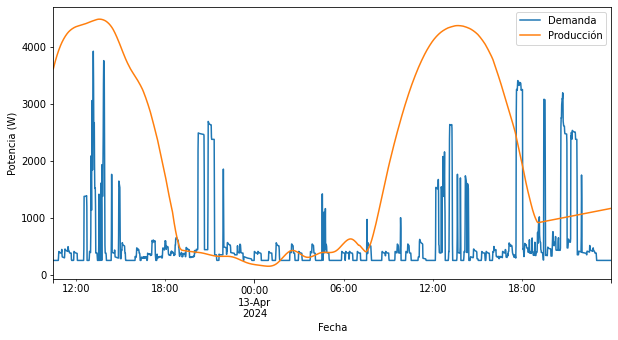

Demand  PV_Production  Wind_Production   Production  \
Date                                                                       
2024-04-12 10:30:00   255.0    2830.822744       783.400190  3614.222933   
2024-04-12 10:31:00   255.0    2842.318135       789.610299  3631.928434   
2024-04-12 10:32:00   255.0    2853.749980       795.594420  3649.344400   
2024-04-12 10:33:00   255.0    2865.118566       801.355300  3666.473866   
2024-04-12 10:34:00   255.0    2876.424166       806.895686  3683.319852   
...                     ...            ...              ...          ...   
2024-04-13 23:54:00   255.0       0.000000      1164.627323  1164.627323   
2024-04-13 23:55:00   255.0       0.000000      1165.479026  1165.479026   
2024-04-13 23:56:00   255.0       0.000000      1166.330728  1166.330728   
2024-04-13 23:57:00   255.0       0.000000      1167.182429  1167.182429   
2024-04-13 23:58:00   255.0       0.000000      1168.034130  1168.034130   

                         Netload  
Date                              
2024-04-12 10:30:00 -3359.222933  
2024-04-12 10:31:00 -3376.928434  
2024-04-12 10:32:00 -3394.344400  
2024-04-12 10:33:00 -3411.473866  
2024-04-12 10:34:00 -3428.319852  
...                          ...  
2024-04-13 23:54:00  -909.627323  
2024-04-13 23:55:00  -910.479026  
2024-04-13 23:56:00  -911.330728  
2024-04-13 23:57:00  -912.182429  
2024-04-13 23:58:00  -913.034130  

[2249 rows x 5 columns]

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la columna 'Date' a tipo datetime
opt['Date'] = pd.to_datetime(opt['Date'])

# Establecer la columna 'Date' como el índice del DataFrame
opt.set_index('Date', inplace=True)

# Graficar los datos y establecer los nombres deseados en la leyenda
opt['Demand'].plot(label='Demanda', figsize=(10, 5))
opt['Production'].plot(label='Producción')

# Establecer etiquetas de los ejes
plt.xlabel("Fecha")
plt.ylabel("Potencia (W)")

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.show()

display(opt)

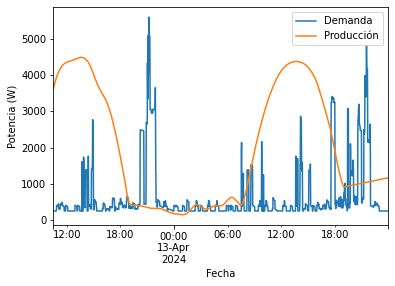

Demand  PV_Production  Wind_Production   Production  \
Date                                                                       
2024-04-12 10:30:00   255.0    2830.822744       783.400190  3614.222933   
2024-04-12 10:31:00   255.0    2842.318135       789.610299  3631.928434   
2024-04-12 10:32:00   255.0    2853.749980       795.594420  3649.344400   
2024-04-12 10:33:00   255.0    2865.118566       801.355300  3666.473866   
2024-04-12 10:34:00   255.0    2876.424166       806.895686  3683.319852   
...                     ...            ...              ...          ...   
2024-04-13 23:54:00   255.0       0.000000      1164.627323  1164.627323   
2024-04-13 23:55:00   255.0       0.000000      1165.479026  1165.479026   
2024-04-13 23:56:00   255.0       0.000000      1166.330728  1166.330728   
2024-04-13 23:57:00   255.0       0.000000      1167.182429  1167.182429   
2024-04-13 23:58:00   255.0       0.000000      1168.034130  1168.034130   

                         Netload  
Date                              
2024-04-12 10:30:00 -3359.222933  
2024-04-12 10:31:00 -3376.928434  
2024-04-12 10:32:00 -3394.344400  
2024-04-12 10:33:00 -3411.473866  
2024-04-12 10:34:00 -3428.319852  
...                          ...  
2024-04-13 23:54:00  -909.627323  
2024-04-13 23:55:00  -910.479026  
2024-04-13 23:56:00  -911.330728  
2024-04-13 23:57:00  -912.182429  
2024-04-13 23:58:00  -913.034130  

[2249 rows x 5 columns]

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer los datos del archivo CSV
before = pd.read_csv(path_steps_minutes + '/netload.csv', sep=';')

# Renombrar las columnas
before.columns = ['Date', 'Demand', 'PV_Production', 'Wind_Production', 'Production', 'Netload']

# Convertir la columna 'Date' a tipo datetime
before['Date'] = pd.to_datetime(before['Date'])

# Establecer la columna 'Date' como el índice del DataFrame
before.set_index('Date', inplace=True)

# Graficar los datos de las primeras 2 días y establecer los nombres deseados en la leyenda
before[:24*60*2]["Demand"].plot(legend=True, label='Demanda')
before[:24*60*2]["Production"].plot(legend=True, label='Producción')

# Establecer el tamaño de la figura
plt.rcParams['figure.figsize'] = [10, 5]

# Establecer etiquetas de los ejes
plt.xlabel("Fecha")
plt.ylabel("Potencia (W)")

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.show()
display(before)

In [14]:
# Cálculo de las métricas antes de la optimización 
evaluation_in = Evaluation(before,before, 0)

print("Energía consumida de la red: " + "{:.2f}".format(evaluation_in.get_energy_used_from_grid()) + " kWh")
print("Energía consumida de la producción: " + "{:.2f}".format(evaluation_in.get_energy_used_from_production()) + " kWh")
print("Energía no consumida de la producción: " + "{:.2f}".format(evaluation_in.get_energy_not_used_from_production()) + " kWh")
print("Autosuficiencia: " + "{:.2f}".format(evaluation_in.get_self_sufficiency()*100) + "%")
print("Autoconsumo: " + "{:.2f}".format(evaluation_in.get_self_consumption()*100) + "%")


Energía consumida de la red: 479.78 kWh
Energía consumida de la producción: 985.80 kWh
Energía no consumida de la producción: 3489.17 kWh
Autosuficiencia: 67.26%
Autoconsumo: 22.03%


In [15]:
# Cálculo de las métricas después de la optimización 

evaluacion_post_optimizacion = Evaluation(opt,opt, 0)

print("Energía consumida de la red: " + "{:.2f}".format(evaluacion_post_optimizacion.get_energy_used_from_grid()) + " kWh")
print("Energía consumida de la producción: " + "{:.2f}".format(evaluacion_post_optimizacion.get_energy_used_from_production()) + " kWh")
print("Energía no consumida de la producción: " + "{:.2f}".format(evaluacion_post_optimizacion.get_energy_not_used_from_production()) + " kWh")
print("Autosuficiencia: " + "{:.2f}".format(evaluacion_post_optimizacion.get_self_sufficiency()*100) + "%")
print("Autoconsumo: " + "{:.2f}".format(evaluacion_post_optimizacion.get_self_consumption()*100) + "%")



Energía consumida de la red: 278.06 kWh
Energía consumida de la producción: 1014.46 kWh
Energía no consumida de la producción: 3460.50 kWh
Autosuficiencia: 78.49%
Autoconsumo: 22.67%


In [18]:
from functools import reduce

def show_timeslots_placement_graph_double(path, day, total_appliances):
    abc = pd.read_csv(path + '/netload.csv', sep=';')
    abc.columns = ['Date', 'Demand', 'PV_Production', 'Wind_Production', 'Production', 'Netload']
    abc.drop(['Netload', 'Demand'], inplace=True, axis=1)
    abc.set_index('Date', inplace=True)

    dataframes = [abc]

    for house in range(2):  # Iterate over houses
        for idx, appliance in enumerate(total_appliances):  # Iterate over appliances
            file_path = f"{path}/house{house}/{appliance}.csv"
            if os.path.exists(file_path):
                df = pd.read_csv(file_path, sep=';')
                df = df.rename(columns={"Power": f"{appliance} - House {house}"})
                df.set_index('Date', inplace=True)
                dataframes.append(df)

    # Merge all DataFrames into a single one
    df = reduce(lambda left, right: pd.merge(left, right, on='Date', how='left'), dataframes)

    df['Time'] = df.index.map(lambda x: datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").strftime("%H:%M"))

    fig, ax1 = plt.subplots()

    ax1.set_xlabel('Time')
    ax1.set_ylabel('Power (W)', color='black')  # Use black for the shared ylabel

    # Define colors for each appliance
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'cyan', 'magenta', 'yellow', 'gray', 'olive', 'teal', 'navy', 'violet', 'lime', 'maroon', 'aquamarine', 'gold', 'indigo']
    
    # Plot power consumption for each appliance in each house
    for house in range(2):
        for idx, appliance in enumerate(total_appliances):
            label = f"{appliance} - House {house}"
            color = colors[idx % len(colors)]  # Circular color selection to ensure enough colors for all appliances
            plt.plot(df['Time'][24*60*(day-1):24*60*day], df[label][24*60*(day-1):24*60*day], color=color, label=label)

    ax1.axis(ymin=-280, ymax=6000)
    
    ax2 = ax1.twinx()
    ax2.set_ylabel('Production (W)', color='blue')
    plt.plot(df['Time'][24*60*(day-1):24*60*day], df["Production"][24*60*(day-1):24*60*day], color='blue', label='Production')

    spacing = 200
    visible = ax1.xaxis.get_ticklabels()[::spacing]
    for label in ax1.xaxis.get_ticklabels():
        if label not in visible:
            label.set_visible(False)
    visible = ax1.xaxis.get_ticklines()[::spacing]
    for label in ax1.xaxis.get_ticklines():
        if label not in visible:
            label.set_visible(False)

    plts, labs = ax1.get_legend_handles_labels()
    ax1.legend(plts, labs, loc=0)
    
    plt.show()

Diccionario de flexibilidad cargado desde el archivo CSV:
{'COFFEEMAKER': 6, 'AMPLIFIER': 1, 'VACUUMCLEANER': 5, 'KETTLE': 3, 'COOKINGSTOVE': 2, 'DRYER': 4}
Lista de appliances:
['COFFEEMAKER', 'AMPLIFIER', 'VACUUMCLEANER', 'KETTLE', 'COOKINGSTOVE', 'DRYER']
Day 1:


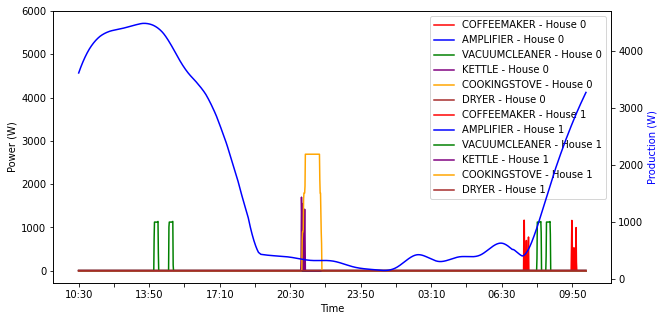

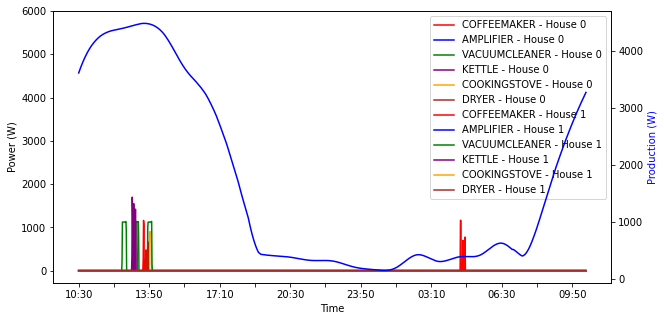

Day 2:


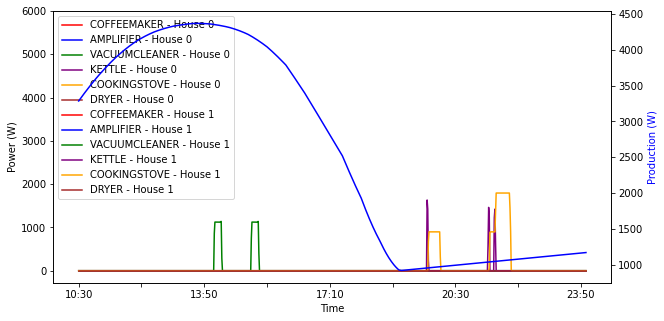

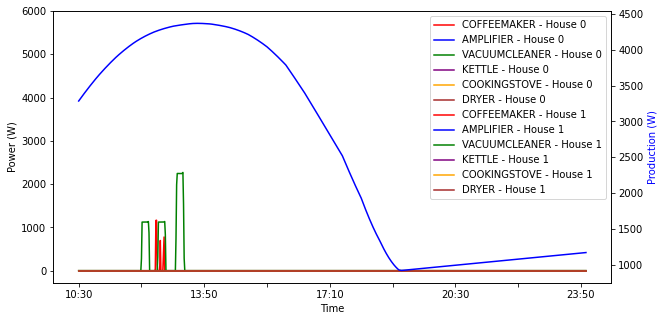

C:\Users\Jimena\Desktop\Master\Asignaturas\TFM\proyecto05\codigo_proyecto\output\minute2
C:\Users\Jimena\Desktop\Master\Asignaturas\TFM\proyecto05\codigo_proyecto\output\afterfirstoptimization


In [20]:
# total_appliances = ['AMPLIFIER', 'BREADCUTTER', 'CDPLAYER', 'COFFEEMAKER', 'KETTLE', 'PC', 'PRINTER', 'TOASTER', 'TV','MICROWAVE','DISHWASHER', 'VACUUMCLEANER', 'WASHINGMACHINE', 'DRYER', 'IRON', 'COOKINGSTOVE']

# Nombre del archivo CSV donde se guardó el diccionario
csv_filename = "datos/flexibilidad_dispositivos.csv"
# Crear un diccionario para almacenar las aplicaciones y su flexibilidad
appliances_flexibility = {}
# Leer el archivo CSV y cargar los datos en el diccionario
with open(csv_filename, newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        appliances_flexibility[row['Dispositivos']] = int(row['Flexibilidad'])
# Mostrar el diccionario cargado
print("Diccionario de flexibilidad cargado desde el archivo CSV:")
print(appliances_flexibility)

# Obtener las keys del diccionario y guardarlas en una lista
appliances_list = list(appliances_flexibility.keys())

# Mostrar la lista de keys
print("Lista de appliances:")
print(appliances_list)

for day in range(1, 3):
  print("Day " + str(day) + ":")
  show_timeslots_placement_graph_double(path_steps_minutes, day, appliances_list)
  show_timeslots_placement_graph_double(path_steps_after_first, day, appliances_list)
print(path_steps_minutes)
print(path_steps_after_first)

In [21]:
# Definir listas para almacenar las sumas de puntos antes de la optimización
total_points_minutes_list = []
total_points_after_first_list = []

In [26]:
import os
import pandas as pd
total_appliances = ['AMPLIFIER', 'BREADCUTTER', 'CDPLAYER', 'COFFEEMAKER', 'KETTLE', 'PC', 'PRINTER', 'TOASTER', 'TV','MICROWAVE','DISHWASHER', 'VACUUMCLEANER', 'WASHINGMACHINE', 'DRYER', 'IRON', 'COOKINGSTOVE']

def calculate_score(path, appliances):
    # Leer el archivo netload.csv para obtener la informacion del consumo y produccion de energía
    abc = pd.read_csv(os.path.join(path, 'netload.csv'), sep=';')
    abc.columns = ['Date', 'Demand', 'PV_Production', 'Wind_Production', 'Production', 'Netload']
    abc.drop(['Netload', 'Demand'], inplace=True, axis=1)
    abc.set_index('Date', inplace=True)

    dataframes = [abc]
    
    for house in range(2):  # Iterate over houses
        for idx, appliance in enumerate(appliances):  # Iterate over appliances
            file_path = f"{path}/house{house}/{appliance}.csv"
            if os.path.exists(file_path):
                df = pd.read_csv(file_path, sep=';')
                df = df.rename(columns={"Power": f"{appliance} - House {house}"})
                df.set_index('Date', inplace=True)
                dataframes.append(df)

    # Combinar todos los DataFrames en uno solo
    df = pd.concat(dataframes, axis=1)
    
    df['Time'] = df.index.map(lambda x: pd.to_datetime(str(x)).strftime("%H:%M"))
    
    # Calcula el consumo total de energía para cada electrodoméstico
    df['Consumo_total'] = df.filter(like='House').sum(axis=1)
    
    # Filtra los registros con consumo total distinto de 0
    df = df[df['Consumo_total'] != 0]
    
    # Calcula el consumo de energía renovable para cada electrodoméstico
    df['Energia_Renovable'] = df[['PV_Production', 'Wind_Production']].sum(axis=1)

    # Calcula el porcentaje de energía renovable
    df['Porcentaje_energía_renovable'] = df['Energia_Renovable'] / df['Consumo_total']
   
    # Función para asignar puntos
    def assign_points(row):
        if row['Porcentaje_energía_renovable'] >= 0.8:
            return 1  # Asigna 1 puntos si la energía renovable cubre al menos el 80%
        else:
            return -1  # Resta 1 puntos si no cumple

    # Aplica la función para asignar puntos
    df['Puntos'] = df.apply(assign_points, axis=1)

    # Retorna el DataFrame resultante con los puntos asignados
    return df[['Consumo_total', 'Energia_Renovable', 'Porcentaje_energía_renovable', 'Puntos']]

# Ejecutar la función calculate_score y almacenar las sumas de puntos
score_minutes = calculate_score(path_steps_minutes, appliances_list)
print("pasos_tiempo_minutos:")
display(score_minutes)
total_points_minutes = score_minutes['Puntos'].sum()
total_points_minutes_list.append(total_points_minutes)

score_after_first = calculate_score(path_steps_after_first, appliances_list)
print("primera_optimizacion:")
display(score_after_first)
total_points_after_first = score_after_first['Puntos'].sum()
total_points_after_first_list.append(total_points_after_first)

# Imprimir las sumas de puntos antes de la optimización
print("Puntos antes de la optimización:")
print(total_points_minutes_list)
print("Puntos después de la optimización:")
print(total_points_after_first_list)

if(total_points_minutes > total_points_after_first):
    print("La optimización no es favorable")
else:
    print("La optimización se ha realizado correctamente")

pasos_tiempo_minutos:


Consumo_total  Energia_Renovable  \
Date                                                    
2024-04-12 14:04:00     748.666667        4442.153708   
2024-04-12 14:05:00    1123.000000        4438.909101   
2024-04-12 14:06:00    1123.000000        4435.544841   
2024-04-12 14:07:00    1123.000000        4432.058134   
2024-04-12 14:08:00    1123.000000        4428.446110   
...                            ...                ...   
2024-04-12 09:43:00       0.400000           0.000000   
2024-04-12 09:44:00       0.400000           0.000000   
2024-04-12 09:45:00       0.400000           0.000000   
2024-04-12 09:46:00     667.603333           0.000000   
2024-04-12 09:47:00     529.865000           0.000000   

                     Porcentaje_energía_renovable  Puntos  
Date                                                       
2024-04-12 14:04:00                      5.933420       1  
2024-04-12 14:05:00                      3.952724       1  
2024-04-12 14:06:00                      3.949728       1  
2024-04-12 14:07:00                      3.946623       1  
2024-04-12 14:08:00                      3.943407       1  
...                                           ...     ...  
2024-04-12 09:43:00                      0.000000      -1  
2024-04-12 09:44:00                      0.000000      -1  
2024-04-12 09:45:00                      0.000000      -1  
2024-04-12 09:46:00                      0.000000      -1  
2024-04-12 09:47:00                      0.000000      -1  

[282 rows x 4 columns]

primera_optimizacion:


Consumo_total  Energia_Renovable  \
Date                                                    
2024-04-12 12:33:00     205.883333        4394.140439   
2024-04-12 12:34:00    1123.000000        4395.483671   
2024-04-12 12:35:00    1123.000000        4396.860924   
2024-04-12 12:36:00    1123.000000        4398.270853   
2024-04-12 12:37:00    1123.000000        4399.712142   
...                            ...                ...   
2024-04-13 13:14:00    2244.150000        4350.294517   
2024-04-13 13:15:00    2252.200000        4351.578048   
2024-04-13 13:16:00    2269.508333        4352.844157   
2024-04-13 13:17:00    1537.128333        4354.092650   
2024-04-13 13:18:00     285.093333        4355.323107   

                     Porcentaje_energía_renovable  Puntos  
Date                                                       
2024-04-12 12:33:00                     21.342866       1  
2024-04-12 12:34:00                      3.914055       1  
2024-04-12 12:35:00                      3.915281       1  
2024-04-12 12:36:00                      3.916537       1  
2024-04-12 12:37:00                      3.917820       1  
...                                           ...     ...  
2024-04-13 13:14:00                      1.938504       1  
2024-04-13 13:15:00                      1.932145       1  
2024-04-13 13:16:00                      1.917968       1  
2024-04-13 13:17:00                      2.832615       1  
2024-04-13 13:18:00                     15.276833       1  

[118 rows x 4 columns]

Puntos antes de la optimización:
[-12]
Puntos después de la optimización:
[110]
La optimización se ha realizado correctamente


In [27]:
import pandas as pd

# Leer el archivo CSV
df = pd.read_csv('results_v2.csv')

# Cálculo de la cantidad total de energía importada y exportada
total_importada = df['totalImport'].sum()
total_exportada = df['totalExport'].sum()

# Cálculo del costo total de la energía importada y exportada
costo_total_importada = (df['totalImport'] * df['costImport']).sum()
costo_total_exportada = (df['totalExport'] * df['costExport']).sum()

# Determinar si hay ganancias o pérdidas
if costo_total_importada < costo_total_exportada:
    print("Tendrás ganancias.")
elif costo_total_importada > costo_total_exportada:
    print("Tendrás pérdidas.")
else:
    print("No habrá ganancias ni pérdidas.")

Tendrás ganancias.
